In [ ]:
!pip install humanfriendly
!pip install geopandas cartopy
!pip install fiona
!pip install statsmodels
!pip install esda
!pip install semopy
!pip install humanfriendly
!pip install gower
!pip install pingouin
!pip install igraph

In [1]:
import os
import random
%pwd
import glob  # from os import chdir      from glob import glob
from math import*
import numpy as np   # from numpy import*   from numpy import sqrt
from numpy import load
import pandas as pd   # from pandas import*
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from pathlib import Path
import matplotlib.pyplot as plt
from pickle import dump,load
import warnings
warnings.simplefilter("ignore", UserWarning)
import seaborn as sns
from io import StringIO
import copy
import itertools
from datetime import datetime, date, time, timedelta
import decimal
decimal.getcontext().prec=6 # This changes float to decimals  - check if the rounding errors are now gone
print(decimal.getcontext())
from IPython.display import Image
np.random.seed(1)

pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:0.2f}'.format})  #supress scientific notations
import time
import datetime
from humanfriendly import format_timespan
import http.client
import urllib.parse
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D")  # set WD
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import fiona

import matplotlib.colors as colors # Import for colormapping
from mpl_toolkits.axes_grid1 import make_axes_locatable # Import for positioning the colorbar
import matplotlib.cm as cm # Import colormaps
import matplotlib.colorbar as cbar_lib # Import colorbar library

from statsmodels.multivariate.factor import Factor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from esda.moran import Moran
from libpysal.weights import Queen, KNN
import seaborn
import pandas
import geopandas
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from scipy.stats import ttest_ind
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import semopy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm # Import colormaps
import matplotlib.colors as colors # Import for normalization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import MultiPolygon
from shapely.geometry import Polygon
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import geopandas as gpd # Ensure geopandas is imported if not already
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import geopandas as gpd # Ensure geopandas is imported if not already
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import geopandas as gpd
from shapely.geometry import MultiPolygon, Polygon
import numpy as np
import pandas as pd # Ensure pandas is imported
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import hdbscan
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import numpy as np
import multiprocessing
import multiprocessing
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd # Ensure pandas is imported
import gower
from scipy import stats
from sklearn.mixture import GaussianMixture
from scipy.stats import f_oneway
import pingouin as pg
import pandas as pd
import plotly.graph_objects as go
import igraph as ig
from tabulate import tabulate
from PIL import Image, ImageDraw, ImageFont
from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import fiona
import os
import matplotlib.cm as cm
import matplotlib.patches as mpatches # Import mpatches for creating legend handles

Context(prec=6, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])
Mounted at /content/drive


# Functions and definitions


In [26]:
# Shapefiles from https://ec.europa.eu/eurostat/web/gisco/geodata/statistical-units/territorial-units-statistics
# WGS84 code is 4326 # take files from 2016 - the 2024 do not have UK included

def plot_one_map(gpkg_path_2016, NUTS_level, data, lon, lat, column, markersize, color_map, title):
    try:
        # Check if the file exists
        if not os.path.exists(gpkg_path_2016):
            raise FileNotFoundError(f"GeoPackage file not found at: {gpkg_path_2016}")

        # List the layers in the GeoPackage file to help identify the correct layer name
        layers_2016 = fiona.listlayers(gpkg_path_2016)
        # print("Layers found in the 2016 GeoPackage:")
        # for layer in layers_2016:
        #     print(layer)

        # Load the primary layer from the GeoPackage file into a GeoDataFrame
        # Based on the layer listing and common GeoPackage structures,
        # the single layer likely contains data for all NUTS levels at this resolution.
        if layers_2016:
            primary_layer_2016 = layers_2016[0]
            nuts_gdf_2016 = gpd.read_file(gpkg_path_2016, layer=primary_layer_2016)

            # print(f"\nSuccessfully loaded layer '{primary_layer_2016}' from the 2016 GeoPackage.")
            # print("Original GeoDataFrame shape:", nuts_gdf_2016.shape)

            # Filter for NUTS level 0 (LEVL_CODE == 0), which corresponds to countries
            nuts0_gdf_2016 = nuts_gdf_2016[nuts_gdf_2016['LEVL_CODE'] == NUTS_level]

            # print("Filtered GeoDataFrame shape (2016 NUTS0/Countries):", nuts0_gdf_2016.shape)

            # Create a map
            # Reduced the width of the figure to make the plot more narrow
            fig = plt.figure(figsize=(10, 10)) # Reduced width from 15 to 10
            ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

            # Set the extent to focus on Europe, including the UK
            # Using the same extent as the 2024 map for consistency
            ax.set_extent([-15, 36, 34, 72], crs=ccrs.PlateCarree())  # [-15, 37, 32, 72] West  X X N

            # --- Add plotting of data points colored by above_biomass ---
            # Ensure data DataFrame is available in the environment
            if 'data' in locals() and not data.empty:
                # Convert the pandas DataFrame to a GeoDataFrame
                # Specify the coordinate columns and the Coordinate Reference System (CRS)
                # WGS84 is EPSG:4326
                try:
                    data_gdf = gpd.GeoDataFrame(
                        data, geometry=gpd.points_from_xy(lon, lat), crs="EPSG:4326"
                    )

                    # Plot the data points, colored by 'above_biomass' with a green colormap
                    # Use a colormap that goes from light green to dark green (e.g., 'Greens')
                    # Do NOT add legend=True here, we will create the colorbar manually
                    # Handle potential NaN values in 'above_biomass' before plotting
                    data_gdf_clean = data_gdf.dropna(subset=[column])

                    if not data_gdf_clean.empty:
                        # Define the colormap
                        cmap = plt.get_cmap(color_map)

                        # Plot the data points FIRST
                        biomass_collection = data_gdf_clean.plot(
                            ax=ax,
                            marker='o',
                            markersize=markersize, # 0.00005 is OK
                            column=column,
                            cmap=cmap,
                            legend=False,
                        )

                        # --- Manually create and position the colorbar ---
                        if ax.collections:
                            mappable = ax.collections[-1]

                            divider = make_axes_locatable(ax)
                            cax = divider.append_axes("right", size="3%", pad=0.1, axes_class=plt.Axes)

                            cbar = fig.colorbar(mappable, cax=cax, orientation='vertical')
                            # cbar.set_label('Aboveground Biomass')
                            # print("Successfully created and positioned manual colorbar closer to the map.")

                        else:
                            print("No collections found on the axes after plotting points. Cannot create colorbar.")

                        # print("Successfully plotted  colored data points .")
                    else:
                        print("No valid data points with 'above_biomass' values to plot.")

                except Exception as data_e:
                    print(f"An error occurred while creating GeoDataFrame from data or plotting points: {data_e}")
                    print("Please ensure 'data' DataFrame exists and has 'lon_WGS84', 'lat_WGS84', and specified data column.")
            else:
                print("Data DataFrame not found or is empty. Cannot plot data points.")
            # --- End of adding plotting of data points ---

            # Plot the 2016 NUTS0 boundaries (country borders) SECOND, so they appear on top
            nuts0_gdf_2016.plot(ax=ax, edgecolor='black', facecolor='none')

            # Add gridlines and labels
            # ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

            # Add title to the axes (above the map) instead of using plt.title()
            ax.set_title(title)

            # Use tight_layout to attempt to reduce empty space
            plt.tight_layout()

            # *** REMOVE plt.show() from here ***
            # plt.show()

        else:
            print("No layers found in the GeoPackage.")
        return fig, ax # Return the figure and axes objects

    except FileNotFoundError as e:
        print(e)
        print("Please ensure the 2016 GeoPackage file is in the specified Google Drive folder.")
        return None, None # Return None on error
    except Exception as e:
        print(f"An error occurred while accessing, loading, filtering, or plotting the 2016 GeoPackage: {e}")
        print("Please check the file path and the GeoPackage file.")
        return None, None # Return None on error


gpkg_path = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/NUTS_RG_10M_2016_4326.gpkg'


def get_regional_map_info(gpkg_path, LEVEL_CODE, CNTR_CODE): # CNTR_CODE is ISO2
    layer_name = os.path.basename(gpkg_path)
    nuts_gdf = gpd.read_file(gpkg_path, layer=layer_name)
    nuts_specific_gdf = nuts_gdf[(nuts_gdf['LEVL_CODE'] == LEVEL_CODE) & (nuts_gdf['CNTR_CODE'] == CNTR_CODE)]
    if not nuts_specific_gdf.empty:
        nuts_specific_gdf_list = nuts_specific_gdf['NUTS_NAME'].tolist()
        print("Regions listed and polygons specified")
    else:
        print("No NUTS regions found for specified country")
    return nuts_specific_gdf_list, nuts_specific_gdf


# MAP - Plot single region # HERE DATA  ARE POLYGONS AND NOT DOTS
def plot_single_region_map(gpkg_path_2016, NUTS_level, data, lon, lat, column, color_map, title, region_name, nuts_gdf=None):
    try:
        # Check if the file exists
        if not os.path.exists(gpkg_path_2016):
            raise FileNotFoundError(f"GeoPackage file not found at: {gpkg_path_2016}")

        # List the layers in the GeoPackage file to help identify the correct layer name
        layers_2016 = fiona.listlayers(gpkg_path_2016)
        print("Layers found in the 2016 GeoPackage:")
        for layer in layers_2016:
            print(layer)

        # Load the primary layer from the GeoPackage file into a GeoDataFrame
        if layers_2016:
            primary_layer_2016 = layers_2016[0]
            if nuts_gdf is None: # Load nuts_gdf only if not provided
                nuts_gdf_2016 = gpd.read_file(gpkg_path_2016, layer=primary_layer_2016)
            else:
                nuts_gdf_2016 = nuts_gdf

            print(f"\nSuccessfully loaded layer '{primary_layer_2016}' from the 2016 GeoPackage.")
            print("Original GeoDataFrame shape:", nuts_gdf_2016.shape)

            # Filter for the specified NUTS level and region
            region_gdf = nuts_gdf_2016[(nuts_gdf_2016['LEVL_CODE'] == NUTS_level) & (nuts_gdf_2016['NUTS_NAME'] == region_name)]

            if region_gdf.empty:
                print(f"Region '{region_name}' at NUTS Level {NUTS_level} not found in the GeoDataFrame.")
                return

            print(f"Filtered GeoDataFrame shape (Region {region_name}):", region_gdf.shape)

            # Create a map
            fig = plt.figure(figsize=(10, 10))
            # Use the extent of the single region for the plot
            ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
            region_bounds = region_gdf.total_bounds
            ax.set_extent([region_bounds[0], region_bounds[2], region_bounds[1], region_bounds[3]], crs=ccrs.PlateCarree())


            # --- Add plotting of data points as square polygons ---
            # Ensure data DataFrame is available in the environment
            if 'data' in locals() and not data.empty:
                # Convert the pandas DataFrame to a GeoDataFrame
                try:
                    data_gdf = gpd.GeoDataFrame(
                        data, geometry=gpd.points_from_xy(lon, lat), crs="EPSG:4326"
                    )

                    # Filter data points by region
                    region_geometry = region_gdf.geometry.iloc[0]
                    data_gdf = data_gdf[data_gdf.geometry.within(region_geometry)]
                    print(f"Filtered data points for region: {region_name}")

                    # Handle potential NaN values in the specified column before plotting
                    data_gdf_clean = data_gdf.dropna(subset=[column]).copy() # Use .copy() to avoid SettingWithCopyWarning


                    print(f"Number of data points for region after dropping NaNs: {len(data_gdf_clean)}")
                    if not data_gdf_clean.empty:
                        # Create square polygons representing 1km x 1km area around each point
                        # Need to work in a projected CRS to buffer by a distance in meters
                        # Reproject to a suitable UTM zone or a Europe-wide projection (e.g., ETRS89 / LAEA Europe - EPSG:3035)
                        # Let's use EPSG:3035 for Europe
                        data_gdf_projected = data_gdf_clean.to_crs(epsg=3035)

                        # Create square polygons (buffer by 500m and then square it)
                        # A direct square creation is more accurate than buffering a point and squaring
                        # Let's create squares manually. Assuming the points are centers of 1km x 1km squares.
                        # In EPSG:3035, coordinates are in meters.
                        side_length_meters = 1000 # 1 km
                        half_side = side_length_meters / 2.0

                        from shapely.geometry import Polygon

                        # Create a list of square polygons
                        squares = []
                        for idx, row in data_gdf_projected.iterrows():
                            center_x, center_y = row.geometry.x, row.geometry.y
                            square_coords = [
                                (center_x - half_side, center_y - half_side),
                                (center_x + half_side, center_y - half_side),
                                (center_x + half_side, center_y + half_side),
                                (center_x - half_side, center_y + half_side),
                                (center_x - half_side, center_y - half_side) # Close the polygon
                            ]
                            squares.append(Polygon(square_coords))

                        # Create a new GeoDataFrame for the square polygons
                        squares_gdf_projected = gpd.GeoDataFrame(data_gdf_projected.drop(columns=['geometry']), geometry=squares, crs='EPSG:3035') # Corrected CRS syntax

                        # Reproject the squares back to WGS84 (EPSG:4326) for plotting on the Cartopy map
                        squares_gdf_wgs84 = squares_gdf_projected.to_crs(epsg=4326)


                        if not squares_gdf_wgs84.empty:
                            # Define the colormap
                            cmap = plt.get_cmap(color_map)

                            # Define normalization for the colorbar based on the data range
                            vmin = squares_gdf_wgs84[column].min()
                            vmax = squares_gdf_wgs84[column].max()
                            norm = colors.Normalize(vmin=vmin, vmax=vmax)

                            print(f"Data range for '{column}': min={vmin}, max={vmax}")

                            # Plot the square polygons FIRST
                            # Pass the 'cmap' and 'norm' to the plot function
                            mappable = squares_gdf_wgs84.plot(
                                ax=ax,
                                column=column,
                                cmap=cmap,  # Pass the colormap here
                                norm=norm,  # Pass the normalization here
                                legend=False, # Turn off the default legend
                                linewidth=0 # No outline for the squares
                            )

                            # --- Manually create and position the colorbar ---
                            # Create a ScalarMappable object to use for the colorbar
                            sm = cm.ScalarMappable(cmap=cmap, norm=norm)
                            sm.set_array([]) # Set an empty array as we are using it for mapping values

                            divider = make_axes_locatable(ax)
                            cax = divider.append_axes("right", size="3%", pad=0.1, axes_class=plt.Axes)

                            # Create the colorbar using the ScalarMappable object
                            cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
                            cbar.set_label(column) # Set colorbar label based on the column
                            print("Successfully created and positioned manual colorbar closer to the map.")

                        else:
                            print(f"No valid square polygons with '{column}' values to plot after filtering by region.")

                except Exception as data_e:
                    print(f"An error occurred while creating GeoDataFrame from data or plotting polygons: {data_e}")
                    print(f"Please ensure 'data' DataFrame exists and has '{lon.name}', '{lat.name}', and '{column}' columns.")
            else:
                print("Data DataFrame not found or is empty. Cannot plot data points as squares.")
            # --- End of adding plotting of square polygons ---

            # Plot the single region boundary SECOND, so it appears on top
            region_gdf.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.5) # Increased linewidth for visibility

            # Add gridlines and labels
            # ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

            # Add title to the axes (above the map) instead of using plt.title()
            ax.set_title(title)

            # Use tight_layout to attempt to reduce empty space
            plt.tight_layout()

            # *** REMOVE plt.show() from here ***
            # plt.show()
            return fig, ax # Return the figure and axes objects


        else:
            print("No layers found in the GeoPackage.")
            return None, None # Return None on error

    except FileNotFoundError as e:
        print(e)
        print("Please ensure the 2016 GeoPackage file is in the specified Google Drive folder.")
        return None, None # Return None on error
    except Exception as e:
        print(f"An error occurred while accessing, loading, filtering, or plotting the 2016 GeoPackage: {e}")
        print("Please check the file path and the GeoPackage file.")
        return None, None # Return None on error



def calculate_isoperimetric_quotient(gdf_with_clusters, cluster_column='cluster_label'):
    """
    Calculates the average isoperimetric quotient for clusters in a GeoDataFrame.

    The isoperimetric quotient (also known as the Polsby-Popper test) measures
    the compactness of a shape. For a polygon, it's calculated as
    4 * pi * Area / Perimeter^2. A circle has a quotient of 1, and values closer
    to 1 indicate more compact shapes. This function calculates the average
    quotient for the union of geometries within each cluster.

    Args:
        gdf_with_clusters (gpd.GeoDataFrame): A GeoDataFrame with a geometry column
                                             and a column containing cluster labels.
        cluster_column (str): The name of the column containing the cluster labels.

    Returns:
        float: The average isoperimetric quotient across all clusters, or None
               if calculation is not possible (e.g., no valid geometries).
        dict: A dictionary containing the isoperimetric quotient for each cluster.
              Returns an empty dictionary if calculation is not possible.
    """
    isoperimetric_quotients = {}
    total_quotient = 0
    valid_cluster_count = 0

    if gdf_with_clusters.empty or cluster_column not in gdf_with_clusters.columns:
        print("Error: GeoDataFrame is empty or cluster column is missing.")
        return None, {}

    # Ensure the GeoDataFrame has projected coordinates (like EPSG:3035)
    # Area and perimeter calculations are accurate in a projected CRS
    if gdf_with_clusters.crs is None or gdf_with_clusters.crs.is_geographic:
        print("Warning: GeoDataFrame is in a geographic CRS. Reprojecting to EPSG:3035 for accurate area/perimeter calculation.")
        try:
            gdf_projected = gdf_with_clusters.to_crs(epsg=3035)
        except Exception as e:
            print(f"Error during reprojection: {e}")
            return None, {}
    else:
        gdf_projected = gdf_with_clusters.copy() # Use a copy to avoid modifying the original

    # Iterate through each unique cluster
    unique_clusters = gdf_projected[cluster_column].unique()
    for cluster_label in unique_clusters:
        # Select geometries belonging to the current cluster
        cluster_geometries = gdf_projected[gdf_projected[cluster_column] == cluster_label].geometry

        if not cluster_geometries.empty:
            try:
                # Dissolve or union the geometries within the cluster to get a single (possibly multi-)polygon
                # Using unary_union is generally more robust for creating a single geometry
                merged_geometry = cluster_geometries.unary_union

                if merged_geometry is not None and not merged_geometry.is_empty:
                    # Calculate Area and Perimeter of the merged geometry
                    # Handle both Polygon and MultiPolygon types
                    if isinstance(merged_geometry, (Polygon, MultiPolygon)):
                        area = merged_geometry.area
                        perimeter = merged_geometry.length

                        # Calculate Isoperimetric Quotient
                        if perimeter > 0:
                            # Avoid division by zero
                            quotient = (4 * np.pi * area) / (perimeter ** 2)
                            isoperimetric_quotients[cluster_label] = quotient
                            total_quotient += quotient
                            valid_cluster_count += 1
                        else:
                            # Handle cases with zero perimeter (e.g., points after union)
                            isoperimetric_quotients[cluster_label] = 0.0 # Or np.nan, depending on how you want to treat this
                            print(f"Warning: Cluster {cluster_label} has a perimeter of zero after union. Quotient set to 0.0.")
                    else:
                         # Handle unexpected geometry types after union
                         print(f"Warning: Cluster {cluster_label} resulted in unexpected geometry type: {type(merged_geometry)}. Skipping.")
                         isoperimetric_quotients[cluster_label] = np.nan

                else:
                     # Handle cases where union results in None or empty geometry
                     print(f"Warning: Cluster {cluster_label} union resulted in empty geometry. Skipping.")
                     isoperimetric_quotients[cluster_label] = np.nan


            except Exception as e:
                print(f"Error processing cluster {cluster_label}: {e}")
                isoperimetric_quotients[cluster_label] = np.nan # Store NaN on error
        else:
            print(f"Warning: No geometries found for cluster {cluster_label}. Skipping.")
            isoperimetric_quotients[cluster_label] = np.nan


    # Calculate the average quotient
    average_quotient = total_quotient / valid_cluster_count if valid_cluster_count > 0 else None

    return average_quotient, isoperimetric_quotients



def one_hot_encoding(data, categorical_complex_independent_variables):
    # Ensure data is available and contains the necessary columns
    if 'data' in locals() and not data.empty:

        # List of columns to one-hot encode
        columns_to_encode = categorical_complex_independent_variables

        # Check if all columns to encode are present in the DataFrame
        missing_cols = [col for col in columns_to_encode if col not in data.columns]
        if missing_cols:
            print(f"Error: The following columns to encode were not found in data: {missing_cols}")
        else:
            print("Performing one-hot encoding on the following columns:")
            print(columns_to_encode)

            # Create a copy of the relevant columns to avoid modifying the original DataFrame directly before encoding
            data_to_encode = data[columns_to_encode].copy()

            # Explicitly convert columns to 'category' dtype to ensure pd.get_dummies treats them as categorical
            for col in columns_to_encode:
                data_to_encode[col] = data_to_encode[col].astype('category')


            # Perform one-hot encoding
            # drop_first=True is often used to avoid multicollinearity
            one_hot_encoded_data = pd.get_dummies(data_to_encode, drop_first=True)

            # Convert boolean columns to integers (0 for False, 1 for True)
            # This step is redundant if astype(int) is used directly after get_dummies
            # for col in one_hot_encoded_data.columns:
            #     if one_hot_encoded_data[col].dtype == 'bool':
            #         one_hot_encoded_data[col] = one_hot_encoded_data[col].astype(int)

            # Convert boolean columns to integers (0 for False, 1 for True) immediately after get_dummies
            one_hot_encoded_data = one_hot_encoded_data.astype(int)


            print("\nOne-hot encoded data head (with 0s and 1s):")
            display(one_hot_encoded_data.head())

            # Concatenate the one-hot encoded columns with the original DataFrame
            # Drop the original categorical columns to avoid redundancy
            data_df_encoded = pd.concat([data.drop(columns=columns_to_encode), one_hot_encoded_data], axis=1)
            list_of_one_hot_encoded_columns = list(one_hot_encoded_data.columns)

            print("\nMerged DataFrame after one-hot encoding head:")
            print("\nMerged DataFrame after one-hot encoding shape:", data_df_encoded.shape)

    else:
        print("Error: DataFrame not found or is empty. Cannot perform one-hot encoding.")
        data_df_encoded = None # Set to None on error
    return data_df_encoded, list_of_one_hot_encoded_columns


def get_missing_data(merged_df_encoded, interval_independent_variables_list, dummy_categorical_independent_variables, list_of_one_hot_encoded_columns):
    clustering_columns = interval_independent_variables_list + dummy_categorical_independent_variables + list_of_one_hot_encoded_columns
    # Check if all clustering columns exist in the merged_df_encoded DataFrame
    missing_clustering_cols = [col for col in clustering_columns if col not in merged_df_encoded.columns]
    if missing_clustering_cols:
        print(f"Error: The following clustering columns were not found in merged_df_encoded: {missing_clustering_cols}")
        clustering_data = pd.DataFrame() # Initialize empty on error
    else:
        # Select the clustering columns from the merged_df_encoded DataFrame
        clustering_data = merged_df_encoded[clustering_columns].copy()

        print("Clustering data head before handling missing values:")
        display(clustering_data.head())
        print("\nClustering data shape before handling missing values:", clustering_data.shape)

        # --- Handle Missing Values ---
        # Use SimpleImputer to fill missing values (e.g., with the mean)
        imputer = SimpleImputer(strategy='mean')

        # Fit on data and transform. .values is needed for imputer.
        # Use .copy() after imputation to avoid potential SettingWithCopyWarning later
        clustering_data_imputed = pd.DataFrame(imputer.fit_transform(clustering_data), columns=clustering_data.columns, index=clustering_data.index).copy()

        print("\nClustering data head after imputation:")
        print("\nClustering data shape after imputation:", clustering_data_imputed.shape)
        return clustering_data_imputed


def scale_interval_variables(clustering_data_imputed, interval_independent_variables_list):
    if 'clustering_data_imputed' not in locals() or clustering_data_imputed.empty:
        print("Error: Imputed clustering data (clustering_data_imputed) is not available or is empty. Cannot scale interval variables.")
    else:
        # Select only the interval variables from the imputed data
        # Ensure all interval_independent_variables_list columns are in clustering_data_imputed
        interval_cols_to_scale = [col for col in interval_independent_variables_list if col in clustering_data_imputed.columns]

        if not interval_cols_to_scale:
            print("Error: None of the specified interval variables were found in the imputed clustering data. Cannot scale.")
            clustering_data_scaled = clustering_data_imputed.copy() # Keep original if no columns to scale
        else:
            print("Scaling the following interval variables:")
            print(interval_cols_to_scale)

            # Initialize the MinMaxScaler
            scaler = MinMaxScaler()

            # Apply Min-Max scaling to the selected interval columns
            # Use .values to pass a numpy array to the scaler
            scaled_interval_data = scaler.fit_transform(clustering_data_imputed[interval_cols_to_scale].values)

            # Create a DataFrame from the scaled data, using original index and column names
            scaled_interval_df = pd.DataFrame(scaled_interval_data, columns=interval_cols_to_scale, index=clustering_data_imputed.index)

            # Replace the original interval columns in clustering_data_imputed with the scaled ones
            # Use .copy() after replacing columns to avoid potential SettingWithCopyWarning later
            clustering_data_scaled = clustering_data_imputed.copy()
            clustering_data_scaled[interval_cols_to_scale] = scaled_interval_df

            print("\nClustering data head after scaling interval variables:")
            print("\nClustering data shape after scaling interval variables:", clustering_data_scaled.shape)
            return clustering_data_scaled





def plot_clusters_on_map(gpkg_path_2016, data, lon_col, lat_col, cluster_col, markersize, color_map, title, NUTS_level=0, legend_fontsize='medium'):
    """
    Plots clustered data points on a map with country boundaries and a custom legend.

    Args:
        gpkg_path_2016 (str): Path to the NUTS GeoPackage file (2016 version).
        data (pd.DataFrame or gpd.GeoDataFrame): DataFrame/GeoDataFrame containing data points and cluster labels.
        lon_col (str): Name of the longitude column (WGS84).
        lat_col (str): Name of the latitude column (WGS84).
        cluster_col (str): Name of the column containing cluster labels.
        markersize (float): Size of the markers on the plot.
        color_map (str): Name of the matplotlib colormap to use for clusters.
        title (str): Title of the plot.
        NUTS_level (int, optional): NUTS level for boundary plotting (default is 0 for countries).
        legend_fontsize (str or int, optional): Font size for the legend labels (default is 'medium').
    """
    try:
        # Check if the NUTS GeoPackage file exists
        if not os.path.exists(gpkg_path_2016):
            raise FileNotFoundError(f"NUTS GeoPackage file not found at: {gpkg_path_2016}")

        # Load NUTS boundaries (countries)
        layers_2016 = fiona.listlayers(gpkg_path_2016)
        if not layers_2016:
            print("No layers found in the NUTS GeoPackage.")
            nuts_gdf_2016 = gpd.GeoDataFrame()
        else:
            nuts_gdf_2016 = gpd.read_file(gpkg_path_2016, layer=layers_2016[0])
            # Filter for the specified NUTS level
            nuts_boundaries_gdf = nuts_gdf_2016[nuts_gdf_2016['LEVL_CODE'] == NUTS_level].copy()


        # Create a GeoDataFrame from the data points
        # Ensure data has the required columns and handle potential NaNs in cluster_col
        if not data.empty and lon_col in data.columns and lat_col in data.columns and cluster_col in data.columns:
            data_clean = data.dropna(subset=[lon_col, lat_col, cluster_col]).copy()
            if data_clean.empty:
                print("No valid data points with coordinates or cluster labels to plot.")
                # Return fig, ax even if empty, so the calling code can still attempt to save/show
                fig = plt.figure(figsize=(12, 12))
                ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
                ax.set_title(title)
                return fig, ax

            try:
                data_gdf = gpd.GeoDataFrame(
                    data_clean, geometry=gpd.points_from_xy(data_clean[lon_col], data_clean[lat_col]), crs="EPSG:4326"
                )
            except Exception as e:
                print(f"Error creating GeoDataFrame from data: {e}")
                fig = plt.figure(figsize=(12, 12))
                ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
                ax.set_title(title)
                return fig, ax # Return fig, ax on error


        else:
            print("Data DataFrame is empty or missing required columns. Cannot plot.")
            fig = plt.figure(figsize=(12, 12))
            ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
            ax.set_title(title)
            return fig, ax # Return fig, ax on error


        # Create the map figure and axes
        fig = plt.figure(figsize=(12, 12)) # Adjusted figure size
        ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

        # Set the extent to focus on Europe, including the UK
        ax.set_extent([-15, 36, 34, 72], crs=ccrs.PlateCarree())  # [-15, 37, 32, 72] West  X X N


        # Plot the data points, colored by cluster label
        if not data_gdf.empty:
            # Ensure cluster labels are integers for proper colormap mapping
            data_gdf[cluster_col] = data_gdf[cluster_col].astype(int)

            # Get unique cluster labels and number of unique clusters
            unique_clusters = sorted(data_gdf[cluster_col].unique())
            n_unique_clusters = len(unique_clusters)

            # Define the colormap
            cmap = cm.get_cmap(color_map, n_unique_clusters)

            # Plot the points
            scatter = ax.scatter(
                data_gdf.geometry.x,
                data_gdf.geometry.y,
                c=data_gdf[cluster_col],
                cmap=cmap,
                s=markersize,
                transform=ccrs.Geodetic() # Specify transform for WGS84 data
            )
        else:
            print("No data points to plot.")
            scatter = None # Ensure scatter is defined even if no points are plotted


        # Plot the NUTS boundaries on top
        if not nuts_boundaries_gdf.empty:
             nuts_boundaries_gdf.plot(ax=ax, edgecolor='black', facecolor='none')


        # Add title
        ax.set_title(title)

        # Remove gridlines
        # ax.gridlines(draw_labels=False) # Removed gridlines


        # --- Create Custom Legend ---
        if scatter is not None: # Check if scatter plot was created
            legend_handles = []
            legend_labels = []

            # Create a handle and label for each unique cluster
            for i, cluster_label in enumerate(unique_clusters):
                # Get the color for this cluster from the colormap
                color = cmap(i)
                # Create a patch (e.g., a square) for the legend handle
                handle = mpatches.Patch(color=color, label=f'Cluster {cluster_label}')
                legend_handles.append(handle)
                legend_labels.append(f'Cluster {cluster_label}')

            # Add the legend to the plot
            # Position the legend outside the plot, to the right
            # bbox_to_anchor controls the position (x, y), loc controls the alignment of the legend box
            # You might need to adjust the bbox_to_anchor coordinates based on your plot size and desired position
            ax.legend(handles=legend_handles, labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=legend_fontsize) # title="Clusters"


        # Use tight_layout to attempt to reduce empty space, adjusted for legend
        plt.tight_layout()

        # *** REMOVE plt.show() from here ***
        # plt.show()

        return fig, ax # Return the figure and axes objects

    except FileNotFoundError as e:
        print(e)
        print("Please ensure the NUTS GeoPackage file is in the specified Google Drive folder.")
        return None, None # Return None on error
    except Exception as e:
        print(f"An error occurred while plotting the clusters on the map: {e}")
        print("Please check the file path and the GeoPackage file.")
        return None, None # Return None on error


# Example usage (assuming merged_df_cleaned is available and has 'lon_WGS84_clustering', 'lat_WGS84_clustering', and 'HDBSCAN_cluster'):
# gpkg_path_2016 = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/NUTS_RG_10M_2016_4326.gpkg'
# plot_clusters_on_map(gpkg_path_2016, merged_df_cleaned, 'lon_WGS84_clustering', 'lat_WGS84_clustering', 'HDBSCAN_cluster', 0.00005, 'tab20c', 'Forest clusters based on FES supply and demand patterns')



# Update column lists with new names
supply_columns = [
    'supply_biomass_wood', 'supply_biomass_energy', 'supply_hunting_game',
    'supply_NWFP', 'supply_erosion_control', 'supply_air_quality_regulation',
    'supply_CC_mitigation', 'supply_habitat_provision', 'supply_cultural_emotional_spiritual_values',
    'supply_nature_based_education', 'supply_nature_based_tourism'
]

demand_columns = [
    'demand_biomass_wood', 'demand_biomass_energy', 'demand_hunting_game',
    'demand_NWFP', 'demand_erosion_control', 'demand_air_quality_regulation',
    'demand_CC_mitigation', 'demand_habitat_provision', 'demand_cultural_emotional_spiritual_values',
    'demand_nature_based_education', 'demand_nature_based_tourism'
]

all_supply_demand_columns = supply_columns + demand_columns


dummy_categorical_independent_variables = [
    'bearing_cap',
    'asites_forest',
    'bsites_forest',
    'csites_forest',
    'Pathfinder_even_aged',
    'Pathfinder_primary_forest'
]

categorical_complex_independent_variables = [
    'countries',
    'dominant',
    'Corine_2018',
    'CLC_Nomenclature',
    'CLC_Forest',
    'IIASA_management'
]

interval_independent_variables_list = [
    'lon', 'lat', 'abelow_biom', 'abelow_carbon',
    'above_biomass', 'above_carbon',  'accessibility',
    'density' , 'et', 'gsv', 'increment',
    'rainfall', 'slope', 'access2015',
    'ruggedness', 'ownership',
    'abies', 'alnus', 'betula',
    'broadleaves', 'carpinus', 'castanea', 'conifers',
    'eucalyptus', 'fagus', 'fraxinus', 'larix',
    'picea', 'pines', 'pinuspinaster',
    'pinussylvestris', 'populus', 'pseudotsuga',
    'quercusmisc', 'quercusrobur', 'robinia',
    'Pathfinder_age_class', 'Pathfinder_disturbance_size',
    'Pathfinder_disturbance_freq', 'Pathfinder_forest_mask',
    'Pathfinder_management'

]

def send_push_final(total_elapsed_time, no_clusters):
    token = 'am78agz8eyzewyo5xscrjngemouiwk'
    user = 'uar9sz3yciuvy67o4t4ctri7vwkvvh'
    conn = http.client.HTTPSConnection("api.pushover.net:443")
    conn.request("POST", "/1/messages.json",
      urllib.parse.urlencode({
        "token": token,
        "user": user,
        "title": "Best n clusters lower 1/3",
        "message": f"Total elapsed time = {total_elapsed_time} \n Best_n_clusters_lower = {no_clusters}",
      }), { "Content-type": "application/x-www-form-urlencoded" })
    conn.getresponse()

In [3]:
# LOAD THE DATA
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Data/full_data_with_supply_demand.csv')
data = data.drop(columns=['Unnamed: 0'])

# Rename some of the columns, so that the names are not so short, i.e. these are better for figures, while old ones where internal naming for analysis
column_rename_map = {
    'supply_air_quality': 'supply_air_quality_regulation',
    'demand_air_quality': 'demand_air_quality_regulation',
    'supply_education': 'supply_nature_based_education',
    'demand_education': 'demand_nature_based_education',
    'supply_healthcare': 'supply_nature_based_tourism',
    'demand_healthcare': 'demand_nature_based_tourism',
    'supply_habitat': 'supply_habitat_provision',
    'demand_habitat': 'demand_habitat_provision',
    'supply_cultural': 'supply_cultural_emotional_spiritual_values',
    'demand_cultural': 'demand_cultural_emotional_spiritual_values'
}

# Rename the columns in the 'data' DataFrame
data = data.rename(columns=column_rename_map)

# Basic histograms and descriptives

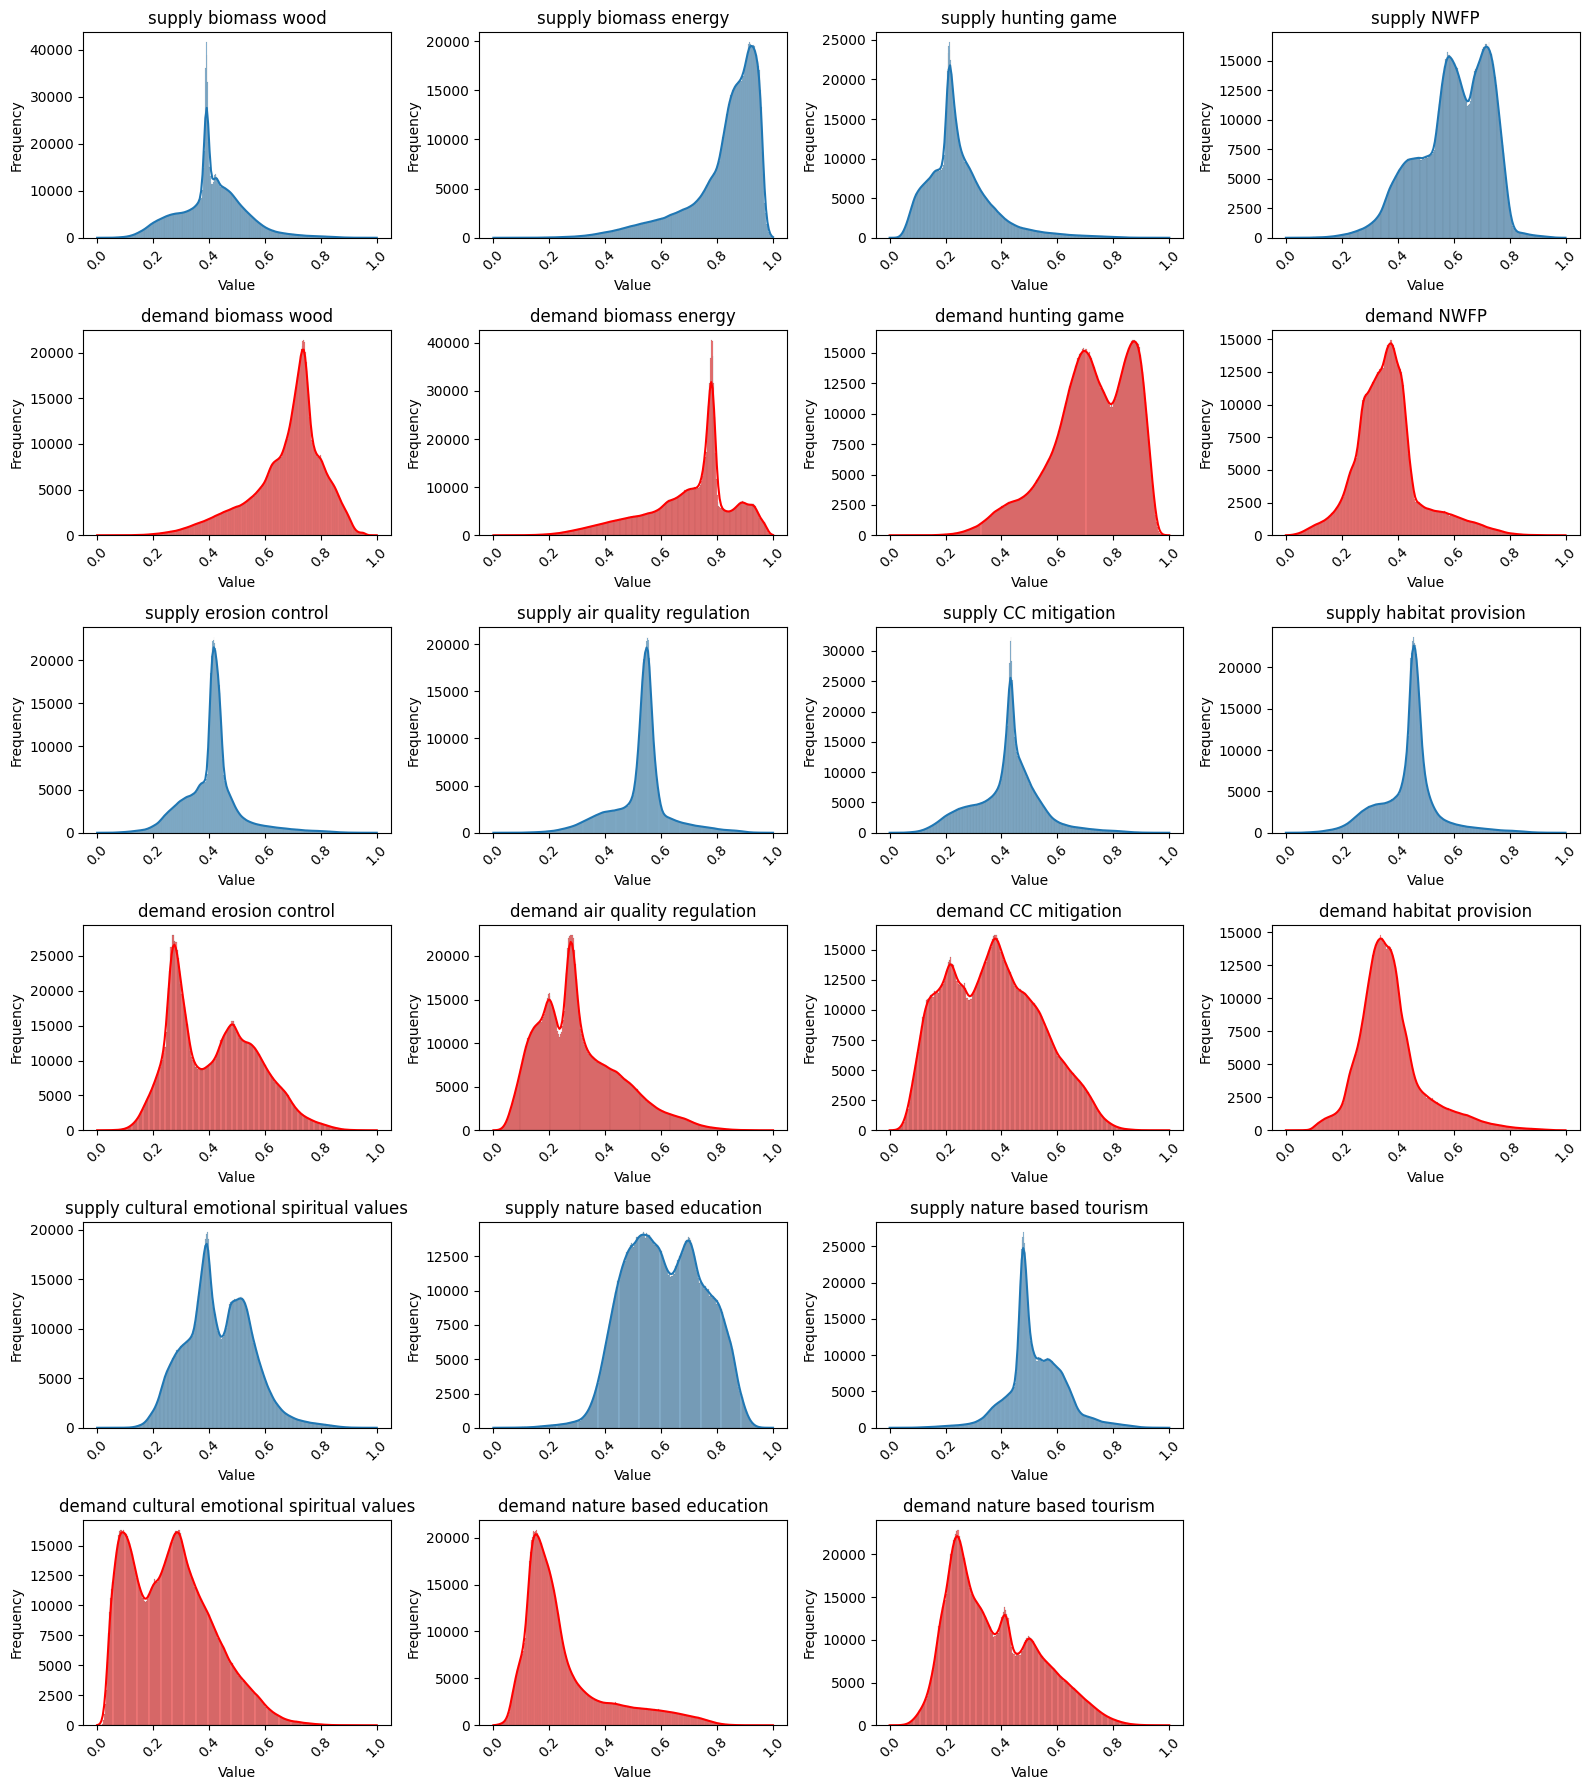

In [ ]:


# Select the specified columns
selected_supply_columns = supply_columns
selected_demand_columns = demand_columns
histogram_data_supply = data[selected_supply_columns]
histogram_data_demand = data[selected_demand_columns]

# Determine the number of variables in each category
num_supply_vars = len(selected_supply_columns)
num_demand_vars = len(selected_demand_columns)

# Determine the number of columns per row
cols_per_row = 4 # As requested by the user

# Determine the number of rows needed for each category
rows_per_category = (max(num_supply_vars, num_demand_vars) + cols_per_row - 1) // cols_per_row

# Total number of rows in the plot
n_rows = rows_per_category * 2
n_cols = cols_per_row

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3)) # Adjust figure size

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the subplots and plot the appropriate histogram
for r in range(n_rows):
    for c in range(n_cols):
        # Calculate the linear index for the current subplot
        ax_index = r * n_cols + c

        # Check if the index is within the bounds of the flattened axes array
        if ax_index < len(axes):
            ax = axes[ax_index]

            # Determine if it's a supply or demand row
            if r % 2 == 0: # Even row indices are for supply
                # Calculate the variable index within the supply list
                var_index = (r // 2) * n_cols + c
                if var_index < num_supply_vars:
                    column = selected_supply_columns[var_index]
                    column_data = histogram_data_supply[column].dropna()
                    if not column_data.empty:
                        sns.histplot(column_data, ax=ax, kde=True)
                        # Format the column name for the title
                        title = column.replace('_', ' ')
                        ax.set_title(f'{title}')
                        ax.set_xlabel('Value')
                        ax.set_ylabel('Frequency')
                        ax.tick_params(axis='x', rotation=45)
                    else:
                        # Format the column name for the title even if no data
                        title = selected_supply_columns[var_index].replace('_', ' ')
                        ax.set_title(f'No Data for {title}')
                        ax.set_xlabel('Value')
                        ax.set_ylabel('Frequency')
                else:
                    # Hide unused subplots in supply rows
                    fig.delaxes(ax)

            else: # Odd row indices are for demand
                # Calculate the variable index within the demand list
                var_index = ((r - 1) // 2) * n_cols + c
                if var_index < num_demand_vars:
                    column = selected_demand_columns[var_index]
                    column_data = histogram_data_demand[column].dropna()
                    if not column_data.empty:
                        sns.histplot(column_data, ax=ax, kde=True, color='red')
                        # Format the column name for the title
                        title = column.replace('_', ' ')
                        ax.set_title(f'{title}')
                        ax.set_xlabel('Value')
                        ax.set_ylabel('Frequency')
                        ax.tick_params(axis='x', rotation=45)
                    else:
                        # Format the column name for the title even if no data
                        title = selected_demand_columns[var_index].replace('_', ' ')
                        ax.set_title(f'No Data for {title}')
                        ax.set_xlabel('Value')
                        ax.set_ylabel('Frequency')
                else:
                    # Hide unused subplots in demand rows
                    fig.delaxes(ax)
        else:
             # If ax_index is out of bounds for axes, it means we have more calculated subplots than created,
             # which shouldn't happen with correct n_rows, n_cols calculation, but good as a safeguard.
             pass


# Use tight_layout to adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [4]:
# Basic descriptive statistics per variable
# Select all relevant supply and demand columns
all_supply_demand_columns = supply_columns + demand_columns

# Initialize an empty dictionary to store the descriptive statistics DataFrames
describe_results = {}

# Iterate through each column and calculate descriptive statistics
for column in all_supply_demand_columns:
    if column in data.columns:
        # Calculate descriptive statistics for the current column
        column_description = data[column].describe()
        # Add the Series to the dictionary, using the column name as the key
        describe_results[column] = column_description
    else:
        print(f"Warning: Column '{column}' not found in the DataFrame.")

# Convert the dictionary of Series to a DataFrame
# The index of each Series will become the rows (count, mean, std, min, etc.)
# The keys of the dictionary will become the columns (the variable names)
descriptive_stats_table = pd.DataFrame(describe_results)

# Display the resulting table
print("Descriptive Statistics for Supply and Demand Variables:")
display(descriptive_stats_table)
descriptive_stats_table.T.to_excel('descriptive_stats_table.xlsx')

Descriptive Statistics for Supply and Demand Variables:


supply_biomass_wood  supply_biomass_energy  supply_hunting_game  \
count        1485032.00000          1485032.00000        1485032.00000   
mean               0.41096                0.82521              0.25138   
std                0.11856                0.13004              0.11666   
min                0.00000                0.00000              0.00000   
25%                0.34683                0.78058              0.18070   
50%                0.40283                0.86454              0.22890   
75%                0.47842                0.91669              0.30078   
max                1.00000                1.00000              1.00000   

        supply_NWFP  supply_erosion_control  supply_air_quality_regulation  \
count 1485032.00000           1485032.00000                  1485032.00000   
mean        0.60105                 0.41077                        0.52772   
std         0.12599                 0.09984                        0.10285   
min         0.00000                 0.00000                        0.00000   
25%         0.52210                 0.36218                        0.49545   
50%         0.61419                 0.41549                        0.54100   
75%         0.70311                 0.44302                        0.56566   
max         1.00000                 1.00000                        1.00000   

       supply_CC_mitigation  supply_habitat_provision  \
count         1485032.00000             1485032.00000   
mean                0.42107                   0.44030   
std                 0.11787                   0.10450   
min                 0.00000                   0.00000   
25%                 0.35810                   0.39329   
50%                 0.43146                   0.45289   
75%                 0.48171                   0.48016   
max                 1.00000                   1.00000   

       supply_cultural_emotional_spiritual_values  \
count                               1485032.00000   
mean                                      0.43487   
std                                       0.11817   
min                                       0.00000   
25%                                       0.35434   
50%                                       0.42420   
75%                                       0.51810   
max                                       1.00000   

       supply_nature_based_education  ...  demand_biomass_energy  \
count                  1485032.00000  ...          1485032.00000   
mean                         0.61433  ...                0.70191   
std                          0.13789  ...                0.15740   
min                          0.00000  ...                0.00000   
25%                          0.50645  ...                0.61601   
50%                          0.60884  ...                0.74577   
75%                          0.72150  ...                0.79009   
max                          1.00000  ...                1.00000   

       demand_hunting_game   demand_NWFP  demand_erosion_control  \
count        1485032.00000 1485032.00000           1485032.00000   
mean               0.71978       0.36484                 0.41967   
std                0.14419       0.11768                 0.15248   
min                0.00000       0.00000                 0.00000   
25%                0.63491       0.29302                 0.28555   
50%                0.73006       0.35724                 0.41253   
75%                0.84100       0.41337                 0.53534   
max                1.00000       1.00000                 1.00000   

       demand_air_quality_regulation  demand_CC_mitigation  \
count                  1485032.00000         1485032.00000   
mean                         0.30291               0.36982   
std                          0.14777               0.16581   
min                          0.00000               0.00000   
25%                          0.19300               0.23234   
50%                          0.27826           

# Basic maps

Successfully loaded layer 'NUTS_RG_10M_2016_4326.gpkg' from the GeoPackage.
Original GeoDataFrame shape: (2016, 9)
Filtered GeoDataFrame shape (NUTS0/Countries): (332, 9)


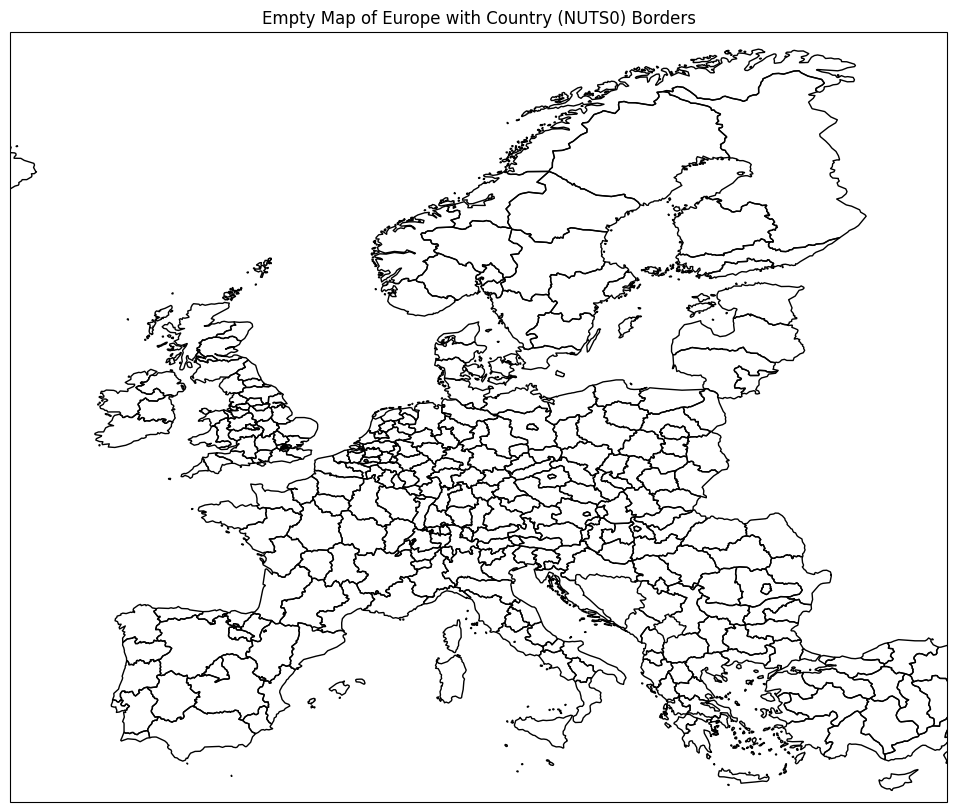

In [ ]:
# Plot an empty map of Europe showing just country borders

# Define the path to the GeoPackage file in your Google Drive
# Using the 2024 data as it's the most recent
gpkg_path = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/NUTS_RG_10M_2016_4326.gpkg'
# The layer containing NUTS levels at this resolution
layer_name = 'NUTS_RG_10M_2016_4326.gpkg'

try:
    # Check if the file exists
    if not os.path.exists(gpkg_path):
        raise FileNotFoundError(f"GeoPackage file not found at: {gpkg_path}")

    # Load the specified layer from the GeoPackage file into a GeoDataFrame
    nuts_gdf = gpd.read_file(gpkg_path, layer=layer_name)

    print(f"Successfully loaded layer '{layer_name}' from the GeoPackage.")
    print("Original GeoDataFrame shape:", nuts_gdf.shape)

    # Filter for NUTS level 0 (LEVL_CODE == 0), which corresponds to countries
    nuts0_gdf = nuts_gdf[nuts_gdf['LEVL_CODE'] == 2] # CHANGE HERE NUTS LEVEL!

    print("Filtered GeoDataFrame shape (NUTS0/Countries):", nuts0_gdf.shape)

    # Create a map
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # Set the extent to focus on Europe, including the UK
    ax.set_extent([-15, 36, 34, 72], crs=ccrs.PlateCarree())

    # Plot the NUTS0 boundaries (country borders)
    nuts0_gdf.plot(ax=ax, edgecolor='black', facecolor='none')

    # Add gridlines and labels (optional)
    # ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    # Add title
    plt.title('Empty Map of Europe with Country (NUTS0) Borders')

    plt.show()

except FileNotFoundError as e:
    print(e)
    print("Please ensure the GeoPackage file is in the specified Google Drive folder.")
except Exception as e:
    print(f"An error occurred while loading, filtering, or plotting the GeoPackage layer: {e}")
    print("Please check the file path, layer name, and the contents/schema of the GeoPackage.")

(<Figure size 1000x1000 with 2 Axes>,
 <GeoAxes: title={'center': 'demand nature based tourism'}>)

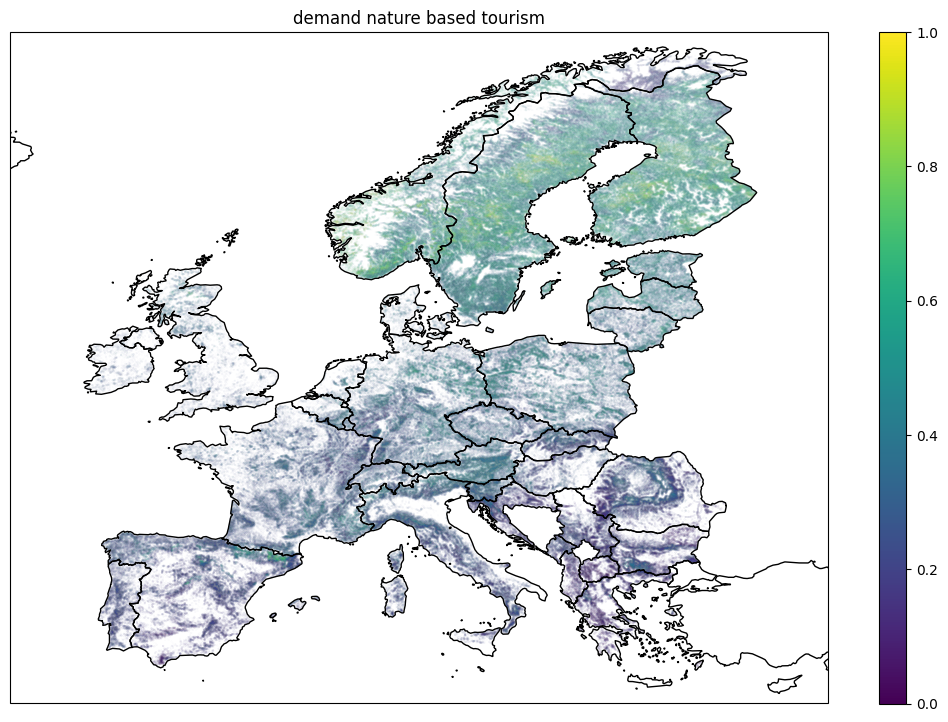

In [ ]:
# Define the path to the GeoPackage file in your Google Drive

# column = 'supply_air_quality_regulation'
column = demand_columns[10]

gpkg_path_2016 = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/NUTS_RG_10M_2016_4326.gpkg'
NUTS_level = 0
data = data
lon = data['lon_WGS84'] # check that coordinates are in WGS84 / EPSG:4326
lat = data['lat_WGS84']
markersize=0.00005
color_map = 'viridis' # https://matplotlib.org/stable/users/explain/colors/colormaps.html # Greens
title = column.replace('_', ' ')

plot_one_map(gpkg_path_2016, NUTS_level, data, lon, lat, column, markersize, color_map, title)

In [5]:
# Calculate the sum of all supply columns
data['supply_sum'] = data[supply_columns].sum(axis=1)

# Scale the new 'supply_sum' column to a 0-1 range
# Use MinMaxScaler from scikit-learn for this purpose

scaler = MinMaxScaler()
# Reshape the column to be 2D for the scaler
data['supply_sum_scaled'] = scaler.fit_transform(data[['supply_sum']])

print("New columns 'supply_sum' and 'supply_sum_scaled' created and added to the DataFrame.")
display(data[['supply_sum', 'supply_sum_scaled']].head())

New columns 'supply_sum' and 'supply_sum_scaled' created and added to the DataFrame.


supply_sum  supply_sum_scaled
0     5.75006            0.58367
1     5.73901            0.58235
2     5.75180            0.58388
3     5.76699            0.58569
4     5.75561            0.58433

Plot saved as '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/summary_fes_supply.pdf'


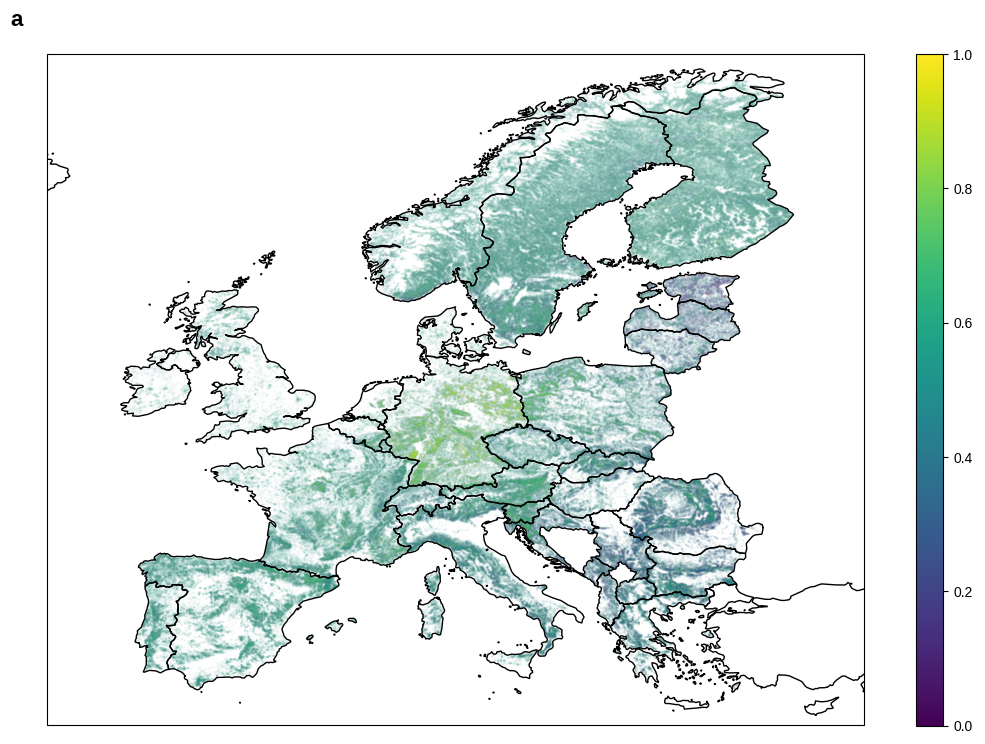

In [6]:
column = 'supply_sum_scaled'

gpkg_path_2016 = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/NUTS_RG_10M_2016_4326.gpkg'
NUTS_level = 0
data = data
lon = data['lon_WGS84'] # check that coordinates are in WGS84 / EPSG:4326
lat = data['lat_WGS84']
markersize=0.00005
color_map = 'viridis' # https://matplotlib.org/stable/users/explain/colors/colormaps.html # Greens
# title = column.replace('_', ' ')
title =  ''# 'Summary FES supply'

# Create the plot using the existing function
# plot_one_map now returns the figure and axes objects
fig, ax = plot_one_map(gpkg_path_2016, NUTS_level, data, lon, lat, column, markersize, color_map, title)

# Check if the plot was created successfully
if fig is not None and ax is not None:
    # Set sans-serif font for the figure
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'Liberation Sans', 'DejaVu Sans'] # Example sans-serif fonts

    ax.text(0.02, 0.88, 'a', transform=fig.transFigure, fontsize=16, fontweight='bold', va='top', ha='left') # y axis is the second parameter

    # Save the figure as a high-resolution PNG
    output_path = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/summary_fes_supply.pdf' # Define output path
    plt.savefig(output_path, bbox_inches='tight', dpi=600) # Specify dpi for high resolution

    print(f"Plot saved as '{output_path}'")


    # Show the plot in the notebook
    plt.show()
else:
    print("Plot creation failed. Cannot save or display.")

In [7]:
# Calculate the sum of all supply columns
data['demand_sum'] = data[demand_columns].sum(axis=1)

scaler = MinMaxScaler()
# Reshape the column to be 2D for the scaler
data['demand_sum_scaled'] = scaler.fit_transform(data[['demand_sum']])

print("New columns 'demand_sum' and 'demand_sum_scaled' created and added to the DataFrame.")
display(data[['demand_sum', 'demand_sum_scaled']].head())

New columns 'demand_sum' and 'demand_sum_scaled' created and added to the DataFrame.


demand_sum  demand_sum_scaled
0     5.74822            0.57405
1     5.71500            0.56708
2     5.60229            0.54347
3     5.72246            0.56865
4     5.70736            0.56548

Plot saved as '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/summary_fes_demand.pdf'


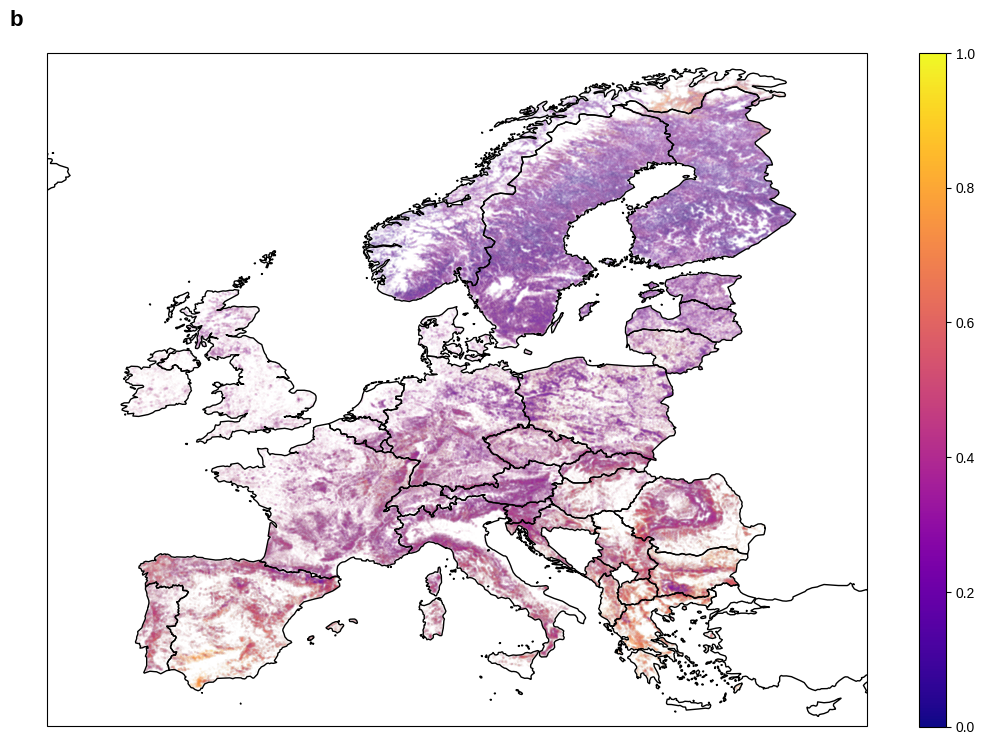

In [8]:
column = 'demand_sum_scaled'

gpkg_path_2016 = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/NUTS_RG_10M_2016_4326.gpkg'
NUTS_level = 0
data = data
lon = data['lon_WGS84'] # check that coordinates are in WGS84 / EPSG:4326
lat = data['lat_WGS84']
markersize=0.00005
color_map = 'plasma' # https://matplotlib.org/stable/users/explain/colors/colormaps.html # Greens
# title = column.replace('_', ' ')
title =  ''  #  'Summary FES demand'

# Create the plot using the existing function
# plot_one_map now returns the figure and axes objects
fig, ax = plot_one_map(gpkg_path_2016, NUTS_level, data, lon, lat, column, markersize, color_map, title)

# Check if the plot was created successfully
if fig is not None and ax is not None:
    # Set sans-serif font for the figure
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'Liberation Sans', 'DejaVu Sans'] # Example sans-serif fonts

    ax.text(0.02, 0.88, 'b', transform=fig.transFigure, fontsize=16, fontweight='bold', va='top', ha='left') # y axis is the second parameter

    # Save the figure as a high-resolution PNG
    output_path = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/summary_fes_demand.pdf' # Define output path
    plt.savefig(output_path, bbox_inches='tight', dpi=600) # Specify dpi for high resolution

    print(f"Plot saved as '{output_path}'")

    # Show the plot in the notebook
    plt.show()
else:
    print("Plot creation failed. Cannot save or display.")

# Check for external validity /   see how 'valid' or 'significant' are the results

In [ ]:
# Calculate the correlation between 'slope' and 'supply_erosion_control'
correlation = data[['access2015', 'supply_healthcare']].corr()

# Print the correlation values
display(correlation)

access2015  supply_healthcare
access2015            1.00000           -0.20090
supply_healthcare    -0.20090            1.00000

In [ ]:
# This is to see if there is more supply of habitat protection in areas within Natura 2000 network and in those which are out of it

# Select the relevant columns and handle missing values
ttest_data_cv = data[['supply_habitat', 'asites_forest']].dropna().copy()

# Ensure 'asites_forest' is treated as a categorical variable (0 or 1)
ttest_data_cv['asites_forest'] = pd.to_numeric(ttest_data_cv['asites_forest'], errors='coerce').fillna(-1).astype(int)
ttest_data_cv = ttest_data_cv[ttest_data_cv['asites_forest'].isin([0, 1])].copy()

# Check if there is enough data for sampling and cross-validation
sample_size = 10000
n_splits = 5

if len(ttest_data_cv) < sample_size:
    print(f"Not enough data points ({len(ttest_data_cv)}) to draw a sample of size {sample_size}.")
else:
    # Initialize KFold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    print(f"Performing {n_splits}-fold cross-validation with sample size {sample_size}:")

    fold = 1
    # Iterate over each fold
    for train_index, test_index in kf.split(ttest_data_cv):
        print(f"\n--- Fold {fold} ---")

        # Get the data for the current fold
        fold_data = ttest_data_cv.iloc[test_index].copy()

        # Check if the fold has enough data for sampling
        if len(fold_data) < sample_size:
            print(f"Fold {fold} does not have enough data points ({len(fold_data)}) for sampling size {sample_size}. Skipping this fold.")
            fold += 1
            continue

        # Separate the fold data into two groups based on 'asites_forest'
        group_0_fold = fold_data[fold_data['asites_forest'] == 0].copy()
        group_1_fold = fold_data[fold_data['asites_forest'] == 1].copy()

        # Determine the size of the sample for each group to maintain approximate proportion
        total_fold_size = len(group_0_fold) + len(group_1_fold)
        if total_fold_size == 0:
            print(f"Fold {fold} is empty. Skipping.")
            fold += 1
            continue

        prop_group_0 = len(group_0_fold) / total_fold_size
        prop_group_1 = len(group_1_fold) / total_fold_size

        sample_size_0 = int(sample_size * prop_group_0)
        sample_size_1 = sample_size - sample_size_0 # Ensure total sample size is 10000

        # Adjust sample sizes if a group is smaller than the calculated sample size
        sample_size_0 = min(sample_size_0, len(group_0_fold))
        sample_size_1 = min(sample_size_1, len(group_1_fold))

        # Ensure total sample size is 10000 after adjustments if possible
        # This might slightly change proportions if one group is very small
        current_total_sample_size = sample_size_0 + sample_size_1
        if current_total_sample_size < sample_size:
             # Distribute the remaining sample size to the larger group if possible
             if len(group_0_fold) > sample_size_0:
                 sample_size_0 += (sample_size - current_total_sample_size)
             elif len(group_1_fold) > sample_size_1:
                  sample_size_1 += (sample_size - current_total_sample_size)

             # Recheck after redistribution
             current_total_sample_size = sample_size_0 + sample_size_1
             if current_total_sample_size != sample_size:
                 print(f"Warning: Unable to achieve exact sample size of {sample_size} in Fold {fold}. Using sample size {current_total_sample_size}.")


        # Check if both groups in the fold have enough data points for sampling
        if len(group_0_fold) < sample_size_0 or len(group_1_fold) < sample_size_1:
             print(f"Not enough data points in one or both groups in Fold {fold} for the calculated sample sizes ({sample_size_0} for group 0, {sample_size_1} for group 1). Skipping this fold.")
             fold += 1
             continue


        # Take a random sample from each group
        group_0_sampled = group_0_fold.sample(n=sample_size_0, random_state=42)['supply_habitat']
        group_1_sampled = group_1_fold.sample(n=sample_size_1, random_state=42)['supply_habitat']


        # Check if both sampled groups have enough data points (at least 2)
        if len(group_0_sampled) < 2 or len(group_1_sampled) < 2:
            print(f"Not enough data points in one or both sampled groups (asites_forest 0 or 1) in Fold {fold} to perform the t-test.")
            print(f"  Number of data points in group 0 (sampled): {len(group_0_sampled)}")
            print(f"  Number of data points in group 1 (sampled): {len(group_1_sampled)}")
        else:
            # Perform the independent samples t-test on the sampled data
            try:
                t_statistic, p_value = ttest_ind(group_0_sampled, group_1_sampled, equal_var=False)

                # Print the results for the current fold's sample
                print(f"  Mean 'supply_habitat' for asites_forest == 0 (sampled): {group_0_sampled.mean():.4f}")
                print(f"  Mean 'supply_habitat' for asites_forest == 1 (sampled): {group_1_sampled.mean():.4f}")
                print(f"  T-statistic (sampled): {t_statistic:.4f}")
                print(f"  P-value (sampled): {p_value:.4f}")

                # Interpret the p-value (using a significance level of 0.05)
                alpha = 0.05
                if p_value < alpha:
                    print(f"  Result: The difference in means is statistically significant at the {alpha} level for this sample.")
                else:
                    print(f"  Result: The difference in means is not statistically significant at the {alpha} level for this sample.")

            except Exception as e:
                print(f"An error occurred during the t-test for Fold {fold}: {e}")

        fold += 1

Performing 5-fold cross-validation with sample size 10000:

--- Fold 1 ---
  Mean 'supply_habitat' for asites_forest == 0 (sampled): 0.4383
  Mean 'supply_habitat' for asites_forest == 1 (sampled): 0.4523
  T-statistic (sampled): -3.1880
  P-value (sampled): 0.0015
  Result: The difference in means is statistically significant at the 0.05 level for this sample.

--- Fold 2 ---
  Mean 'supply_habitat' for asites_forest == 0 (sampled): 0.4384
  Mean 'supply_habitat' for asites_forest == 1 (sampled): 0.4581
  T-statistic (sampled): -4.3221
  P-value (sampled): 0.0000
  Result: The difference in means is statistically significant at the 0.05 level for this sample.

--- Fold 3 ---
  Mean 'supply_habitat' for asites_forest == 0 (sampled): 0.4374
  Mean 'supply_habitat' for asites_forest == 1 (sampled): 0.4523
  T-statistic (sampled): -3.2251
  P-value (sampled): 0.0013
  Result: The difference in means is statistically significant at the 0.05 level for this sample.

--- Fold 4 ---
  Mean 'su

In [ ]:
# Here see the relation between growing stock and supply of wood for individual country

# Define the path to the GeoPackage file in your Google Drive
gpkg_path_2016 = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/NUTS_RG_10M_2016_4326.gpkg'
layer_name = 'NUTS_RG_10M_2016_4326.gpkg'

# Load the NUTS regions
try:
    nuts_gdf = gpd.read_file(gpkg_path_2016, layer=layer_name)

    # Filter for NUTS level 0 (countries) and specifically for Germany ('DE')
    germany_boundary_gdf = nuts_gdf[(nuts_gdf['LEVL_CODE'] == 0) & (nuts_gdf['CNTR_CODE'] == 'SI')]

    if germany_boundary_gdf.empty:
        print("Country not found in the NUTS GeoDataFrame.")
    else:
        # Get the geometry of Germany
        # Ensure the Germany boundary is in the same CRS as the data points GeoDataFrame if needed
        # Based on previous attempts, data['lon'] and data['lat'] are in EPSG:3035
        # Let's reproject the Germany boundary to EPSG:3035 for consistent spatial filtering
        germany_geometry_projected = germany_boundary_gdf.to_crs(epsg=3035).geometry.iloc[0]

        # Convert your data DataFrame to a GeoDataFrame for spatial filtering
        # Assuming 'lon' and 'lat' are in EPSG:3035 based on the previous cell
        data_gdf = gpd.GeoDataFrame(data.copy(), geometry=gpd.points_from_xy(data['lon'], data['lat']), crs="EPSG:3035")

        # Filter data points to only include those within the Germany boundary
        data_germany = data_gdf[data_gdf.geometry.within(germany_geometry_projected)].copy()

        print(f"Number of data points within Germany: {len(data_germany)}")

        if not data_germany.empty:
            # Select the specified columns from the filtered data
            # User wants 'above_biomass' and 'supply_biomass_wood'
            selected_columns_germany = data_germany[['gsv', 'supply_biomass_wood']].copy()

            # Calculate the correlation matrix for data within Germany
            correlation_biomass_supply_germany = selected_columns_germany.corr()

            # Print the correlation values
            print("\nCorrelation between 'gsv' and 'supply_biomass_wood':")
            display(correlation_biomass_supply_germany)
        else:
            print("No data points found within the boundary of Germany.")

except FileNotFoundError as e:
    print(e)
    print("Please ensure the NUTS GeoPackage file is in the specified Google Drive folder.")
except Exception as e:
    print(f"An error occurred while processing the NUTS data or filtering the data points: {e}")

Number of data points within Germany: 11486

Correlation between 'gsv' and 'supply_biomass_wood':


gsv  supply_biomass_wood
gsv                 1.00000              0.51903
supply_biomass_wood 0.51903              1.00000

In [ ]:
# Check shares of all supply and demand data which is lower than 0.4 and higher than 0.6


# Check if all specified columns exist in the DataFrame
missing_columns = [col for col in supply_demand_columns if col not in data.columns]
if missing_columns:
    print(f"Error: The following columns were not found in the DataFrame: {missing_columns}")
else:
    results = {}
    for column in supply_demand_columns:
        # Drop missing values for accurate count
        column_data = data[column].dropna()
        total_count = len(column_data)

        if total_count > 0:
            # Count values lower than 0.3
            lower_than_0_3_count = (column_data < 0.3).sum()
            share_lower_than_0_3 = lower_than_0_3_count / total_count

            # Count values higher than 0.7
            higher_than_0_7_count = (column_data > 0.7).sum()
            share_higher_than_0_7 = higher_than_0_7_count / total_count

            results[column] = {
                'Share < 0.3': f'{share_lower_than_0_3:.4f}',
                'Share > 0.7': f'{share_higher_than_0_7:.4f}'
            }
        else:
            results[column] = {
                'Share < 0.3': 'N/A (No data)',
                'Share > 0.7': 'N/A (No data)'
            }

    # Display the results in a pandas DataFrame for better readability
    results_df = pd.DataFrame.from_dict(results, orient='index')
    results_df.index.name = 'Variable'

# Convert the share columns to numeric, coercing errors
results_df_numeric = results_df.apply(pd.to_numeric, errors='coerce')

# Calculate the mean for each column
mean_shares = results_df_numeric.mean()

# Display the mean values
print("Mean share values across all variables:")
display(mean_shares)


Mean share values across all variables:


Share < 0.3   0.23147
Share > 0.7   0.15908
dtype: float64

In [ ]:
# Check which share of demand-supply relations is higher than 0.4
supply_demand_data = data[supply_demand_columns]

# List of base names for supply and demand variables
variable_base_names = [
    'biomass_wood', 'biomass_energy', 'hunting_game',
    'NWFP', 'erosion_control', 'air_quality',
    'CC_mitigation', 'habitat', 'cultural',
    'education', 'healthcare'
]

# Select the supply and demand columns and create a copy to avoid SettingWithCopyWarning
supply_demand_columns_list = [f'supply_{base}' for base in variable_base_names] + [f'demand_{base}' for base in variable_base_names]
supply_demand_data = data[supply_demand_columns_list].copy()


# Calculate the difference between demand and supply for each variable
for base_name in variable_base_names:
    supply_col = f'supply_{base_name}'
    demand_col = f'demand_{base_name}'
    delta_col = f'delta_{base_name}'

    # Check if both supply and demand columns exist before calculating the difference
    if supply_col in supply_demand_data.columns and demand_col in supply_demand_data.columns:
        supply_demand_data[delta_col] = supply_demand_data[demand_col] - supply_demand_data[supply_col]
        print(f"Created new column: {delta_col}")
    else:
        print(f"Warning: Could not create '{delta_col}'. Missing column(s): {supply_col if supply_col not in supply_demand_data.columns else ''} {demand_col if demand_col not in supply_demand_data.columns else ''}")



In [ ]:
# Select the last 11 columns of supply_demand_data (the delta columns)
delta_columns_data = supply_demand_data.iloc[:, -11:]

# Initialize a dictionary to store the results
delta_results = {}

# Iterate through each of the delta columns
for column in delta_columns_data.columns:
    # Drop missing values for accurate count
    column_data = delta_columns_data[column].dropna()
    total_count = len(column_data)

    if total_count > 0:
        # Count values larger than 0.2
        larger_than_0_2_count = (column_data > 0.2).sum()
        share_larger_than_0_2 = larger_than_0_2_count / total_count

        delta_results[column] = f'{share_larger_than_0_2:.4f}'
    else:
        delta_results[column] = 'N/A (No data)'

# Display the results in a pandas Series or DataFrame
delta_results_series = pd.Series(delta_results, name='Share > 0.2')
print("Share of values larger than 0.2 for delta columns:")
display(delta_results_series)

# Convert the Series to numeric values, coercing errors
delta_results_numeric = pd.to_numeric(delta_results_series, errors='coerce')

# Calculate the mean of the numeric Series
mean_delta_share = delta_results_numeric.mean()

# Display the mean value
print("Mean share of values larger than 0.2 across all delta columns:")
display(mean_delta_share)

Share of values larger than 0.2 for delta columns:


delta_biomass_wood       0.6425
delta_biomass_energy     0.0572
delta_hunting_game       0.9142
delta_NWFP               0.0265
delta_erosion_control    0.1774
delta_air_quality        0.0425
delta_CC_mitigation      0.1569
delta_habitat            0.0528
delta_cultural           0.0478
delta_education          0.0009
delta_healthcare         0.0511
Name: Share > 0.2, dtype: object

Mean share of values larger than 0.2 across all delta columns:


np.float64(0.1972545454545455)

In [ ]:
# Select the last 11 columns of supply_demand_data (the delta columns)
delta_columns_data = supply_demand_data.iloc[:, -11:]

# Initialize a dictionary to store the results
delta_results = {}

# Iterate through each of the delta columns
for column in delta_columns_data.columns:
    # Drop missing values for accurate count
    column_data = delta_columns_data[column].dropna()
    total_count = len(column_data)

    if total_count > 0:
        # Count values lower than 0.4
        lower_than_0_4_count = (column_data < 0.4).sum()
        share_lower_than_0_4 = lower_than_0_4_count / total_count

        # Count values higher than 0.6
        higher_than_0_6_count = (column_data > 0.6).sum()
        share_higher_than_0_6 = higher_than_0_6_count / total_count


        delta_results[column] = {
            'Share < 0.4': f'{share_lower_than_0_4:.4f}',
            'Share > 0.6': f'{share_higher_than_0_6:.4f}'
        }
    else:
        delta_results[column] = {
            'Share < 0.4': 'N/A (No data)',
            'Share > 0.6': 'N/A (No data)'
        }

# Display the results in a pandas DataFrame for better readability
delta_results_df = pd.DataFrame.from_dict(delta_results, orient='index')
delta_results_df.index.name = 'Variable'
print("Share of values lower than 0.4 and higher than 0.6 for delta columns:")
display(delta_results_df)

# Convert the share columns to numeric, coercing errors
delta_results_numeric = delta_results_df.apply(pd.to_numeric, errors='coerce')

# Calculate the mean for each column
mean_delta_shares = delta_results_numeric.mean()

# Display the mean values
print("\nMean share values across all delta columns:")
display(mean_delta_shares)

Share of values lower than 0.4 and higher than 0.6 for delta columns:


Share < 0.4 Share > 0.6
Variable                                     
delta_biomass_wood         0.7044      0.0309
delta_biomass_energy       0.9958      0.0000
delta_hunting_game         0.2712      0.1885
delta_NWFP                 0.9979      0.0000
delta_erosion_control      0.9653      0.0008
delta_air_quality          0.9979      0.0000
delta_CC_mitigation        0.9796      0.0001
delta_habitat              0.9988      0.0000
delta_cultural             0.9949      0.0000
delta_education            1.0000      0.0000
delta_healthcare           0.9992      0.0000


Mean share values across all delta columns:


Share < 0.4   0.90045
Share > 0.6   0.02003
dtype: float64

# Cross-correlation and CFA

Index of heatmap matrix: Index(['supply_biomass_wood', 'supply_biomass_energy', 'supply_hunting_game',
       'supply_NWFP', 'supply_erosion_control',
       'supply_air_quality_regulation', 'supply_CC_mitigation',
       'supply_habitat_provision',
       'supply_cultural_emotional_spiritual_values',
       'supply_nature_based_education', 'supply_nature_based_tourism'],
      dtype='object')
Columns of heatmap matrix: Index(['supply_biomass_wood', 'supply_biomass_energy', 'supply_hunting_game',
       'supply_NWFP', 'supply_erosion_control',
       'supply_air_quality_regulation', 'supply_CC_mitigation',
       'supply_habitat_provision',
       'supply_cultural_emotional_spiritual_values',
       'supply_nature_based_education', 'supply_nature_based_tourism'],
      dtype='object')


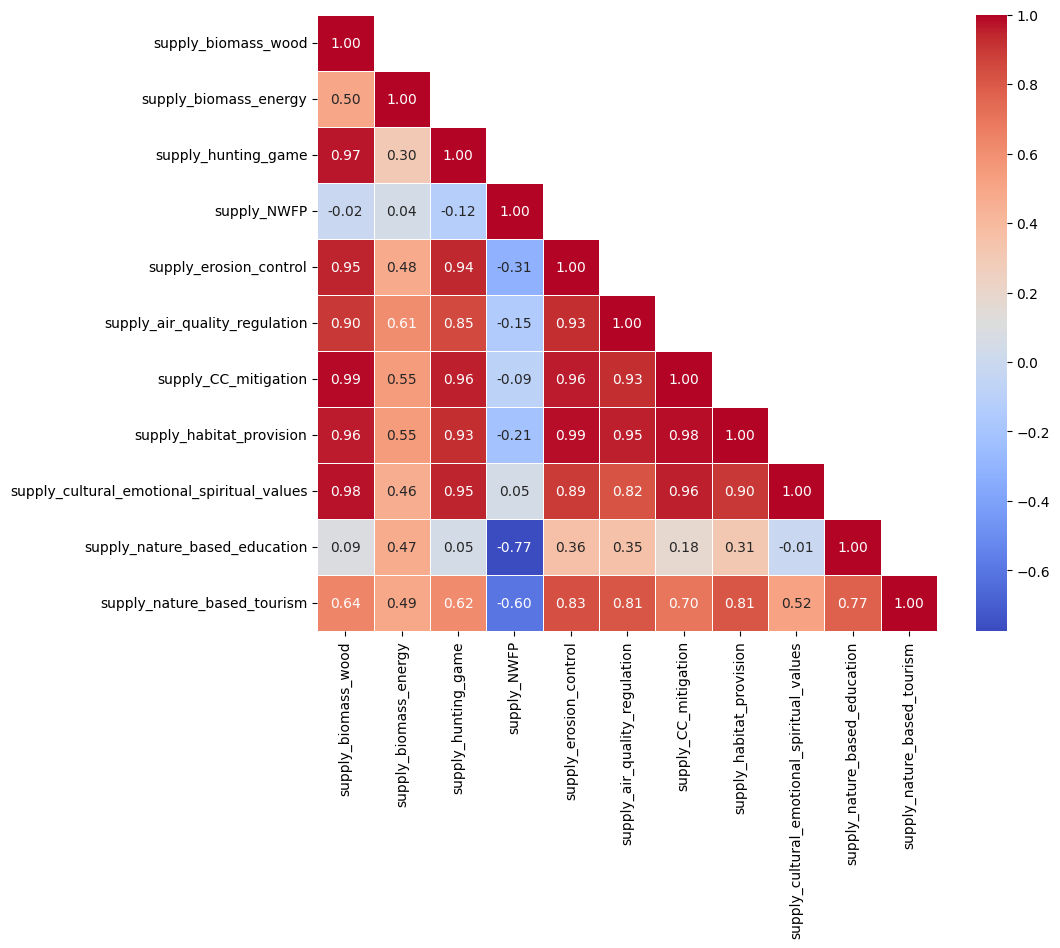

In [ ]:
# Select the specified columns
selected_columns = supply_columns
correlation_data = data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Print the index and columns of the matrix to verify
print("Index of heatmap matrix:", correlation_matrix.index)
print("Columns of heatmap matrix:", correlation_matrix.columns)

# Generate a heatmap
plt.figure(figsize=(10, 8))

# Create a mask for the upper triangle (excluding the diagonal)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
# plt.title('Cross-Correlation Heatmap of FES supply variables')

# The tick labels should automatically be correct
ax.set_yticklabels(correlation_matrix.index)
ax.set_xticklabels(correlation_matrix.columns)

plt.show()

Index of heatmap matrix: Index(['demand_biomass_wood', 'demand_biomass_energy', 'demand_hunting_game',
       'demand_NWFP', 'demand_erosion_control',
       'demand_air_quality_regulation', 'demand_CC_mitigation',
       'demand_habitat_provision',
       'demand_cultural_emotional_spiritual_values',
       'demand_nature_based_education', 'demand_nature_based_tourism'],
      dtype='object')
Columns of heatmap matrix: Index(['demand_biomass_wood', 'demand_biomass_energy', 'demand_hunting_game',
       'demand_NWFP', 'demand_erosion_control',
       'demand_air_quality_regulation', 'demand_CC_mitigation',
       'demand_habitat_provision',
       'demand_cultural_emotional_spiritual_values',
       'demand_nature_based_education', 'demand_nature_based_tourism'],
      dtype='object')


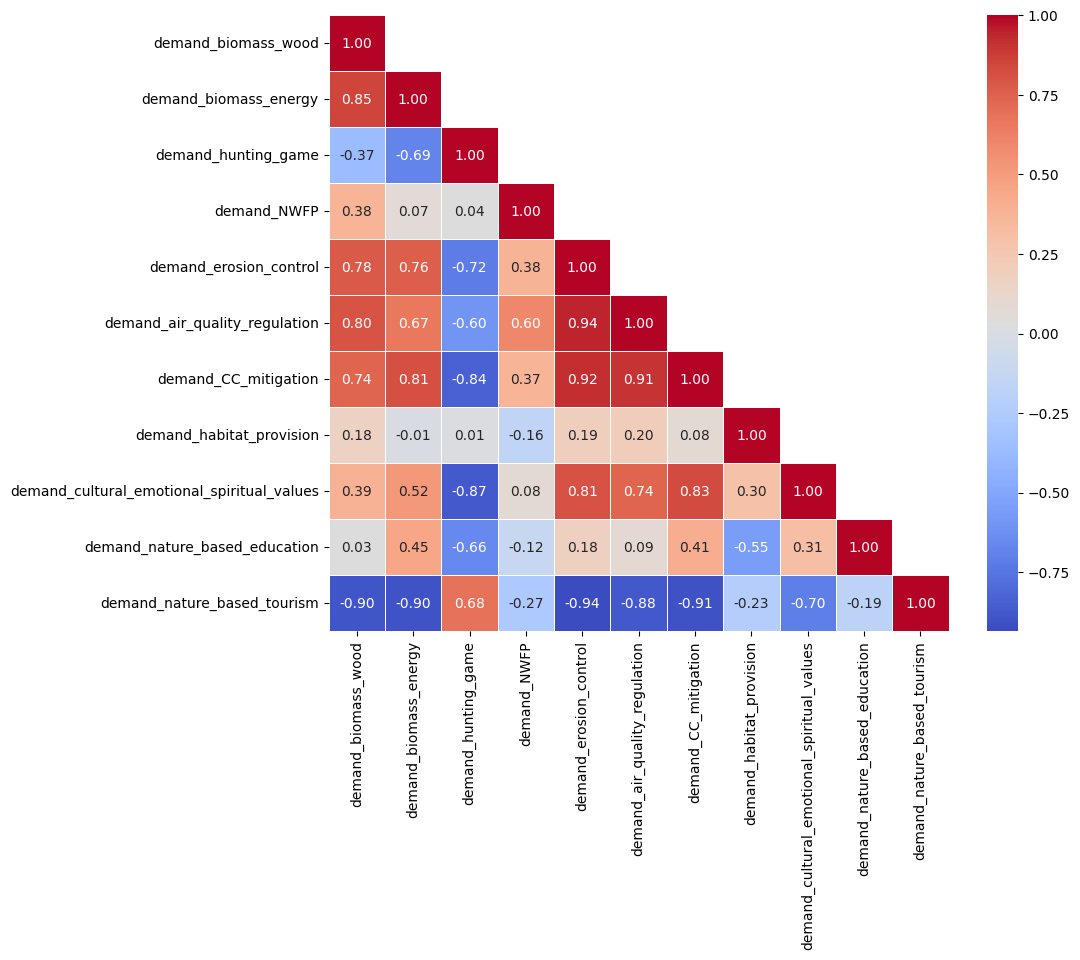

In [ ]:
# Select the specified columns
selected_columns = demand_columns
correlation_data = data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Print the index and columns of the matrix to verify
print("Index of heatmap matrix:", correlation_matrix.index)
print("Columns of heatmap matrix:", correlation_matrix.columns)

# Generate a heatmap
plt.figure(figsize=(10, 8))

# Create a mask for the upper triangle (excluding the diagonal)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
# plt.title('Cross-Correlation Heatmap of FES demand variables')

# The tick labels should automatically be correct
ax.set_yticklabels(correlation_matrix.index)
ax.set_xticklabels(correlation_matrix.columns)

plt.show()

In [ ]:
correlation_matrix

demand_biomass_wood  \
demand_biomass_wood                                     1.00000   
demand_biomass_energy                                   0.85309   
demand_hunting_game                                    -0.37327   
demand_NWFP                                             0.37685   
demand_erosion_control                                  0.77923   
demand_air_quality_regulation                           0.80088   
demand_CC_mitigation                                    0.73718   
demand_habitat_provision                                0.17555   
demand_cultural_emotional_spiritual_values              0.38736   
demand_nature_based_education                           0.03440   
demand_nature_based_tourism                            -0.89829   

                                            demand_biomass_energy  \
demand_biomass_wood                                       0.85309   
demand_biomass_energy                                     1.00000   
demand_hunting_game                                      -0.68552   
demand_NWFP                                               0.06887   
demand_erosion_control                                    0.76295   
demand_air_quality_regulation                             0.66598   
demand_CC_mitigation                                      0.81459   
demand_habitat_provision                                 -0.00522   
demand_cultural_emotional_spiritual_values                0.52013   
demand_nature_based_education                             0.44938   
demand_nature_based_tourism                              -0.90046   

                                            demand_hunting_game  demand_NWFP  \
demand_biomass_wood                                    -0.37327      0.37685   
demand_biomass_energy                                  -0.68552      0.06887   
demand_hunting_game                                     1.00000      0.03663   
demand_NWFP                                             0.03663      1.00000   
demand_erosion_control                                 -0.72057      0.38324   
demand_air_quality_regulation                          -0.59637      0.59525   
demand_CC_mitigation                                   -0.84210      0.37348   
demand_habitat_provision                                0.01099     -0.15814   
demand_cultural_emotional_spiritual_values             -0.86950      0.08095   
demand_nature_based_education                          -0.66049     -0.11906   
demand_nature_based_tourism                             0.68350     -0.27251   

                                            demand_erosion_control  \
demand_biomass_wood                                        0.77923   
demand_biomass_energy                                      0.76295   
demand_hunting_game                                       -0.72057   
demand_NWFP                                                0.38324   
demand_erosion_control                                     1.00000   
demand_air_quality_regulation                              0.94033   
demand_CC_mitigation                                       0.92056   
demand_habitat_provision                                   0.19447   
demand_cultural_emotional_spiritual_values                 0.80844   
demand_nature_based_education                              0.18016   
demand_nature_based_tourism                               -0.93633   

                                            demand_air_quality_regulation  \
demand_biomass_wood                                               0.80088   
demand_biomass_energy                                             0.66598   
demand_hunting_game                                              -0.59637   
demand_NWFP                                                       0.59525   
demand_erosion_control                                            0.94033   
demand_air_quality_regulation                                     1.00000   
demand_CC_mitigation                                              0.9

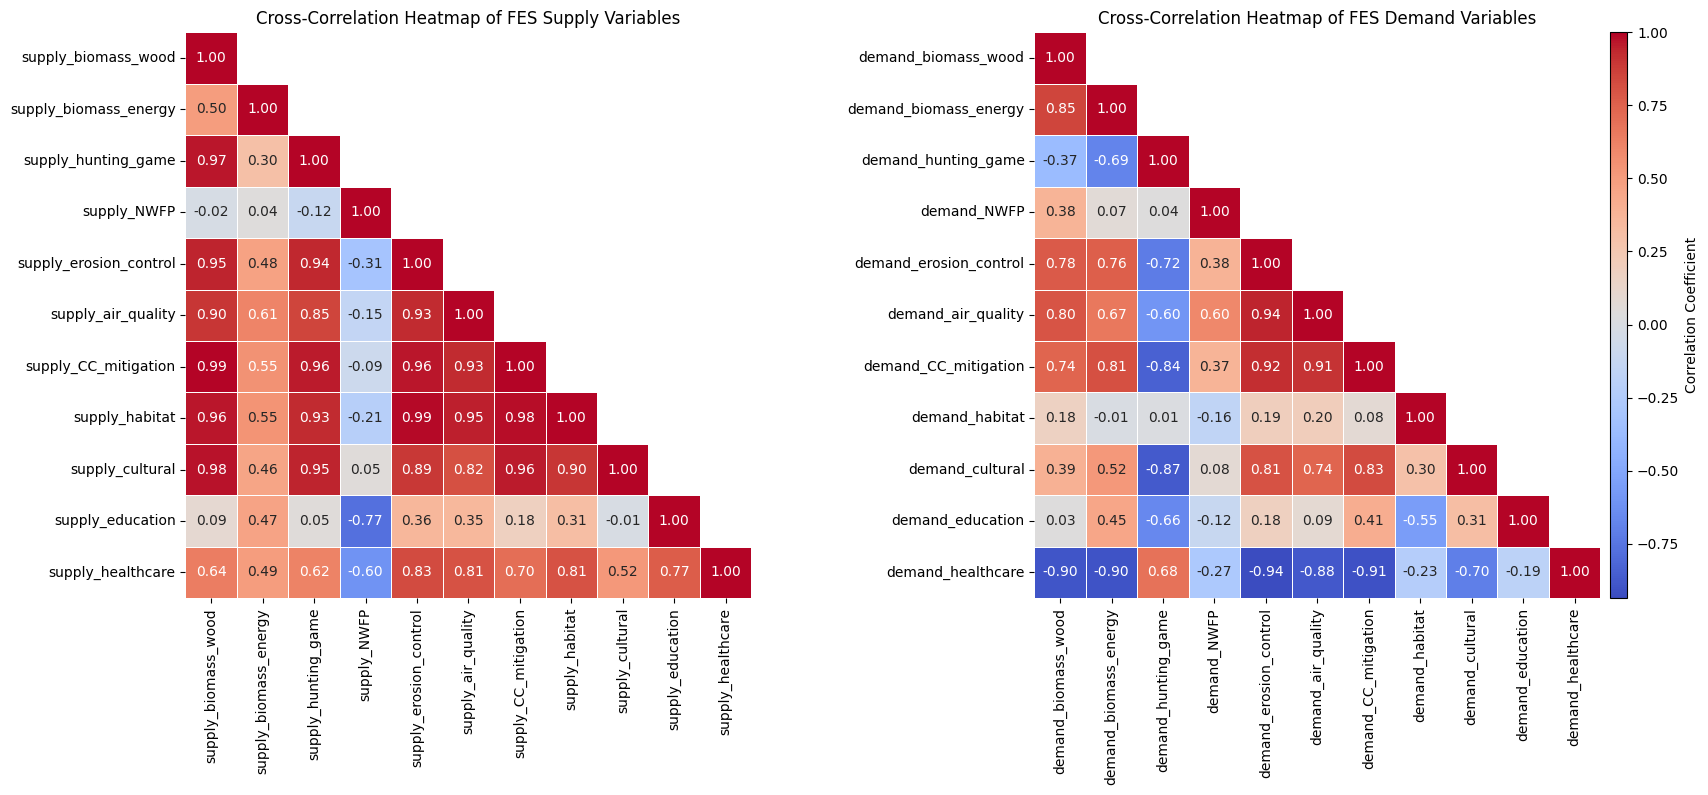

In [ ]:

# Calculate correlation matrix for supply columns
supply_correlation_matrix = data[supply_columns].corr()

# Calculate correlation matrix for demand columns
demand_correlation_matrix = data[demand_columns].corr()

# Determine the global minimum and maximum correlation values across both matrices
vmin = min(supply_correlation_matrix.values.min(), demand_correlation_matrix.values.min())
vmax = max(supply_correlation_matrix.values.max(), demand_correlation_matrix.values.max())

# Create a figure and a grid of subplots
# Adjust the figure size to accommodate the colorbar space
fig, axes = plt.subplots(1, 2, figsize=(18, 8)) # Reduced width slightly to leave space for colorbar

# --- Plotting Supply Heatmap ---
# Create a mask for the upper triangle (excluding the diagonal) for supply
mask_supply = np.triu(np.ones_like(supply_correlation_matrix, dtype=bool), k=1)

# Plot the supply heatmap in the first subplot, using the global vmin and vmax, with no colorbar here
sns.heatmap(supply_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask_supply, ax=axes[0], vmin=vmin, vmax=vmax, cbar=False)
axes[0].set_title('Cross-Correlation Heatmap of FES Supply Variables')
axes[0].set_yticklabels(supply_correlation_matrix.index)
axes[0].set_xticklabels(supply_correlation_matrix.columns, rotation=90) # Rotate x-axis labels for better readability
axes[0].set_aspect('equal', adjustable='box') # Set aspect ratio to equal

# --- Plotting Demand Heatmap ---
# Create a mask for the upper triangle (excluding the diagonal) for demand
mask_demand = np.triu(np.ones_like(demand_correlation_matrix, dtype=bool), k=1)

# Plot the demand heatmap in the second subplot, using the global vmin and vmax
# We will manually add the colorbar next to this plot
# Store the mappable object returned by heatmap
heatmap_mappable = sns.heatmap(demand_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask_demand, ax=axes[1], vmin=vmin, vmax=vmax, cbar=False) # Turn off default colorbar
axes[1].set_title('Cross-Correlation Heatmap of FES Demand Variables')
axes[1].set_yticklabels(demand_correlation_matrix.index)
axes[1].set_xticklabels(demand_correlation_matrix.columns, rotation=90) # Rotate x-axis labels for better readability
axes[1].set_aspect('equal', adjustable='box') # Set aspect ratio to equal

# --- Manually add the shared colorbar ---
# Create an axes for the colorbar next to the second subplot
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="3%", pad=0.1, axes_class=plt.Axes)

# Create a ScalarMappable object to use for the colorbar
# Use the same colormap and normalization as the heatmaps
sm = cm.ScalarMappable(cmap='coolwarm', norm=colors.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([]) # Set an empty array as we are using it for mapping values

# Create the colorbar using the ScalarMappable object
cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
cbar.set_label('Correlation Coefficient')

# Adjust layout to prevent labels overlapping and make space for the colorbar
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Select the specified supply columns
supply_correlation_data = data[supply_columns]

# Calculate the correlation matrix
supply_correlation_matrix = supply_correlation_data.corr()

# Create a mask for the upper triangle (excluding the diagonal)
mask = np.triu(np.ones_like(supply_correlation_matrix, dtype=bool), k=1)

# Apply the mask to the correlation matrix and extract the values
upper_triangle_correlations = supply_correlation_matrix.where(mask).stack().dropna()

# Calculate the average of the upper triangle correlations
average_supply_correlation = upper_triangle_correlations.mean()

# Print the result
print(f"The average correlation between all supply variables is: {average_supply_correlation:.4f}")

The average correlation between all supply variables is: 0.5260


In [ ]:
# Select the specified demand columns
demand_correlation_data = data[demand_columns]

# Calculate the correlation matrix
demand_correlation_matrix = demand_correlation_data.corr()

# Create a mask for the upper triangle (excluding the diagonal)
mask = np.triu(np.ones_like(demand_correlation_matrix, dtype=bool), k=1)

# Apply the mask to the correlation matrix and extract the values
upper_triangle_correlations = demand_correlation_matrix.where(mask).stack().dropna()

# Calculate the average of the upper triangle correlations
average_demand_correlation = upper_triangle_correlations.mean()

# Print the result
print(f"The average correlation between all demand variables is: {average_demand_correlation:.4f}")

The average correlation between all demand variables is: 0.0911


In [ ]:
# Factor analysis

In [ ]:
# Select the specified columns for factor analysis
selected_columns = supply_columns
factor_analysis_data = data[selected_columns].copy()

# Handle missing values by dropping rows with any missing values in the selected columns
factor_analysis_data.dropna(inplace=True)

# Check if there is enough data after dropping NaNs
if factor_analysis_data.shape[0] == 0:
    print("No data remaining after dropping rows with missing values in the selected columns. Cannot perform Factor Analysis with statsmodels.")
else:
    # Perform Factor Analysis using statsmodels
    # You can choose the number of factors (n_factor)
    # Using a number of factors less than the number of features
    n_factors = min(3, factor_analysis_data.shape[1] -1) # A common heuristic is n_components < n_features

    # Fit the Factor Analysis model using the 'pa' (Principal Axis Factoring) method
    fa_model = Factor(factor_analysis_data, n_factor=n_factors, method='pa')
    fa_results = fa_model.fit()

    # Create a pandas DataFrame from the factor loadings
    factor_loadings_df = pd.DataFrame(fa_results.loadings, index=selected_columns, columns=[f'Factor{i+1}' for i in range(n_factors)])

    # Display the factor loadings DataFrame
    print("Factor Loadings (statsmodels DataFrame):")
    display(factor_loadings_df)

    # Display the variance explained by each factor (Eigenvalues)
    print("\nVariance Explained by Factors (Eigenvalues):")
    eigenvalues = fa_results.eigenvals
    print(eigenvalues[:n_factors])

    # Calculate and display explained variance proportion and cumulative proportion
    total_variance = np.sum(eigenvalues)
    explained_variance_proportion = eigenvalues / total_variance
    cumulative_explained_variance = np.cumsum(explained_variance_proportion)

    print("\nProportion of Variance Explained by Each Factor:")
    print(explained_variance_proportion[:n_factors])

    print("\nCumulative Proportion of Variance Explained:")
    print(cumulative_explained_variance[:n_factors])


    # Note: statsmodels also supports rotation methods like Varimax if needed for interpretation.

Factor Loadings (statsmodels DataFrame):


Factor1  Factor2  Factor3
supply_biomass_wood     0.96097  0.27407  0.02309
supply_biomass_energy   0.57386 -0.13522 -0.71350
supply_hunting_game     0.92411  0.26488  0.26346
supply_NWFP            -0.23315  0.78668 -0.40438
supply_erosion_control  0.99102 -0.02889  0.13605
supply_air_quality      0.94832  0.00335 -0.10938
supply_CC_mitigation    0.98197  0.18699 -0.00606
supply_habitat          0.99465  0.03576  0.02607
supply_cultural         0.89658  0.36188  0.02912
supply_education        0.36425 -0.94814 -0.16992
supply_healthcare       0.81536 -0.51506  0.04197


Variance Explained by Factors (Eigenvalues):
[7.60 2.11 0.81]

Proportion of Variance Explained by Each Factor:
[0.72 0.20 0.08]

Cumulative Proportion of Variance Explained:
[0.72 0.92 1.00]


In [ ]:
# Select the specified columns for factor analysis
selected_columns = demand_columns
factor_analysis_data = data[selected_columns].copy()

# Handle missing values by dropping rows with any missing values in the selected columns
factor_analysis_data.dropna(inplace=True)

# Check if there is enough data after dropping NaNs
if factor_analysis_data.shape[0] == 0:
    print("No data remaining after dropping rows with missing values in the selected columns. Cannot perform Factor Analysis with statsmodels.")
else:
    # Perform Factor Analysis using statsmodels
    # You can choose the number of factors (n_factor)
    # Using a number of factors less than the number of features
    n_factors = min(3, factor_analysis_data.shape[1] -1) # A common heuristic is n_components < n_features

    # Fit the Factor Analysis model using the 'pa' (Principal Axis Factoring) method
    fa_model = Factor(factor_analysis_data, n_factor=n_factors, method='pa')
    fa_results = fa_model.fit()

    # Create a pandas DataFrame from the factor loadings
    factor_loadings_df = pd.DataFrame(fa_results.loadings, index=selected_columns, columns=[f'Factor{i+1}' for i in range(n_factors)])

    # Display the factor loadings DataFrame
    print("Factor Loadings (statsmodels DataFrame):")
    display(factor_loadings_df)

    # Display the variance explained by each factor (Eigenvalues)
    print("\nVariance Explained by Factors (Eigenvalues):")
    eigenvalues = fa_results.eigenvals
    print(eigenvalues[:n_factors])

    # Calculate and display explained variance proportion and cumulative proportion
    total_variance = np.sum(eigenvalues)
    explained_variance_proportion = eigenvalues / total_variance
    cumulative_explained_variance = np.cumsum(explained_variance_proportion)

    print("\nProportion of Variance Explained by Each Factor:")
    print(explained_variance_proportion[:n_factors])

    print("\nCumulative Proportion of Variance Explained:")
    print(cumulative_explained_variance[:n_factors])


    # Note: statsmodels also supports rotation methods like Varimax if needed for interpretation.

Factor Loadings (statsmodels DataFrame):


Factor1  Factor2  Factor3
demand_biomass_wood    -0.79321 -0.28887  0.27558
demand_biomass_energy  -0.83298  0.13382  0.08331
demand_hunting_game     0.81746 -0.48072  0.35155
demand_NWFP            -0.30658 -0.25960  0.49929
demand_erosion_control -0.96120 -0.14435  0.01675
demand_air_quality     -0.92412 -0.27262  0.17797
demand_CC_mitigation   -0.98603  0.07528  0.02791
demand_habitat         -0.14042 -0.65797 -0.62049
demand_cultural        -0.79886  0.07747 -0.40143
demand_education       -0.33973  0.87468  0.04957
demand_healthcare       0.96155  0.15173 -0.03038


Variance Explained by Factors (Eigenvalues):
[6.53 1.73 1.04]

Proportion of Variance Explained by Each Factor:
[0.70 0.19 0.11]

Cumulative Proportion of Variance Explained:
[0.70 0.89 1.00]


In [ ]:


# Define the hypothesized CFA model structure
# Each line represents a factor and the variables that load onto it.
# The syntax 'Factor_Name =~ variable1 + variable2 + ...' defines the loadings.

# Define the structure for Supply variables
supply_model_desc = """
    # Latent factors for Supply
    Provisioning_Supply =~ supply_biomass_wood + supply_biomass_energy + supply_hunting_game + supply_NWFP
    Regulating_Supply =~ supply_erosion_control + supply_air_quality + supply_CC_mitigation + supply_habitat
    Cultural_Supply =~ supply_cultural + supply_education + supply_healthcare

    # Covariances between latent factors (optional, but common in CFA)
    Provisioning_Supply ~~ Regulating_Supply
    Provisioning_Supply ~~ Cultural_Supply
    Regulating_Supply ~~ Cultural_Supply
"""

# Define the structure for Demand variables
demand_model_desc = """
    # Latent factors for Demand
    Provisioning_Demand =~ demand_biomass_wood + demand_biomass_energy + demand_hunting_game + demand_NWFP
    Regulating_Demand =~ demand_erosion_control + demand_air_quality + demand_CC_mitigation + demand_habitat
    Cultural_Demand =~ demand_cultural + demand_education + demand_healthcare

    # Covariances between latent factors (optional, but common in CFA)
    Provisioning_Demand ~~ Regulating_Demand
    Provisioning_Demand ~~ Cultural_Demand
    Regulating_Demand ~~ Cultural_Demand
"""

# Select the columns required for both models
all_cfa_columns = supply_columns + demand_columns

# Prepare the data for CFA
# Drop rows with any missing values in the relevant columns
cfa_data = data[all_cfa_columns].dropna().copy()

# Check if there is enough data after dropping NaNs
if cfa_data.shape[0] == 0:
    print("No data remaining after dropping rows with missing values for CFA. Cannot perform CFA.")
else:
    print(f"Number of data points for CFA after dropping NaNs: {cfa_data.shape[0]}")

    # --- Perform CFA for Supply Variables ---
    print("\n--- Confirmatory Factor Analysis for Supply Variables ---")
    try:
        # Create and fit the CFA model for Supply
        model_supply = semopy.Model(supply_model_desc)
        # Use the portion of the data relevant for supply
        results_supply = model_supply.fit(cfa_data[supply_columns])

        # Display the model fit statistics for Supply
        print("\nModel Fit Statistics (Supply):")
        display(semopy.calc_stats(model_supply))

        # Display the estimated parameters (loadings, variances, covariances) for Supply
        print("\nEstimated Parameters (Supply):")
        # Use semopy.inspect() to display parameters
        display(semopy.inspect(results_supply))

    except Exception as e:
        print(f"An error occurred during CFA for Supply variables: {e}")
        print("Please check the model syntax and ensure the variables exist in the data.")


    # --- Perform CFA for Demand Variables ---
    print("\n--- Confirmatory Factor Analysis for Demand Variables ---")
    try:
        # Create and fit the CFA model for Demand
        model_demand = semopy.Model(demand_model_desc)
         # Use the portion of the data relevant for demand
        results_demand = model_demand.fit(cfa_data[demand_columns])

        # Display the model fit statistics for Demand
        print("\nModel Fit Statistics (Demand):")
        display(semopy.calc_stats(model_demand))

        # Display the estimated parameters (loadings, variances, covariances) for Demand
        print("\nEstimated Parameters (Demand):")
        # Use semopy.inspect() to display parameters
        display(semopy.inspect(results_demand))

    except Exception as e:
        print(f"An error occurred during CFA for Demand variables: {e}")
        print("Please check the model syntax and ensure the variables exist in the data.")

Number of data points for CFA after dropping NaNs: 1485032

--- Confirmatory Factor Analysis for Supply Variables ---

Model Fit Statistics (Supply):


DoF  DoF Baseline           chi2  chi2 p-value  chi2 Baseline     CFI  \
Value   41            55 25122241.79055       0.00000 53676268.31507 0.53197   

          GFI    AGFI     NFI     TLI   RMSEA      AIC       BIC   LogLik  
Value 0.53197 0.37215 0.53197 0.37215 0.64235 16.16606 321.43973 16.91697


Estimated Parameters (Supply):
An error occurred during CFA for Supply variables: module 'semopy' has no attribute 'inspect'
Please check the model syntax and ensure the variables exist in the data.

--- Confirmatory Factor Analysis for Demand Variables ---

Model Fit Statistics (Demand):


DoF  DoF Baseline           chi2  chi2 p-value  chi2 Baseline     CFI  \
Value   41            55 18974240.93149       0.00000 36026667.31796 0.47333   

          GFI    AGFI     NFI     TLI   RMSEA      AIC       BIC   LogLik  
Value 0.47333 0.29349 0.47333 0.29349 0.55824 24.44602 329.71969 12.77699


Estimated Parameters (Demand):
An error occurred during CFA for Demand variables: module 'semopy' has no attribute 'inspect'
Please check the model syntax and ensure the variables exist in the data.


# Spatial clustering

In [ ]:
# Spatial clustering - this is a good starter
# https://geographicdata.science/book/notebooks/10_clustering_and_regionalization.html

In [ ]:
# If you want to get a listing of NUTS regions on some level for some country
gpkg_path = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/NUTS_RG_10M_2016_4326.gpkg'
# The layer containing NUTS levels at this resolution
layer_name = 'NUTS_RG_10M_2016_4326.gpkg'
# Load the specified layer from the GeoPackage file into a GeoDataFrame

LEVL_CODE = 1
CNTR_CODE = 'FR'
nuts_gdf = gpd.read_file(gpkg_path, layer=layer_name)

country_nuts_gdf = nuts_gdf[(nuts_gdf['LEVL_CODE'] == LEVL_CODE) & (nuts_gdf['CNTR_CODE'] == CNTR_CODE)]

# Get the names of the NUTS Level 3 regions in France as a Python list
# The column containing the name is typically 'NUTS_NAME'
if not country_nuts_gdf.empty:
    country_nuts_gdf_list = country_nuts_gdf['NUTS_NAME'].tolist()
    print(country_nuts_gdf) # Print the list
else:
    print(f"No NUTS regions found for Country {CNTR_CODE} in the dataset.")

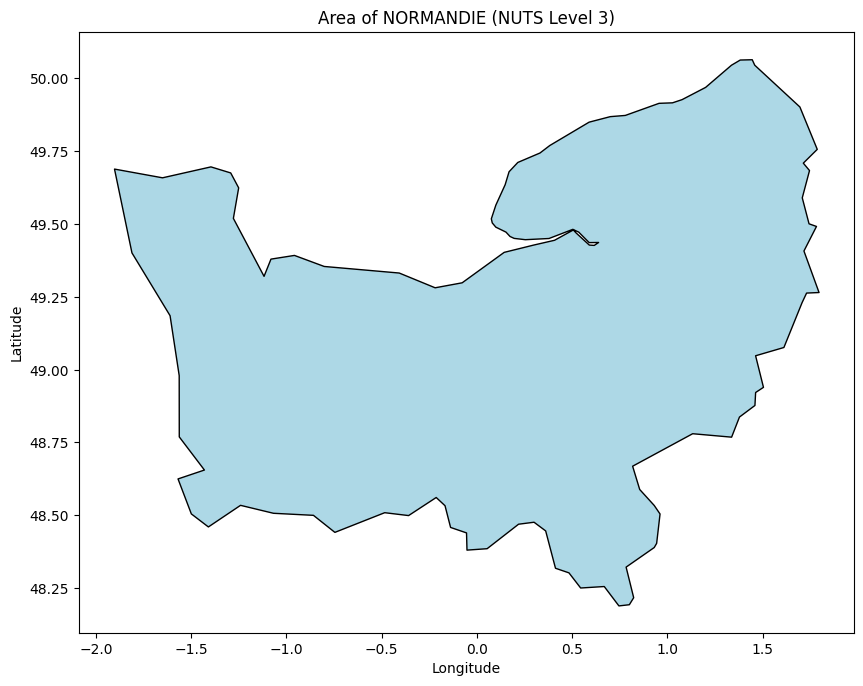

In [ ]:
if country_nuts_gdf_list:
    # Get the name of the first region
    first_region_name = country_nuts_gdf_list[1]
    # Filter the GeoDataFrame to get the geometry for the first region
    first_region_gdf = country_nuts_gdf[country_nuts_gdf['NUTS_NAME'] == first_region_name]
    # Check if the region was found
    if not first_region_gdf.empty:
        # Create a plot
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        # Plot the geometry of the first region
        first_region_gdf.plot(ax=ax, edgecolor='black', facecolor='lightblue')
        # Set title
        ax.set_title(f'Area of {first_region_name} (NUTS Level 3)')
        # Optional: Add axis labels (depending on the CRS, these might be lat/lon or projected coordinates)
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        plt.show()
    else:
        print(f"Region '{first_region_name}' not found in the GeoDataFrame.")
else:
    print("The list of France NUTS Level 3 regions is empty.")

Regions listed and polygons specified
Layers found in the 2016 GeoPackage:
NUTS_RG_10M_2016_4326.gpkg

Successfully loaded layer 'NUTS_RG_10M_2016_4326.gpkg' from the 2016 GeoPackage.
Original GeoDataFrame shape: (16, 9)
Filtered GeoDataFrame shape (Region BADEN-WÜRTTEMBERG): (1, 9)
Filtered data points for region: BADEN-WÜRTTEMBERG
Number of data points for region after dropping NaNs: 13831
Data range for 'demand_biomass_wood': min=0.581253410735659, max=0.921577025577388
Successfully created and positioned manual colorbar closer to the map.


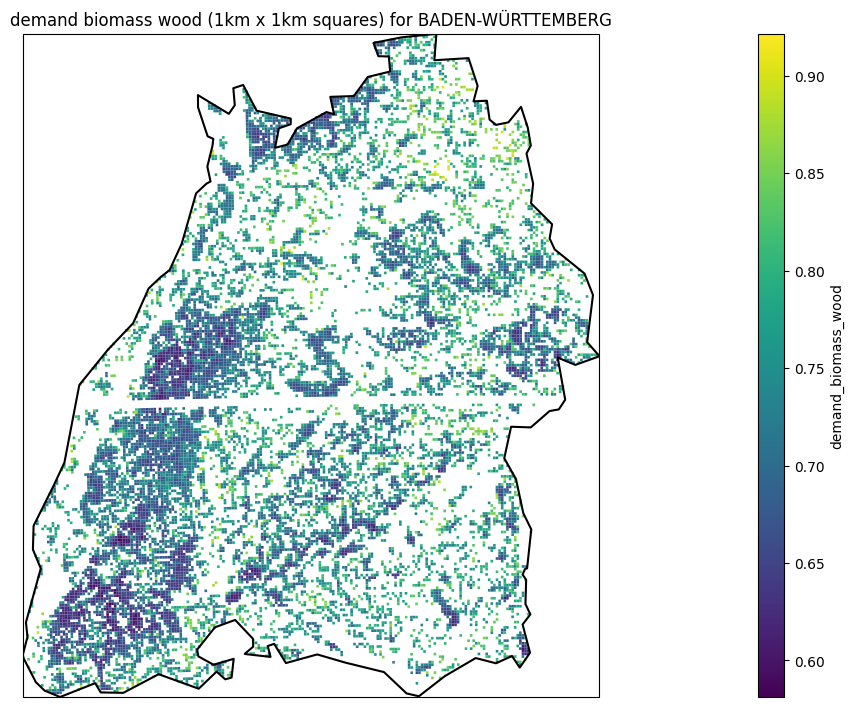

In [ ]:
# Plotting a variable within a specified  NUTS region.
# Here it's not pixels; its' polygons of 1 x 1 km2


gpkg_path_2016 = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/NUTS_RG_10M_2016_4326.gpkg'

CNTR_CODE = 'DE'
LEVEL_CODE = 1

nuts_specific_gdf_list, nuts_specific_gdf = get_regional_map_info(gpkg_path, LEVEL_CODE, CNTR_CODE )

region_name = nuts_specific_gdf_list[2] # Before calling this, you'd have to print the list to see which region you want to plot

lon = data['lon_WGS84'] # check that coordinates are in WGS84 / EPSG:4326
lat = data['lat_WGS84']
column = 'demand_biomass_wood' # CHANGE COLUMN HERE
column_clean = column.replace("_", " ")
color_map = 'viridis' # https://matplotlib.org/stable/users/explain/colors/colormaps.html # Greens
title = f'{column_clean} (1km x 1km squares) for {region_name}' # Update title to reflect the region and polygon representation


# Call the new function to plot only the single region with square polygons
plot_single_region_map(gpkg_path_2016, LEVEL_CODE, data, lon, lat, column, color_map, title, region_name, nuts_gdf=nuts_specific_gdf)

# calculate Moran's I for each FES supply and demand for each country separately


In [ ]:
interval_clustering_variables_list = supply_columns + demand_columns

In [ ]:
# Create the data_squares_gdf GeoDataFrame using LAEA coordinates
# Call this for every NUTS level when you get Moran's I

if 'data' in locals() and not data.empty and 'lon' in data.columns and 'lat' in data.columns:
    try:
        data_points_gdf = gpd.GeoDataFrame(
            data.copy(), geometry=gpd.points_from_xy(data['lon'], data['lat']), crs="EPSG:3035"
        )
        side_length_meters = 1000 # 1 km
        half_side = side_length_meters / 2.0

        from shapely.geometry import Polygon

        # Create a list of square polygons
        squares = []
        for idx, row in data_points_gdf.iterrows():
            center_x, center_y = row.geometry.x, row.geometry.y
            square_coords = [
                (center_x - half_side, center_y - half_side),
                (center_x + half_side, center_y - half_side),
                (center_x + half_side, center_y + half_side),
                (center_x - half_side, center_y + half_side),
                (center_x - half_side, center_y - half_side) # Close the polygon
            ]
            squares.append(Polygon(square_coords))

        data_squares_gdf = gpd.GeoDataFrame(data_points_gdf.drop(columns=['geometry']), geometry=squares, crs='EPSG:3035')

        print("Successfully created data_squares_gdf with 1km x 1km square geometries in EPSG:3035 using LAEA coordinates.")
        print("Shape of data_squares_gdf:", data_squares_gdf.shape)
        display(data_squares_gdf.head())

    except Exception as e:
        print(f"An error occurred while creating data_squares_gdf: {e}")
        data_squares_gdf = gpd.GeoDataFrame() # Initialize empty on error
else:
    print("Error: 'data' DataFrame not found, is empty, or missing 'lon'/'lat' columns. Cannot create data_squares_gdf using LAEA coordinates.")
    data_squares_gdf = gpd.GeoDataFrame() # Initialize empty if data is not available

Successfully created data_squares_gdf with 1km x 1km square geometries in EPSG:3035 using LAEA coordinates.
Shape of data_squares_gdf: (1485032, 83)


lon           lat  abelow_biom  abelow_carbon  above_biomass  \
0 5009031.00000 5376235.00000   5061.00000     2457.00000     4282.00000   
1 5009031.00000 5375235.00000   4152.00000     2016.00000     3513.00000   
2 5011031.00000 5375235.00000   4672.00000     2268.00000     3952.00000   
3 5012031.00000 5375235.00000   2855.00000     1386.00000     2415.00000   
4 5060031.00000 5373235.00000   3532.00000     1697.00000     2989.00000   

   above_carbon  accessibility  density        et       gsv  ...  \
0    2076.00000      814.00000  0.00000 440.00000   1.00000  ...   
1    1703.00000      814.00000  0.00000 448.00000  51.00000  ...   
2    1916.00000      870.00000  0.00000 410.00000 125.00000  ...   
3    1171.00000      888.00000  0.00000 428.00000  20.00000  ...   
4    1422.00000      764.00000  0.00000 451.00000   0.00000  ...   

   demand_hunting_game  demand_NWFP  demand_erosion_control  \
0              0.76337      0.59068                 0.58209   
1              0.75473      0.59213                 0.57755   
2              0.77368      0.57069                 0.54372   
3              0.77896      0.57869                 0.56372   
4              0.79446      0.54868                 0.54365   

   demand_air_quality_regulation  demand_CC_mitigation  \
0                        0.54271               0.51894   
1                        0.53668               0.51199   
2                        0.51455               0.49463   
3                        0.52936               0.51252   
4                        0.50877               0.50606   

   demand_habitat_provision  demand_cultural_emotional_spiritual_values  \
0                   0.38948                                     0.33371   
1                   0.38797                                     0.32285   
2                   0.36958                                     0.31855   
3                   0.39378                                     0.33298   
4                   0.41733                                     0.32603   

   demand_nature_based_education  demand_nature_based_tourism  \
0                        0.16546                      0.21239   
1                        0.16409                      0.21620   
2                        0.16197                      0.23575   
3                        0.16820                      0.21570   
4                        0.18442                      0.22818   

                                            geometry  
0  POLYGON ((5008531 5375735, 5009531 5375735, 50...  
1  POLYGON ((5008531 5374735, 5009531 5374735, 50...  
2  POLYGON ((5010531 5374735, 5011531 5374735, 50...  
3  POLYGON ((5011531 5374735, 5012531 5374735, 50...  
4  POLYGON ((5059531 5372735, 5060531 5372735, 50...  

[5 rows x 83 columns]

In [ ]:
data_squares_gdf

In [ ]:
# Define the path to save the GeoPackage file
output_gpkg_path = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Data/data_squares.gpkg'

# Check if the GeoDataFrame exists and is not empty
if 'data_squares_gdf' in locals() and not data_squares_gdf.empty:
    try:
        # Save the GeoDataFrame to a GeoPackage file
        # Use the 'to_file' method of GeoDataFrame
        # The driver='GPKG' specifies the GeoPackage format
        data_squares_gdf.to_file(output_gpkg_path, driver='GPKG')
        print(f"Successfully saved data_squares_gdf to '{output_gpkg_path}'")
    except Exception as e:
        print(f"An error occurred while saving data_squares_gdf to GeoPackage: {e}")
else:
    print("Error: data_squares_gdf not found or is empty. Cannot save to file.")

Successfully saved data_squares_gdf to '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Data/data_squares.gpkg'


In [ ]:
# LOAD FROM FILE# Define the path to the GeoPackage file
input_gpkg_path = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Data/data_squares.gpkg'

# Check if the file exists
if os.path.exists(input_gpkg_path):
    try:
        # Load the GeoDataFrame from the GeoPackage file
        data_squares_gdf = gpd.read_file(input_gpkg_path)
        print(f"Successfully loaded data_squares_gdf from '{input_gpkg_path}'")
        print("Shape of loaded GeoDataFrame:", data_squares_gdf.shape)
        display(data_squares_gdf.head())
    except Exception as e:
        print(f"An error occurred while loading data_squares_gdf from GeoPackage: {e}")
        data_squares_gdf = gpd.GeoDataFrame() # Initialize empty on error
else:
    print(f"Error: GeoPackage file not found at '{input_gpkg_path}'.")
    data_squares_gdf = gpd.GeoDataFrame() # Initialize empty if file not found

In [ ]:
# Step 1: Load NUTS boundaries (Level 0 - countries)

# Define the path to the GeoPackage file
gpkg_path_2016 = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/NUTS_RG_10M_2016_4326.gpkg'

try:
    # Check if the file exists
    if not os.path.exists(gpkg_path_2016):
        raise FileNotFoundError(f"GeoPackage file not found at: {gpkg_path_2016}")

    # Load the primary layer from the GeoPackage file
    # Assuming the primary layer contains all NUTS levels
    layers_2016 = fiona.listlayers(gpkg_path_2016)
    if layers_2016:
        primary_layer_2016 = layers_2016[0]
        nuts_gdf_2016 = gpd.read_file(gpkg_path_2016, layer=primary_layer_2016)

        print(f"Successfully loaded layer '{primary_layer_2016}' from the GeoPackage.")
        print("Original NUTS GeoDataFrame shape:", nuts_gdf_2016.shape)

        # Filter for NUTS level 0 (LEVL_CODE == 0), which corresponds to countries
        countries_gdf = nuts_gdf_2016[nuts_gdf_2016['LEVL_CODE'] == 0].copy()

        print("Filtered GeoDataFrame shape (NUTS0/Countries):", countries_gdf.shape)
        print("NUTS Level 0 (Country) Codes and Names:")
        display(countries_gdf[['CNTR_CODE', 'NUTS_NAME']])

    else:
        print("No layers found in the GeoPackage.")
        countries_gdf = gpd.GeoDataFrame() # Initialize empty if no layers found

except FileNotFoundError as e:
    print(e)
    print("Please ensure the 2016 GeoPackage file is in the specified Google Drive folder.")
    countries_gdf = gpd.GeoDataFrame() # Initialize empty on error
except Exception as e:
    print(f"An error occurred while loading or filtering the GeoPackage: {e}")
    countries_gdf = gpd.GeoDataFrame() # Initialize empty on error

In [ ]:
# Steps 2-6: Iterate through countries, filter data, create weights, calculate Moran's I, and store results

# Ensure data_squares_gdf is available and contains the variables
if 'data_squares_gdf' not in locals() or data_squares_gdf.empty:
    print("Error: data_squares_gdf is not available or is empty. Cannot calculate Moran's I by country.")
elif 'countries_gdf' not in locals() or countries_gdf.empty:
     print("Error: Country boundaries (countries_gdf) are not available or are empty. Cannot calculate Moran's I by country.")
else:
    # Select the variables for clustering and ensure they are in data_squares_gdf
    # Use the updated list of variables
    moran_variables = interval_clustering_variables_list # This list was defined in a previous cell

    # Initialize a dictionary to store Moran's I results by country and variable
    moran_results_by_country = {}

    # Project the countries_gdf to EPSG:3035 before the loop
    # This is needed for accurate spatial filtering with data_squares_gdf which is in EPSG:3035
    try:
        countries_gdf_projected = countries_gdf.to_crs(epsg=3035)
        print("\nSuccessfully projected country boundaries to EPSG:3035.")
    except Exception as e:
        print(f"Error projecting country boundaries: {e}")
        countries_gdf_projected = gpd.GeoDataFrame() # Initialize empty on error if projection fails


    # Iterate through each country in the projected GeoDataFrame
    if not countries_gdf_projected.empty:
        for index, country in countries_gdf_projected.iterrows():
            country_code = country['CNTR_CODE']
            country_name = country['NUTS_NAME']
            country_geometry_projected = country.geometry # Use the already projected geometry

            print(f"\n--- Processing Country: {country_name} ({country_code}) ---")

            # Step 3: Filter data by country
            try:
                # Use spatial index for efficient filtering
                # data_squares_gdf and country_geometry_projected are now both in EPSG:3035
                country_data_gdf = data_squares_gdf[data_squares_gdf.geometry.within(country_geometry_projected)].copy()

                print(f"Number of data points within {country_name}: {len(country_data_gdf)}")

                # Check if there is enough data for this country
                if len(country_data_gdf) < 2:
                    print(f"Not enough data points (less than 2) in {country_name} to calculate spatial weights and Moran's I. Skipping this country.")
                    continue # Move to the next country

                # Filter for relevant variables and drop rows with NaNs for this country
                moran_data_country = country_data_gdf[moran_variables + ['geometry']].dropna(subset=moran_variables).copy()

                # Check if there is enough data after handling missing values for this country
                if moran_data_country.shape[0] < 2:
                     print(f"Not enough data points (less than 2) in {country_name} after handling missing values for the selected variables. Skipping this country.")
                     continue # Move to the next country


                # Step 4: Create country-specific weights
                try:
                    # Use Queen contiguity for polygons
                    w_country = Queen.from_dataframe(moran_data_country, use_index=False)

                    # Check if the weights matrix is connected and report islands for this country
                    if len(w_country.islands) > 0:
                        print(f"Warning: The spatial weights matrix for {country_name} has {len(w_country.islands)} islands (geometries with no neighbors) out of {len(moran_data_country)} total geometries.")
                        # Note: Proceeding with calculation including islands.

                    # Set seed for reproducibility for simulation
                    numpy.random.seed(123456)

                    # Step 5: Calculate Moran's I for each variable in country
                    country_results = {}
                    for variable in moran_variables:
                        # Ensure the variable column exists in the filtered GeoDataFrame for this country
                        if variable in moran_data_country.columns:
                            try:
                                # Calculate Moran's I using the country-specific data and weights
                                # The variable data needs to be a Series
                                # Removed the 'seed' argument from the Moran constructor
                                moran = Moran(moran_data_country[variable], w_country)
                                country_results[variable] = {'Moran\'s I': moran.I, 'P-value': moran.p_sim}
                            except Exception as e:
                                print(f"Error calculating Moran's I for variable '{variable}' in {country_name}: {e}")
                                country_results[variable] = {'Moran\'s I': None, 'P-value': None} # Store None on error
                        else:
                             print(f"Warning: Variable '{variable}' not found in the filtered GeoDataFrame for {country_name}.")
                             country_results[variable] = {'Moran\'s I': None, 'P-value': None} # Store None if variable missing


                    # Step 6: Store results
                    moran_results_by_country[country_code] = country_results

                except Exception as e:
                     print(f"Error creating spatial weights for {country_name}: {e}")
                     moran_results_by_country[country_code] = {variable: {'Moran\'s I': None, 'P-value': None} for variable in moran_variables} # Store None for all variables on error


            except Exception as e:
                print(f"Error filtering data for {country_name}: {e}")
                moran_results_by_country[country_code] = {variable: {'Moran\'s I': None, 'P-value': None} for variable in moran_variables} # Store None for all variables on error


    else:
        print("Country boundaries (countries_gdf_projected) are empty after projection. Cannot calculate Moran's I by country.")


    # Step 7: Present results (as a pandas DataFrame)
    if moran_results_by_country:
        # Convert the nested dictionary to a pandas DataFrame
        # Transpose the DataFrame to have countries as rows and variables as columns (with I and P-value)
        # Create a MultiIndex for columns (Variable, Statistic)
        # Flatten the nested dictionary structure for DataFrame creation
        flattened_results = {}
        for country_code, var_results in moran_results_by_country.items():
            for variable, stats in var_results.items():
                flattened_results[(country_code, variable, 'Moran\'s I')] = stats['Moran\'s I']
                flattened_results[(country_code, variable, 'P-value')] = stats['P-value']

        # Create a Series from the flattened dictionary
        results_series = pd.Series(flattened_results)

        # Create a MultiIndex from the keys
        multi_index = pd.MultiIndex.from_tuples(results_series.index, names=['Country', 'Variable', 'Statistic'])

        # Reshape the Series into a DataFrame with MultiIndex columns
        moran_results_df = results_series.unstack(level=[1, 2])

        # Optional: Rearrange columns to have Moran's I and P-value together for each variable
        # Get the list of variables
        variables_sorted = sorted(moran_variables)
        # Create a new list of column tuples in the desired order
        ordered_columns = []
        for var in variables_sorted:
            ordered_columns.append((var, 'Moran\'s I'))
            ordered_columns.append((var, 'P-value'))

        # Reindex the DataFrame with the ordered columns
        moran_results_df = moran_results_df[ordered_columns]


        print("\nSummary of Moran's I Results by Country and Variable:")
        display(moran_results_df)

        # Step 8: Finish task
        print("\nMoran's I calculation by country is complete.")

    else:
        print("\nNo Moran's I results were generated for any country.")

In [ ]:
moran_results_df.to_csv('moran_results_by_country.csv')

In [ ]:
# Select columns with 'Moran\'s I' from the MultiIndex DataFrame
try:
    moran_i_columns = moran_results_df.xs('Moran\'s I', level=1, axis=1)

    # Calculate the mean for each variable across all countries
    mean_moran_i_per_variable = moran_i_columns.mean()

    # Display the mean Moran's I values
    print("Mean Moran's I value for each variable (averaged across countries):")
    display(mean_moran_i_per_variable)

except KeyError as e:
    print(f"Error: {e}. Could not access the level for 'Moran\'s I'.")
    print("Please check the structure of the moran_results_df columns.")


In [ ]:
mean_moran_i_per_variable[0].mean()

/tmp/ipython-input-14766764.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_moran_i_per_variable[0].mean()


np.float64(0.6965040052243194)

# calculate Moran's I for each FES supply and demand for each NUTS 1 region in each country


In [ ]:
# Step 1: Load NUTS Level 1 boundaries

# Define the path to the GeoPackage file
gpkg_path_2016 = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/NUTS_RG_10M_2016_4326.gpkg'

try:
    # Check if the file exists
    if not os.path.exists(gpkg_path_2016):
        raise FileNotFoundError(f"GeoPackage file not found at: {gpkg_path_2016}")

    # Load the primary layer from the GeoPackage file
    layers_2016 = fiona.listlayers(gpkg_path_2016)
    if layers_2016:
        primary_layer_2016 = layers_2016[0]
        nuts_gdf_2016 = gpd.read_file(gpkg_path_2016, layer=primary_layer_2016)

        print(f"Successfully loaded layer '{primary_layer_2016}' from the GeoPackage.")
        print("Original NUTS GeoDataFrame shape:", nuts_gdf_2016.shape)

        # Filter for NUTS level 1 (LEVL_CODE == 1)
        nuts1_gdf = nuts_gdf_2016[nuts_gdf_2016['LEVL_CODE'] == 1].copy()

        print("Filtered GeoDataFrame shape (NUTS1 Regions):", nuts1_gdf.shape)
        print("NUTS Level 1 (Region) Codes and Names:")
        display(nuts1_gdf[['NUTS_ID', 'NUTS_NAME', 'CNTR_CODE']])

    else:
        print("No layers found in the GeoPackage.")
        nuts1_gdf = gpd.GeoDataFrame() # Initialize empty if no layers found

except FileNotFoundError as e:
    print(e)
    print("Please ensure the 2016 GeoPackage file is in the specified Google Drive folder.")
    nuts1_gdf = gpd.GeoDataFrame() # Initialize empty on error
except Exception as e:
    print(f"An error occurred while loading or filtering the GeoPackage: {e}")
    nuts1_gdf = gpd.GeoDataFrame() # Initialize empty on error

In [ ]:
# Steps 2-7: Iterate through NUTS1 regions, filter data, create weights, calculate Moran's I, store and present results

# Ensure data_squares_gdf is available and contains the variables
if 'data_squares_gdf' not in locals() or data_squares_gdf.empty:
    print("Error: data_squares_gdf is not available or is empty. Cannot calculate Moran's I by NUTS1 region.")
elif 'nuts1_gdf' not in locals() or nuts1_gdf.empty:
     print("Error: NUTS Level 1 boundaries (nuts1_gdf) are not available or are empty. Cannot calculate Moran's I by NUTS1 region.")
else:
    # Select the variables for clustering and ensure they are in data_squares_gdf
    moran_variables = interval_clustering_variables_list # This list was defined previously

    # Initialize a dictionary to store Moran's I results by NUTS1 region and variable
    moran_results_by_nuts1 = {}

    # Project the nuts1_gdf to EPSG:3035 before the loop for spatial filtering
    try:
        nuts1_gdf_projected = nuts1_gdf.to_crs(epsg=3035)
        print("\nSuccessfully projected NUTS1 boundaries to EPSG:3035.")
    except Exception as e:
        print(f"Error projecting NUTS1 boundaries: {e}")
        nuts1_gdf_projected = gpd.GeoDataFrame() # Initialize empty on error if projection fails


    # Iterate through each NUTS Level 1 region in the projected GeoDataFrame
    if not nuts1_gdf_projected.empty:
        for index, region in nuts1_gdf_projected.iterrows():
            region_nuts_id = region['NUTS_ID']
            region_name = region['NUTS_NAME']
            country_code = region['CNTR_CODE'] # Get the country code for context
            region_geometry_projected = region.geometry # Use the projected geometry

            print(f"\n--- Processing Region: {region_name} ({region_nuts_id}, Country: {country_code}) ---")

            # Step 3: Filter data by region
            try:
                # Use spatial index for efficient filtering
                # data_squares_gdf and region_geometry_projected are both in EPSG:3035
                region_data_gdf = data_squares_gdf[data_squares_gdf.geometry.within(region_geometry_projected)].copy()

                print(f"Number of data points within {region_name}: {len(region_data_gdf)}")

                # Check if there is enough data for this region
                if len(region_data_gdf) < 2:
                    print(f"Not enough data points (less than 2) in {region_name} to calculate spatial weights and Moran's I. Skipping this region.")
                    moran_results_by_nuts1[region_nuts_id] = {variable: {'Moran\'s I': None, 'P-value': None} for variable in moran_variables} # Store None for all variables
                    continue # Move to the next region


                # Filter for relevant variables and drop rows with NaNs for this region
                moran_data_region = region_data_gdf[moran_variables + ['geometry']].dropna(subset=moran_variables).copy()

                # Check if there is enough data after handling missing values for this region
                if moran_data_region.shape[0] < 2:
                     print(f"Not enough data points (less than 2) in {region_name} after handling missing values for the selected variables. Skipping this region.")
                     moran_results_by_nuts1[region_nuts_id] = {variable: {'Moran\'s I': None, 'P-value': None} for variable in moran_variables} # Store None for all variables
                     continue # Move to the next region


                # Step 4: Create region-specific weights
                try:
                    # Use Queen contiguity for polygons
                    w_region = Queen.from_dataframe(moran_data_region, use_index=False)

                    # Check if the weights matrix is connected and report islands for this region
                    if len(w_region.islands) > 0:
                        print(f"Warning: The spatial weights matrix for {region_name} has {len(w_region.islands)} islands (geometries with no neighbors) out of {len(moran_data_region)} total geometries.")
                        # Note: Proceeding with calculation including islands.

                    # Set seed for reproducibility for simulation
                    numpy.random.seed(123456)

                    # Step 5: Calculate Moran's I for each variable in region
                    region_results = {}
                    for variable in moran_variables:
                        # Ensure the variable column exists in the filtered GeoDataFrame for this region
                        if variable in moran_data_region.columns:
                            try:
                                # Calculate Moran's I using the region-specific data and weights
                                # The variable data needs to be a Series
                                moran = Moran(moran_data_region[variable], w_region)
                                region_results[variable] = {'Moran\'s I': moran.I, 'P-value': moran.p_sim}
                            except Exception as e:
                                print(f"Error calculating Moran's I for variable '{variable}' in {region_name}: {e}")
                                region_results[variable] = {'Moran\'s I': None, 'P-value': None} # Store None on error
                        else:
                             print(f"Warning: Variable '{variable}' not found in the filtered GeoDataFrame for {region_name}.")
                             region_results[variable] = {'Moran\'s I': None, 'P-value': None} # Store None if variable missing


                    # Step 6: Store results
                    moran_results_by_nuts1[region_nuts_id] = region_results

                except Exception as e:
                     print(f"Error creating spatial weights for {region_name}: {e}")
                     moran_results_by_nuts1[region_nuts_id] = {variable: {'Moran\'s I': None, 'P-value': None} for variable in moran_variables} # Store None for all variables on error


            except Exception as e:
                print(f"Error filtering data for {region_name}: {e}")
                moran_results_by_nuts1[region_nuts_id] = {variable: {'Moran\'s I': None, 'P-value': None} for variable in moran_variables} # Store None for all variables on error


    else:
        print("NUTS1 boundaries (nuts1_gdf_projected) are empty after projection. Cannot calculate Moran's I by NUTS1 region.")


    # Step 7: Present results (as a pandas DataFrame)
    if moran_results_by_nuts1:
        # Convert the nested dictionary to a pandas DataFrame
        # Transpose the DataFrame to have regions as rows and variables as columns (with I and P-value)
        # Create a MultiIndex for columns (Variable, Statistic)
        # Flatten the nested dictionary structure for DataFrame creation
        flattened_results = {}
        for region_nuts_id, var_results in moran_results_by_nuts1.items():
            for variable, stats in var_results.items():
                flattened_results[(region_nuts_id, variable, 'Moran\'s I')] = stats['Moran\'s I']
                flattened_results[(region_nuts_id, variable, 'P-value')] = stats['P-value']

        # Create a Series from the flattened dictionary
        results_series = pd.Series(flattened_results)

        # Create a MultiIndex from the keys
        # Include 'NUTS1_ID' and 'Variable' as level names for clarity
        multi_index = pd.MultiIndex.from_tuples(results_series.index, names=['NUTS1_ID', 'Variable', 'Statistic'])

        # Reshape the Series into a DataFrame with MultiIndex columns
        moran_results_nuts1_df = results_series.unstack(level=[1, 2])

        # Optional: Rearrange columns to have Moran's I and P-value together for each variable
        # Get the list of variables
        variables_sorted = sorted(moran_variables)
        # Create a new list of column tuples in the desired order
        ordered_columns = []
        for var in variables_sorted:
            ordered_columns.append((var, 'Moran\'s I'))
            ordered_columns.append((var, 'P-value'))

        # Reindex the DataFrame with the ordered columns
        moran_results_nuts1_df = moran_results_nuts1_df[ordered_columns]


        print("\nSummary of Moran's I Results by NUTS1 Region and Variable:")
        display(moran_results_nuts1_df)

        # Step 8: Finish task
        print("\nMoran's I calculation by NUTS1 region is complete.")

    else:
        print("\nNo Moran's I results were generated for any NUTS1 region.")

In [ ]:
moran_results_nuts1_df.to_csv('moran_I_nuts1.csv')

In [ ]:
# Select columns with 'Moran\'s I' from the MultiIndex DataFrame
try:
    moran_i_columns = moran_results_nuts1_df.xs('Moran\'s I', level=1, axis=1)

    # Calculate the mean for each variable across all countries
    mean_moran_i_per_variable = moran_i_columns.mean()

    # Display the mean Moran's I values
    print("Mean Moran's I value for each variable (averaged across countries):")
    display(mean_moran_i_per_variable)

except KeyError as e:
    print(f"Error: {e}. Could not access the level for 'Moran\'s I'.")
    print("Please check the structure of the moran_results_nuts1_df columns.")


# calculate Moran's I for each FES supply and demand for each NUTS 2 region in each country


In [ ]:
# Step 1: Load NUTS Level 2 boundaries

# Define the path to the GeoPackage file
gpkg_path_2016 = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/NUTS_RG_10M_2016_4326.gpkg'

try:
    # Check if the file exists
    if not os.path.exists(gpkg_path_2016):
        raise FileNotFoundError(f"GeoPackage file not found at: {gpkg_path_2016}")

    # Load the primary layer from the GeoPackage file
    layers_2016 = fiona.listlayers(gpkg_path_2016)
    if layers_2016:
        primary_layer_2016 = layers_2016[0]
        nuts_gdf_2016 = gpd.read_file(gpkg_path_2016, layer=primary_layer_2016)

        print(f"Successfully loaded layer '{primary_layer_2016}' from the GeoPackage.")
        print("Original NUTS GeoDataFrame shape:", nuts_gdf_2016.shape)

        # Filter for NUTS level 2 (LEVL_CODE == 2)
        nuts2_gdf = nuts_gdf_2016[nuts_gdf_2016['LEVL_CODE'] == 2].copy()

        print("Filtered GeoDataFrame shape (NUTS2 Regions):", nuts2_gdf.shape)
        print("NUTS Level 2 (Region) Codes and Names:")
        display(nuts2_gdf[['NUTS_ID', 'NUTS_NAME', 'CNTR_CODE']])

    else:
        print("No layers found in the GeoPackage.")
        nuts2_gdf = gpd.GeoDataFrame() # Initialize empty if no layers found

except FileNotFoundError as e:
    print(e)
    print("Please ensure the 2016 GeoPackage file is in the specified Google Drive folder.")
    nuts2_gdf = gpd.GeoDataFrame() # Initialize empty on error
except Exception as e:
    print(f"An error occurred while loading or filtering the GeoPackage: {e}")
    nuts2_gdf = gpd.GeoDataFrame() # Initialize empty on error

Successfully loaded layer 'NUTS_RG_10M_2016_4326.gpkg' from the GeoPackage.
Original NUTS GeoDataFrame shape: (2016, 9)
Filtered GeoDataFrame shape (NUTS2 Regions): (332, 9)
NUTS Level 2 (Region) Codes and Names:


NUTS_ID                                   NUTS_NAME CNTR_CODE
1355    BE23                       Prov. Oost-Vlaanderen        BE
1356    BE24                        Prov. Vlaams-Brabant        BE
1357    BE25                       Prov. West-Vlaanderen        BE
1358    BE31                        Prov. Brabant Wallon        BE
1359    BE32                               Prov. Hainaut        BE
...      ...                                         ...       ...
1853    UKI7          Outer London - West and North West        UK
1854    UKJ1  Berkshire, Buckinghamshire and Oxfordshire        UK
1855    UKJ2                Surrey, East and West Sussex        UK
1856    UKJ3                 Hampshire and Isle of Wight        UK
1857    UKJ4                                        Kent        UK

[332 rows x 3 columns]

In [ ]:
# Steps 2-7: Iterate through NUTS2 regions, filter data, create weights, calculate Moran's I, store and present results

# Ensure data_squares_gdf is available and contains the variables
if 'data_squares_gdf' not in locals() or data_squares_gdf.empty:
    print("Error: data_squares_gdf is not available or is empty. Cannot calculate Moran's I by NUTS2 region.")
elif 'nuts2_gdf' not in locals() or nuts2_gdf.empty:
     print("Error: NUTS Level 2 boundaries (nuts2_gdf) are not available or are empty. Cannot calculate Moran's I by NUTS2 region.")
else:
    # Select the variables for clustering and ensure they are in data_squares_gdf
    moran_variables = interval_clustering_variables_list # This list was defined previously

    # Initialize a dictionary to store Moran's I results by NUTS2 region and variable
    moran_results_by_nuts2 = {}

    # Project the nuts2_gdf to EPSG:3035 before the loop for spatial filtering
    try:
        nuts2_gdf_projected = nuts2_gdf.to_crs(epsg=3035)
        print("\nSuccessfully projected NUTS2 boundaries to EPSG:3035.")
    except Exception as e:
        print(f"Error projecting NUTS2 boundaries: {e}")
        nuts2_gdf_projected = gpd.GeoDataFrame() # Initialize empty on error if projection fails


    # Iterate through each NUTS Level 2 region in the projected GeoDataFrame
    if not nuts2_gdf_projected.empty:
        for index, region in nuts2_gdf_projected.iterrows():
            region_nuts_id = region['NUTS_ID']
            region_name = region['NUTS_NAME']
            country_code = region['CNTR_CODE'] # Get the country code for context
            region_geometry_projected = region.geometry # Use the projected geometry

            print(f"\n--- Processing Region: {region_name} ({region_nuts_id}, Country: {country_code}) ---")

            # Step 3: Filter data by region
            try:
                # Use spatial index for efficient filtering
                # data_squares_gdf and region_geometry_projected are both in EPSG:3035
                region_data_gdf = data_squares_gdf[data_squares_gdf.geometry.within(region_geometry_projected)].copy()

                print(f"Number of data points within {region_name}: {len(region_data_gdf)}")

                # Check if there is enough data for this region
                if len(region_data_gdf) < 2:
                    print(f"Not enough data points (less than 2) in {region_name} to calculate spatial weights and Moran's I. Skipping this region.")
                    moran_results_by_nuts2[region_nuts_id] = {variable: {'Moran\'s I': None, 'P-value': None} for variable in moran_variables} # Store None for all variables
                    continue # Move to the next region


                # Filter for relevant variables and drop rows with NaNs for this region
                moran_data_region = region_data_gdf[moran_variables + ['geometry']].dropna(subset=moran_variables).copy()

                # Check if there is enough data after handling missing values for this region
                if moran_data_region.shape[0] < 2:
                     print(f"Not enough data points (less than 2) in {region_name} after handling missing values for the selected variables. Skipping this region.")
                     moran_results_by_nuts2[region_nuts_id] = {variable: {'Moran\'s I': None, 'P-value': None} for variable in moran_variables} # Store None for all variables
                     continue # Move to the next region


                # Step 4: Create region-specific weights
                try:
                    # Use Queen contiguity for polygons
                    w_region = Queen.from_dataframe(moran_data_region, use_index=False)

                    # Check if the weights matrix is connected and report islands for this region
                    if len(w_region.islands) > 0:
                        print(f"Warning: The spatial weights matrix for {region_name} has {len(w_region.islands)} islands (geometries with no neighbors) out of {len(moran_data_region)} total geometries.")
                        # Note: Proceeding with calculation including islands.

                    # Set seed for reproducibility for simulation
                    numpy.random.seed(123456)

                    # Step 5: Calculate Moran's I for each variable in region
                    region_results = {}
                    for variable in moran_variables:
                        # Ensure the variable column exists in the filtered GeoDataFrame for this region
                        if variable in moran_data_region.columns:
                            try:
                                # Calculate Moran's I using the region-specific data and weights
                                # The variable data needs to be a Series
                                moran = Moran(moran_data_region[variable], w_region)
                                region_results[variable] = {'Moran\'s I': moran.I, 'P-value': moran.p_sim}
                            except Exception as e:
                                print(f"Error calculating Moran's I for variable '{variable}' in {region_name}: {e}")
                                region_results[variable] = {'Moran\'s I': None, 'P-value': None} # Store None on error
                        else:
                             print(f"Warning: Variable '{variable}' not found in the filtered GeoDataFrame for {region_name}.")
                             region_results[variable] = {'Moran\'s I': None, 'P-value': None} # Store None if variable missing


                    # Step 6: Store results
                    moran_results_by_nuts2[region_nuts_id] = region_results

                except Exception as e:
                     print(f"Error creating spatial weights for {region_name}: {e}")
                     moran_results_by_nuts2[region_nuts_id] = {variable: {'Moran\'s I': None, 'P-value': None} for variable in moran_variables} # Store None for all variables on error


            except Exception as e:
                print(f"Error filtering data for {region_name}: {e}")
                moran_results_by_nuts2[region_nuts_id] = {variable: {'Moran\'s I': None, 'P-value': None} for variable in moran_variables} # Store None for all variables on error


    else:
        print("NUTS2 boundaries (nuts2_gdf_projected) are empty after projection. Cannot calculate Moran's I by NUTS2 region.")


    # Step 7: Present results (as a pandas DataFrame)
    if moran_results_by_nuts2:
        # Convert the nested dictionary to a pandas DataFrame
        # Transpose the DataFrame to have regions as rows and variables as columns (with I and P-value)
        # Create a MultiIndex for columns (Variable, Statistic)
        # Flatten the nested dictionary structure for DataFrame creation
        flattened_results = {}
        for region_nuts_id, var_results in moran_results_by_nuts2.items():
            for variable, stats in var_results.items():
                flattened_results[(region_nuts_id, variable, 'Moran\'s I')] = stats['Moran\'s I']
                flattened_results[(region_nuts_id, variable, 'P-value')] = stats['P-value']

        # Create a Series from the flattened dictionary
        results_series = pd.Series(flattened_results)

        # Create a MultiIndex from the keys
        # Include 'NUTS2_ID' and 'Variable' as level names for clarity
        multi_index = pd.MultiIndex.from_tuples(results_series.index, names=['NUTS2_ID', 'Variable', 'Statistic'])

        # Reshape the Series into a DataFrame with MultiIndex columns
        moran_results_nuts2_df = results_series.unstack(level=[1, 2])

        # Optional: Rearrange columns to have Moran's I and P-value together for each variable
        # Get the list of variables
        variables_sorted = sorted(moran_variables)
        # Create a new list of column tuples in the desired order
        ordered_columns = []
        for var in variables_sorted:
            ordered_columns.append((var, 'Moran\'s I'))
            ordered_columns.append((var, 'P-value'))

        # Reindex the DataFrame with the ordered columns
        moran_results_nuts2_df = moran_results_nuts2_df[ordered_columns]


        print("\nSummary of Moran's I Results by NUTS2 Region and Variable:")
        display(moran_results_nuts2_df)

        # Step 8: Finish task
        print("\nMoran's I calculation by NUTS2 region is complete.")

    else:
        print("\nNo Moran's I results were generated for any NUTS2 region.")

In [ ]:
moran_results_nuts2_df.to_csv('moran_I_nuts2.csv')

In [ ]:
# Select columns with 'Moran\'s I' from the MultiIndex DataFrame
try:
    moran_i_columns = moran_results_nuts2_df.xs('Moran\'s I', level=1, axis=1)

    # Calculate the mean for each variable across all countries
    mean_moran_i_per_variable = moran_i_columns.mean()

    # Display the mean Moran's I values
    print("Mean Moran's I value for each variable (averaged across NUTS2 regions):")
    display(mean_moran_i_per_variable)

except KeyError as e:
    print(f"Error: {e}. Could not access the level for 'Moran\'s I'.")
    print("Please check the structure of the moran_results_nuts2_df columns.")

In [ ]:
# Step 1: Load NUTS Level 3 boundaries

# Define the path to the GeoPackage file
gpkg_path_2016 = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/NUTS_RG_10M_2016_4326.gpkg'

try:
    # Check if the file exists
    if not os.path.exists(gpkg_path_2016):
        raise FileNotFoundError(f"GeoPackage file not found at: {gpkg_path_2016}")

    # Load the primary layer from the GeoPackage file
    layers_2016 = fiona.listlayers(gpkg_path_2016)
    if layers_2016:
        primary_layer_2016 = layers_2016[0]
        nuts_gdf_2016 = gpd.read_file(gpkg_path_2016, layer=primary_layer_2016)

        print(f"Successfully loaded layer '{primary_layer_2016}' from the GeoPackage.")
        print("Original NUTS GeoDataFrame shape:", nuts_gdf_2016.shape)

        # Filter for NUTS level 3 (LEVL_CODE == 3)
        nuts3_gdf = nuts_gdf_2016[nuts_gdf_2016['LEVL_CODE'] == 3].copy()

        print("Filtered GeoDataFrame shape (NUTS3 Regions):", nuts3_gdf.shape)
        print("NUTS Level 3 (Region) Codes and Names:")
        display(nuts3_gdf[['NUTS_ID', 'NUTS_NAME', 'CNTR_CODE']])

    else:
        print("No layers found in the GeoPackage.")
        nuts3_gdf = gpd.GeoDataFrame() # Initialize empty if no layers found

except FileNotFoundError as e:
    print(e)
    print("Please ensure the 2016 GeoPackage file is in the specified Google Drive folder.")
    nuts3_gdf = gpd.GeoDataFrame() # Initialize empty on error
except Exception as e:
    print(f"An error occurred while loading or filtering the GeoPackage: {e}")
    nuts3_gdf = gpd.GeoDataFrame() # Initialize empty on error

Successfully loaded layer 'NUTS_RG_10M_2016_4326.gpkg' from the GeoPackage.
Original NUTS GeoDataFrame shape: (2016, 9)
Filtered GeoDataFrame shape (NUTS3 Regions): (1522, 9)
NUTS Level 3 (Region) Codes and Names:


NUTS_ID                                          NUTS_NAME CNTR_CODE
0      BG314                                             Плевен        BG
1      BG315                                              Ловеч        BG
2      BG321                                     Велико Търново        BG
3      BG322                                            Габрово        BG
4      BG323                                               Русе        BG
...      ...                                                ...       ...
1582   UKM63  Lochaber, Skye & Lochalsh, Arran & Cumbrae and...        UK
1583   UKM64                 Na h-Eileanan Siar (Western Isles)        UK
1584   UKM65                                     Orkney Islands        UK
1585   UKM66                                   Shetland Islands        UK
1966   NO060                                          Trøndelag        NO

[1522 rows x 3 columns]

In [ ]:
# Steps 2-7: Iterate through NUTS3 regions, filter data, create weights, calculate Moran's I, store and present results

# Ensure data_squares_gdf is available and contains the variables
if 'data_squares_gdf' not in locals() or data_squares_gdf.empty:
    print("Error: data_squares_gdf is not available or is empty. Cannot calculate Moran's I by NUTS3 region.")
elif 'nuts3_gdf' not in locals() or nuts3_gdf.empty:
     print("Error: NUTS Level 3 boundaries (nuts3_gdf) are not available or are empty. Cannot calculate Moran's I by NUTS3 region.")
else:
    # Select the variables for clustering and ensure they are in data_squares_gdf
    moran_variables = interval_clustering_variables_list # This list was defined previously

    # Initialize a dictionary to store Moran's I results by NUTS3 region and variable
    moran_results_by_nuts3 = {}

    # Project the nuts3_gdf to EPSG:3035 before the loop for spatial filtering
    try:
        nuts3_gdf_projected = nuts3_gdf.to_crs(epsg=3035)
        print("\nSuccessfully projected NUTS3 boundaries to EPSG:3035.")
    except Exception as e:
        print(f"Error projecting NUTS3 boundaries: {e}")
        nuts3_gdf_projected = gpd.GeoDataFrame() # Initialize empty on error if projection fails


    # Iterate through each NUTS Level 3 region in the projected GeoDataFrame
    if not nuts3_gdf_projected.empty:
        for index, region in nuts3_gdf_projected.iterrows():
            region_nuts_id = region['NUTS_ID']
            region_name = region['NUTS_NAME']
            country_code = region['CNTR_CODE'] # Get the country code for context
            region_geometry_projected = region.geometry # Use the projected geometry

            print(f"\n--- Processing Region: {region_name} ({region_nuts_id}, Country: {country_code}) ---")

            # Step 3: Filter data by region
            try:
                # Use spatial index for efficient filtering
                # data_squares_gdf and region_geometry_projected are both in EPSG:3035
                region_data_gdf = data_squares_gdf[data_squares_gdf.geometry.within(region_geometry_projected)].copy()

                print(f"Number of data points within {region_name}: {len(region_data_gdf)}")

                # Check if there is enough data for this region
                if len(region_data_gdf) < 2:
                    print(f"Not enough data points (less than 2) in {region_name} to calculate spatial weights and Moran's I. Skipping this region.")
                    moran_results_by_nuts3[region_nuts_id] = {variable: {'Moran\'s I': None, 'P-value': None} for variable in moran_variables} # Store None for all variables
                    continue # Move to the next region


                # Filter for relevant variables and drop rows with NaNs for this region
                moran_data_region = region_data_gdf[moran_variables + ['geometry']].dropna(subset=moran_variables).copy()

                # Check if there is enough data after handling missing values for this region
                if moran_data_region.shape[0] < 2:
                     print(f"Not enough data points (less than 2) in {region_name} after handling missing values for the selected variables. Skipping this region.")
                     moran_results_by_nuts3[region_nuts_id] = {variable: {'Moran\'s I': None, 'P-value': None} for variable in moran_variables} # Store None for all variables
                     continue # Move to the next region


                # Step 4: Create region-specific weights
                try:
                    # Use Queen contiguity for polygons
                    w_region = Queen.from_dataframe(moran_data_region, use_index=False)

                    # Check if the weights matrix is connected and report islands for this region
                    if len(w_region.islands) > 0:
                        print(f"Warning: The spatial weights matrix for {region_name} has {len(w_region.islands)} islands (geometries with no neighbors) out of {len(moran_data_region)} total geometries.")
                        # Note: Proceeding with calculation including islands.

                    # Set seed for reproducibility for simulation
                    numpy.random.seed(123456)

                    # Step 5: Calculate Moran's I for each variable in region
                    region_results = {}
                    for variable in moran_variables:
                        # Ensure the variable column exists in the filtered GeoDataFrame for this region
                        if variable in moran_data_region.columns:
                            try:
                                # Calculate Moran's I using the region-specific data and weights
                                # The variable data needs to be a Series
                                moran = Moran(moran_data_region[variable], w_region)
                                region_results[variable] = {'Moran\'s I': moran.I, 'P-value': moran.p_sim}
                            except Exception as e:
                                print(f"Error calculating Moran's I for variable '{variable}' in {region_name}: {e}")
                                region_results[variable] = {'Moran\'s I': None, 'P-value': None} # Store None on error
                        else:
                             print(f"Warning: Variable '{variable}' not found in the filtered GeoDataFrame for {region_name}.")
                             region_results[variable] = {'Moran\'s I': None, 'P-value': None} # Store None if variable missing


                    # Step 6: Store results
                    moran_results_by_nuts3[region_nuts_id] = region_results

                except Exception as e:
                     print(f"Error creating spatial weights for {region_name}: {e}")
                     moran_results_by_nuts3[region_nuts_id] = {variable: {'Moran\'s I': None, 'P-value': None} for variable in moran_variables} # Store None for all variables on error


            except Exception as e:
                print(f"Error filtering data for {region_name}: {e}")
                moran_results_by_nuts3[region_nuts_id] = {variable: {'Moran\'s I': None, 'P-value': None} for variable in moran_variables} # Store None for all variables on error


    else:
        print("NUTS3 boundaries (nuts3_gdf_projected) are empty after projection. Cannot calculate Moran's I by NUTS3 region.")


    # Step 7: Present results (as a pandas DataFrame)
    if moran_results_by_nuts3:
        # Convert the nested dictionary to a pandas DataFrame
        # Transpose the DataFrame to have regions as rows and variables as columns (with I and P-value)
        # Create a MultiIndex for columns (Variable, Statistic)
        # Flatten the nested dictionary structure for DataFrame creation
        flattened_results = {}
        for region_nuts_id, var_results in moran_results_by_nuts3.items():
            for variable, stats in var_results.items():
                flattened_results[(region_nuts_id, variable, 'Moran\'s I')] = stats['Moran\'s I']
                flattened_results[(region_nuts_id, variable, 'P-value')] = stats['P-value']

        # Create a Series from the flattened dictionary
        results_series = pd.Series(flattened_results)

        # Create a MultiIndex from the keys
        # Include 'NUTS3_ID' and 'Variable' as level names for clarity
        multi_index = pd.MultiIndex.from_tuples(results_series.index, names=['NUTS3_ID', 'Variable', 'Statistic'])

        # Reshape the Series into a DataFrame with MultiIndex columns
        moran_results_nuts3_df = results_series.unstack(level=[1, 2])

        # Optional: Rearrange columns to have Moran's I and P-value together for each variable
        # Get the list of variables
        variables_sorted = sorted(moran_variables)
        # Create a new list of column tuples in the desired order
        ordered_columns = []
        for var in variables_sorted:
            ordered_columns.append((var, 'Moran\'s I'))
            ordered_columns.append((var, 'P-value'))

        # Reindex the DataFrame with the ordered columns
        moran_results_nuts3_df = moran_results_nuts3_df[ordered_columns]


        print("\nSummary of Moran's I Results by NUTS3 Region and Variable:")
        display(moran_results_nuts3_df)

        # Step 8: Finish task
        print("\nMoran's I calculation by NUTS3 region is complete.")

    else:
        print("\nNo Moran's I results were generated for any NUTS3 region.")

In [ ]:
moran_results_nuts3_df.to_csv('moran_I_nuts3.csv')

In [ ]:
# Select columns with 'Moran\'s I' from the MultiIndex DataFrame
try:
    moran_i_columns = moran_results_nuts3_df.xs('Moran\'s I', level=1, axis=1)

    # Calculate the mean for each variable across all countries
    mean_moran_i_per_variable = moran_i_columns.mean()

    # Display the mean Moran's I values
    print("Mean Moran's I value for each variable (averaged across NUTS3 regions):")
    display(mean_moran_i_per_variable)

except KeyError as e:
    print(f"Error: {e}. Could not access the level for 'Moran\'s I'.")
    print("Please check the structure of the moran_results_nuts3_df columns.")

# Spatial clustering on NUTS 2 level - for one region

In [ ]:
# First load data, create the data_squares_gdf GeoDataFrame using LAEA coordinates and load NUTS Level 2 boundaries

In [ ]:

gpkg_path_2016 = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/NUTS_RG_10M_2016_4326.gpkg'

CNTR_CODE = 'DE'
LEVEL_CODE = 2

nuts_specific_gdf_list, nuts_specific_gdf = get_regional_map_info(gpkg_path, LEVEL_CODE, CNTR_CODE )

region_name = nuts_specific_gdf_list[2] # Before calling this, you'd have to print the list to see which region you want to plot


Regions listed and polygons specified


In [ ]:


# Define the index of the row in nuts2_gdf to use for the region
region_index_nuts2_gdf = 4 # User specified the first row

# Ensure nuts2_gdf and data_squares_gdf are available and not empty
if 'nuts2_gdf' not in locals() or nuts2_gdf.empty:
    print("Error: NUTS2 GeoDataFrame (nuts2_gdf) is not available or is empty.")
elif 'data_squares_gdf' not in locals() or data_squares_gdf.empty:
    print("Error: data_squares_gdf is not available or is empty.")
elif region_index_nuts2_gdf >= len(nuts2_gdf):
    print(f"Error: Region index {region_index_nuts2_gdf} is out of bounds for nuts2_gdf (which has {len(nuts2_gdf)} rows).")
else:
    # Get the specific region's row from nuts2_gdf
    region_nuts2_row = nuts2_gdf.iloc[region_index_nuts2_gdf]
    region_nuts2_id = region_nuts2_row['NUTS_ID']
    region_nuts2_name = region_nuts2_row['NUTS_NAME']
    print(f"Selected region for clustering: {region_nuts2_name} ({region_nuts2_id})")

    # Project the region's geometry to EPSG:3035 for spatial filtering with data_squares_gdf
    try:
        # Create a GeoSeries from the single geometry object and then project it
        region_geometry_nuts2_projected = gpd.GeoSeries([region_nuts2_row.geometry], crs=nuts2_gdf.crs).to_crs(epsg=3035).iloc[0]
        print("Successfully projected region boundary to EPSG:3035.")
    except Exception as e:
        print(f"Error projecting region boundary: {e}")
        region_geometry_nuts2_projected = None # Set to None on error


    if region_geometry_nuts2_projected is not None:
        # Filter data_squares_gdf to only include points within this region's boundary
        try:
            # Ensure data_squares_gdf is also in EPSG:3035, which it should be based on its creation cell
            region_data_gdf_nuts2 = data_squares_gdf[data_squares_gdf.geometry.within(region_geometry_nuts2_projected)].copy()
            print(f"Number of data points within {region_nuts2_name}: {len(region_data_gdf_nuts2)}")

            # Select the variables for clustering
            # Use 'all_supply_demand_columns' as requested by the user
            clustering_variables = all_supply_demand_columns

            # Check if all clustering variables are in the filtered data
            missing_clustering_vars = [var for var in clustering_variables if var not in region_data_gdf_nuts2.columns]
            if missing_clustering_vars:
                print(f"Error: The following clustering variables were not found in the filtered data: {missing_clustering_vars}")
            elif region_data_gdf_nuts2.empty:
                 print("No data points found within the specified region after filtering.")
            else:
                clustering_data_nuts2 = region_data_gdf_nuts2[clustering_variables].copy()

                # --- Handle Missing Values ---
                # Use SimpleImputer to fill missing values (e.g., with the mean)
                imputer = SimpleImputer(strategy='mean')
                # Fit on data and transform. .values is needed for imputer.
                # Use .copy() after imputation to avoid potential SettingWithCopyWarning later
                clustering_data_nuts2_imputed = pd.DataFrame(imputer.fit_transform(clustering_data_nuts2), columns=clustering_data_nuts2.columns, index=clustering_data_nuts2.index).copy()

                print("\nData after imputation:")
                display(clustering_data_nuts2_imputed.head())
                print(f"Number of data points after imputation: {len(clustering_data_nuts2_imputed)}")


                # --- Standardize the data ---
                # Scaling is important for distance-based algorithms like Agglomerative Clustering
                scaler = StandardScaler()
                # Fit on imputed data and transform
                # Use .copy() after scaling to avoid potential SettingWithCopyWarning later
                clustering_data_nuts2_scaled = pd.DataFrame(scaler.fit_transform(clustering_data_nuts2_imputed), columns=clustering_data_nuts2_imputed.columns, index=clustering_data_nuts2_imputed.index).copy()


                print("\nData after scaling:")
                display(clustering_data_nuts2_scaled.head())
                print(f"Number of data points after scaling: {len(clustering_data_nuts2_scaled)}")


                # --- Perform Agglomerative Clustering ---
                # Choose the number of clusters (n_clusters) - let's use 5 again as a starting point
                n_clusters = 5

                # Initialize and fit the Agglomerative Clustering model
                # Use affinity='euclidean' and linkage='ward' as common defaults
                # Use .values to pass a numpy array to the clustering algorithm
                agg_clustering_nuts2 = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward') # Removed affinity='euclidean' as it's the default for ward linkage

                # Fit the model to the scaled data and get the cluster labels
                cluster_labels_nuts2 = agg_clustering_nuts2.fit_predict(clustering_data_nuts2_scaled.values)


                # Add the cluster labels back to the original filtered data (for visualization or further analysis)
                # Store the GeoDataFrame with cluster labels in a new variable for this specific region
                region_data_gdf_nuts2['cluster_label'] = cluster_labels_nuts2

                print(f"\nAgglomerative Clustering completed with {n_clusters} clusters for region {region_nuts2_name}.")
                print("Cluster labels added to the region_data_gdf_nuts2.")
                display(region_data_gdf_nuts2[['cluster_label']].head())

                # You can now use region_data_gdf_nuts2 with the 'cluster_label' column for visualization or analysis


        except Exception as e:
            print(f"An error occurred while filtering data or preparing for clustering: {e}")

    else:
        print("Cannot perform clustering due to error in projecting region boundary.")

Successfully reprojected region_data_gdf_nuts2 to WGS84 (EPSG:4326) for plotting.


/tmp/ipython-input-1024495111.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', n_unique_clusters) # Use a categorical colormap with the correct number of colors


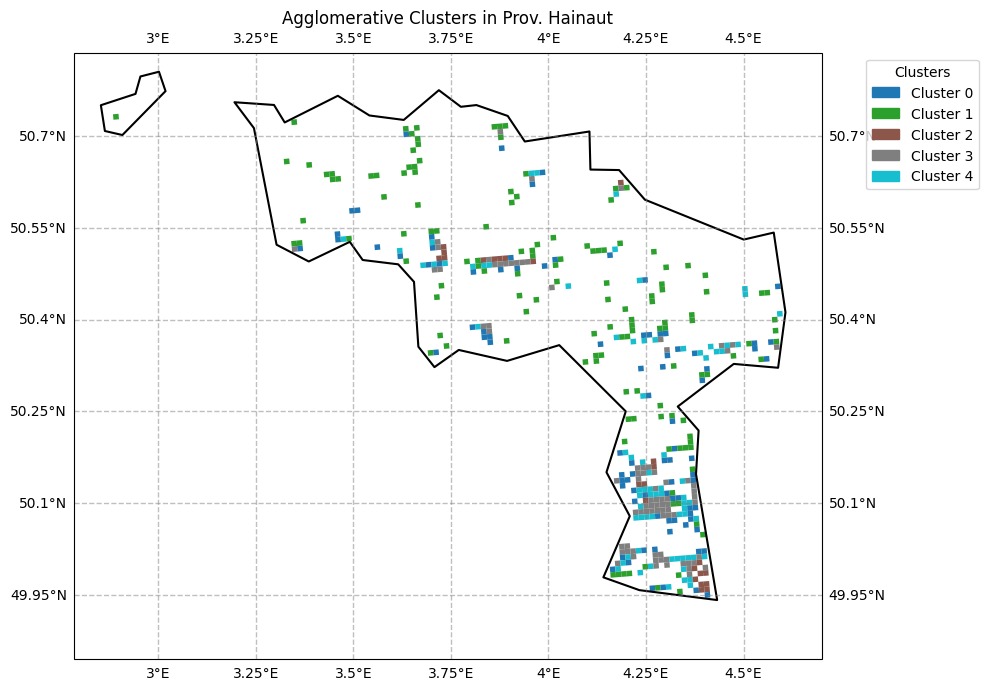

In [ ]:
# Ensure region_data_gdf_nuts2 and cluster_label column exist
if 'region_data_gdf_nuts2' in locals() and not region_data_gdf_nuts2.empty and 'cluster_label' in region_data_gdf_nuts2.columns:

    # Create a map
    fig = plt.figure(figsize=(10, 10))
    # We will reproject region_data_gdf_nuts2 back to WGS84 for plotting with Cartopy
    try:
        region_data_gdf_nuts2_wgs84 = region_data_gdf_nuts2.to_crs(epsg=4326)
        print("Successfully reprojected region_data_gdf_nuts2 to WGS84 (EPSG:4326) for plotting.")

        # Get the bounds of the reprojected data for setting map extent
        region_bounds_wgs84 = region_data_gdf_nuts2_wgs84.total_bounds
        # Add a small buffer to the extent for better visualization
        buffer = 0.1
        extent = [region_bounds_wgs84[0] - buffer, region_bounds_wgs84[2] + buffer, region_bounds_wgs84[1] - buffer, region_bounds_wgs84[3] + buffer]

        ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
        ax.set_extent(extent, crs=ccrs.PlateCarree())

        # Plot the clustered data points (squares)
        # Use a categorical colormap since cluster labels are discrete categories
        # 'tab10' is a good choice for distinct colors
        # Ensure cluster labels are integers for discrete mapping
        region_data_gdf_nuts2_wgs84['cluster_label'] = region_data_gdf_nuts2_wgs84['cluster_label'].astype(int)

        # Get the number of unique clusters to set color map levels
        n_unique_clusters = region_data_gdf_nuts2_wgs84['cluster_label'].nunique()
        cmap = cm.get_cmap('tab10', n_unique_clusters) # Use a categorical colormap with the correct number of colors

        # Plot the squares, colored by cluster_label
        # Turn off the default legend generated by plot()
        mappable = region_data_gdf_nuts2_wgs84.plot(
            ax=ax,
            column='cluster_label',
            cmap=cmap,
            legend=False, # Turn off default legend
            linewidth=0, # No outline for the squares
            vmin=vmin, # Set vmin based on cluster labels
            vmax=vmax  # Set vmax based on cluster labels
        )

        # Add title
        # Use the region_name from the previous steps, assuming it's still in memory
        # If not, you might need to redefine or retrieve it.
        # Assuming region_nuts2_name is available from the previous cell's execution.
        region_name = region_nuts2_name if 'region_nuts2_name' in locals() else "Specified Region (NUTS2)"
        ax.set_title(f'Agglomerative Clusters in {region_name}')

        # Optional: Add the region boundary on top
        # Need the region boundary GeoDataFrame in WGS84 for plotting
        if 'nuts2_gdf' in locals() and not nuts2_gdf.empty:
             # Find the boundary for the specific region again using its NUTS_ID
             if 'region_nuts2_id' in locals():
                 # Filter the nuts2_gdf to get the boundary for the specific region
                 nuts2_region_boundary_gdf_orig_crs = nuts2_gdf[nuts2_gdf['NUTS_ID'] == region_nuts2_id].copy()
                 if not nuts2_region_boundary_gdf_orig_crs.empty:
                      # Reproject the filtered GeoDataFrame to WGS84 for consistent plotting
                      nuts2_region_boundary_wgs84 = nuts2_region_boundary_gdf_orig_crs.to_crs(epsg=4326)
                      # Plot the reprojected boundary
                      nuts2_region_boundary_wgs84.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.5)
             else:
                  print("Warning: region_nuts2_id not found, cannot plot region boundary.")


        # Add gridlines and labels (optional)
        ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

        # --- Manually create and position a legend for categorical data ---
        # Create legend handles and labels
        legend_handles = [plt.Rectangle((0,0),1,1, color=cmap(i/(n_unique_clusters-1))) for i in range(n_unique_clusters)] # Handles for each cluster color
        legend_labels = [f'Cluster {i}' for i in range(n_unique_clusters)] # Labels for each cluster

        # Position the legend outside the plot, to the right
        # bbox_to_anchor controls the position (x, y), loc controls the alignment of the legend box
        # You might need to adjust the bbox_to_anchor coordinates based on your plot size and desired position
        ax.legend(legend_handles, legend_labels, title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')


        # Adjust layout to prevent labels overlapping and make space for the legend
        plt.tight_layout()

        plt.show()


    except Exception as e:
        print(f"An error occurred while plotting the clusters: {e}")


else:
    print("Error: region_data_gdf_nuts2 not found, is empty, or missing 'cluster_label' column. Cannot plot clusters.")

In [ ]:
# Up to now it was with user-specified number of clusters
# Now, let's find the best number of clusters

In [ ]:
# Define the index of the row in nuts2_gdf to use for the region
# Assuming the user still wants the first row (Prov. Oost-Vlaanderen)
region_index_nuts2_gdf = 80

# Ensure nuts2_gdf and data_squares_gdf are available and not empty
if 'nuts2_gdf' not in locals() or nuts2_gdf.empty:
    print("Error: NUTS2 GeoDataFrame (nuts2_gdf) is not available or is empty.")
    clustering_data_nuts2_scaled = pd.DataFrame() # Initialize empty on error
elif 'data_squares_gdf' not in locals() or data_squares_gdf.empty:
    print("Error: data_squares_gdf is not available or is empty.")
    clustering_data_nuts2_scaled = pd.DataFrame() # Initialize empty on error
elif region_index_nuts2_gdf >= len(nuts2_gdf):
    print(f"Error: Region index {region_index_nuts2_gdf} is out of bounds for nuts2_gdf (which has {len(nuts2_gdf)} rows).")
    clustering_data_nuts2_scaled = pd.DataFrame() # Initialize empty on error
else:
    # Get the specific region's row from nuts2_gdf
    region_nuts2_row = nuts2_gdf.iloc[region_index_nuts2_gdf]
    region_nuts2_id = region_nuts2_row['NUTS_ID']
    region_nuts2_name = region_nuts2_row['NUTS_NAME']
    print(f"Selected region for clustering: {region_nuts2_name} ({region_nuts2_id})")

    # Project the region's geometry to EPSG:3035 for spatial filtering with data_squares_gdf
    try:
        region_geometry_nuts2_projected = gpd.GeoSeries([region_nuts2_row.geometry], crs=nuts2_gdf.crs).to_crs(epsg=3035).iloc[0]
        print("Successfully projected region boundary to EPSG:3035.")
    except Exception as e:
        print(f"Error projecting region boundary: {e}")
        region_geometry_nuts2_projected = None # Set to None on error
        clustering_data_nuts2_scaled = pd.DataFrame() # Initialize empty on error


    if region_geometry_nuts2_projected is not None:
        # Filter data_squares_gdf to only include points within this region's boundary
        try:
            # Ensure data_squares_gdf is also in EPSG:3035, which it should be based on its creation cell
            region_data_gdf_nuts2 = data_squares_gdf[data_squares_gdf.geometry.within(region_geometry_nuts2_projected)].copy()
            print(f"Number of data points within {region_nuts2_name}: {len(region_data_gdf_nuts2)}")

            # Select the variables for clustering
            clustering_variables = all_supply_demand_columns # Use all supply and demand columns

            # Check if all clustering variables are in the filtered data
            missing_clustering_vars = [var for var in clustering_variables if var not in region_data_gdf_nuts2.columns]
            if missing_clustering_vars:
                print(f"Error: The following clustering variables were not found in the filtered data: {missing_clustering_vars}")
                clustering_data_nuts2_scaled = pd.DataFrame() # Initialize empty on error
            elif region_data_gdf_nuts2.empty:
                 print("No data points found within the specified region after filtering.")
                 clustering_data_nuts2_scaled = pd.DataFrame() # Initialize empty on error
            else:
                clustering_data_nuts2 = region_data_gdf_nuts2[clustering_variables].copy()

                # --- Handle Missing Values ---
                # Use SimpleImputer to fill missing values (e.g., with the mean)
                imputer = SimpleImputer(strategy='mean')
                # Fit on data and transform. .values is needed for imputer.
                # Use .copy() after imputation to avoid potential SettingWithCopyWarning later
                clustering_data_nuts2_imputed = pd.DataFrame(imputer.fit_transform(clustering_data_nuts2), columns=clustering_data_nuts2.columns, index=clustering_data_nuts2.index).copy()

                print("\nData after imputation:")
                display(clustering_data_nuts2_imputed.head())
                print(f"Number of data points after imputation: {len(clustering_data_nuts2_imputed)}")


                # --- Standardize the data ---
                # Scaling is important for distance-based algorithms like Agglomerative Clustering
                scaler = StandardScaler()
                # Fit on imputed data and transform
                # Use .copy() after scaling to avoid potential SettingWithCopyWarning later
                clustering_data_nuts2_scaled = pd.DataFrame(scaler.fit_transform(clustering_data_nuts2_imputed), columns=clustering_data_nuts2_imputed.columns, index=clustering_data_nuts2_imputed.index).copy()


                print("\nData after scaling:")
                display(clustering_data_nuts2_scaled.head())
                print(f"Number of data points after scaling: {len(clustering_data_nuts2_scaled)}")

                # Store the GeoDataFrame with spatial information for later use in isoperimetric quotient calculation
                # Ensure the geometry column is retained
                region_data_gdf_nuts2_prepared = region_data_gdf_nuts2.copy()


        except Exception as e:
            print(f"An error occurred while filtering data or preparing for clustering: {e}")
            clustering_data_nuts2_scaled = pd.DataFrame() # Initialize empty on error

    else:
        print("Cannot prepare data for clustering due to error in projecting region boundary.")
        clustering_data_nuts2_scaled = pd.DataFrame() # Initialize empty on error

# The scaled data for clustering is now in clustering_data_nuts2_scaled
# The GeoDataFrame with geometry is in region_data_gdf_nuts2_prepared

In [ ]:
# Ensure scaled clustering data and prepared GeoDataFrame are available
if 'clustering_data_nuts2_scaled' not in locals() or clustering_data_nuts2_scaled.empty:
    print("Error: Scaled clustering data (clustering_data_nuts2_scaled) is not available or is empty.")
elif 'region_data_gdf_nuts2_prepared' not in locals() or region_data_gdf_nuts2_prepared.empty:
     print("Error: Prepared GeoDataFrame (region_data_gdf_nuts2_prepared) is not available or is empty.")
else:
    # Define the range of cluster numbers to test
    cluster_range = range(2, 16) # From 2 to 15 clusters

    # Dictionary to store the average isoperimetric quotient for each number of clusters
    isoperimetric_quotients_by_n_clusters = {}

    print("Iterating through cluster numbers and calculating isoperimetric quotients:")

    # Iterate through each number of clusters
    for n_clusters in cluster_range:
        print(f"\n--- Testing {n_clusters} clusters ---")

        try:
            # Perform Agglomerative Clustering
            agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
            cluster_labels = agg_clustering.fit_predict(clustering_data_nuts2_scaled.values)

            # Create a temporary GeoDataFrame with cluster labels for isoperimetric quotient calculation
            # Need to ensure the index aligns correctly
            temp_gdf_with_clusters = region_data_gdf_nuts2_prepared.copy()
            temp_gdf_with_clusters['cluster_label'] = cluster_labels

            # Calculate the average isoperimetric quotient for the current clustering solution
            average_quotient, individual_quotients = calculate_isoperimetric_quotient(temp_gdf_with_clusters, cluster_column='cluster_label')

            # Store the average quotient
            isoperimetric_quotients_by_n_clusters[n_clusters] = average_quotient

            print(f"Average Isoperimetric Quotient for {n_clusters} clusters: {average_quotient}")

        except Exception as e:
            print(f"An error occurred during clustering or quotient calculation for {n_clusters} clusters: {e}")
            isoperimetric_quotients_by_n_clusters[n_clusters] = None # Store None if calculation fails


    # Convert the results to a pandas Series for easier analysis
    isoperimetric_quotients_series = pd.Series(isoperimetric_quotients_by_n_clusters)

    print("\nIsoperimetric Quotients for each number of clusters:")
    display(isoperimetric_quotients_series)

    # Find the number of clusters with the smallest isoperimetric quotient (excluding None values)
    # Drop None values before finding the index of the minimum
    valid_quotients = isoperimetric_quotients_series.dropna()

    if not valid_quotients.empty:
        optimal_n_clusters = valid_quotients.idxmin()
        min_quotient = valid_quotients.min()
        print(f"\nOptimal number of clusters (smallest isoperimetric quotient): {optimal_n_clusters}")
        print(f"Minimum Isoperimetric Quotient: {min_quotient}")
    else:
        print("\nCould not determine optimal number of clusters as all quotient calculations failed or resulted in None.")
        optimal_n_clusters = None # Set to None if optimal cannot be determined

# The optimal_n_clusters is now determined (or is None)

In [ ]:
# Ensure scaled clustering data is available and optimal_n_clusters is determined
if 'clustering_data_nuts2_scaled' not in locals() or clustering_data_nuts2_scaled.empty:
    print("Error: Scaled clustering data (clustering_data_nuts2_scaled) is not available or is empty.")
elif 'optimal_n_clusters' not in locals() or optimal_n_clusters is None:
    print("Error: Optimal number of clusters (optimal_n_clusters) was not determined.")
else:
    print(f"Performing final Agglomerative Clustering with optimal number of clusters: {optimal_n_clusters}")

    try:
        # Perform Agglomerative Clustering with the optimal number of clusters
        agg_clustering_final = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage='ward')
        cluster_labels_final = agg_clustering_final.fit_predict(clustering_data_nuts2_scaled.values)

        # Add the final cluster labels to the prepared GeoDataFrame
        # Ensure region_data_gdf_nuts2_prepared is available
        if 'region_data_gdf_nuts2_prepared' in locals() and not region_data_gdf_nuts2_prepared.empty:
             region_data_gdf_nuts2_prepared['final_cluster_label'] = cluster_labels_final
             print("Final cluster labels added to region_data_gdf_nuts2_prepared.")
             display(region_data_gdf_nuts2_prepared[['final_cluster_label']].head())
        else:
             print("Error: Prepared GeoDataFrame (region_data_gdf_nuts2_prepared) is not available or is empty. Cannot add final cluster labels.")


    except Exception as e:
        print(f"An error occurred during the final clustering: {e}")

# The final clustering results are now in region_data_gdf_nuts2_prepared['final_cluster_label']

Performing final Agglomerative Clustering with optimal number of clusters: 4
Final cluster labels added to region_data_gdf_nuts2_prepared.


final_cluster_label
1414772                    1
1416285                    3
1416286                    1
1416287                    3
1416288                    3

In [ ]:
# Ensure region_data_gdf_nuts2_prepared and final_cluster_label column exist
if 'region_data_gdf_nuts2_prepared' in locals() and not region_data_gdf_nuts2_prepared.empty and 'final_cluster_label' in region_data_gdf_nuts2_prepared.columns:

    # Create a map
    fig = plt.figure(figsize=(10, 10))
    # We will reproject region_data_gdf_nuts2_prepared back to WGS84 for plotting with Cartopy
    try:
        region_data_gdf_nuts2_prepared_wgs84 = region_data_gdf_nuts2_prepared.to_crs(epsg=4326)
        print("Successfully reprojected region_data_gdf_nuts2_prepared to WGS84 (EPSG:4326) for plotting.")

        # Get the bounds of the reprojected data for setting map extent
        region_bounds_wgs84 = region_data_gdf_nuts2_prepared_wgs84.total_bounds
        # Add a small buffer to the extent for better visualization
        buffer = 0.1
        extent = [region_bounds_wgs84[0] - buffer, region_bounds_wgs84[2] + buffer, region_bounds_wgs84[1] - buffer, region_bounds_wgs84[3] + buffer]

        ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
        ax.set_extent(extent, crs=ccrs.PlateCarree())

        # Plot the clustered data points (squares)
        # Use a categorical colormap since cluster labels are discrete categories
        # 'tab10' is a good choice for distinct colors
        # Ensure cluster labels are integers for discrete mapping
        region_data_gdf_nuts2_prepared_wgs84['final_cluster_label'] = region_data_gdf_nuts2_prepared_wgs84['final_cluster_label'].astype(int)

        # Get the number of unique clusters to set color map levels
        n_unique_clusters = region_data_gdf_nuts2_prepared_wgs84['final_cluster_label'].nunique()
        cmap = cm.get_cmap('tab10', n_unique_clusters) # Use a categorical colormap with the correct number of colors

        # Plot the squares, colored by final_cluster_label
        # Turn off the default legend generated by plot()
        mappable = region_data_gdf_nuts2_prepared_wgs84.plot(
            ax=ax,
            column='final_cluster_label',
            cmap=cmap,
            legend=False, # Turn off default legend
            linewidth=0, # No outline for the squares
            vmin=region_data_gdf_nuts2_prepared_wgs84['final_cluster_label'].min(), # Set vmin based on cluster labels
            vmax=region_data_gdf_nuts2_prepared_wgs84['final_cluster_label'].max()  # Set vmax based on cluster labels
        )

        # Add title
        # Use the region_nuts2_name from previous steps, assuming it's still in memory
        region_name = region_nuts2_name if 'region_nuts2_name' in locals() else "Specified Region (NUTS2)"
        ax.set_title(f'Agglomerative Clusters ({n_unique_clusters} Clusters) in {region_name}')

        # Optional: Add the region boundary on top
        # Need the region boundary GeoDataFrame in WGS84 for plotting
        if 'nuts2_gdf' in locals() and not nuts2_gdf.empty:
             # Find the boundary for the specific region again using its NUTS_ID
             if 'region_nuts2_id' in locals():
                 # Filter the nuts2_gdf to get the boundary for the specific region
                 nuts2_region_boundary_gdf_orig_crs = nuts2_gdf[nuts2_gdf['NUTS_ID'] == region_nuts2_id].copy()
                 if not nuts2_region_boundary_gdf_orig_crs.empty:
                      # Reproject the filtered GeoDataFrame to WGS84 for consistent plotting
                      nuts2_region_boundary_wgs84 = nuts2_region_boundary_gdf_orig_crs.to_crs(epsg=4326)
                      # Plot the reprojected boundary
                      nuts2_region_boundary_wgs84.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.5)
             else:
                  print("Warning: region_nuts2_id not found, cannot plot region boundary.")


        # Add gridlines and labels (optional)
        ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

        # --- Manually create and position a legend for categorical data ---
        # Create legend handles and labels
        legend_handles = [plt.Rectangle((0,0),1,1, color=cmap(i/(n_unique_clusters-1))) for i in range(n_unique_clusters)] # Handles for each cluster color
        legend_labels = [f'Cluster {i}' for i in range(n_unique_clusters)] # Labels for each cluster

        # Position the legend outside the plot, to the right, adjusted for space
        # You might need to fine-tune the bbox_to_anchor coordinates (x, y)
        ax.legend(legend_handles, legend_labels, title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')


        # Adjust layout to prevent labels overlapping and make space for the legend
        plt.tight_layout()

        plt.show()


    except Exception as e:
        print(f"An error occurred while plotting the clusters: {e}")


else:
    print("Error: region_data_gdf_nuts2_prepared not found, is empty, or missing 'final_cluster_label' column. Cannot plot clusters.")

lon           lat  abelow_biom  abelow_carbon  \
0       5009031.00000 5376235.00000   5061.00000     2457.00000   
1       5009031.00000 5375235.00000   4152.00000     2016.00000   
2       5011031.00000 5375235.00000   4672.00000     2268.00000   
3       5012031.00000 5375235.00000   2855.00000     1386.00000   
4       5060031.00000 5373235.00000   3532.00000     1697.00000   
...               ...           ...          ...            ...   
1485027 4619031.00000 1605235.00000  15457.00000     7187.00000   
1485028 4620031.00000 1605235.00000  15936.00000     7410.00000   
1485029 4626031.00000 1605235.00000      0.00000        0.00000   
1485030 4648031.00000 1605235.00000   6693.00000     3112.00000   
1485031 4649031.00000 1605235.00000  10199.00000     4742.00000   

         above_biomass  above_carbon  accessibility  density         et  \
0           4282.00000    2076.00000      814.00000  0.00000  440.00000   
1           3513.00000    1703.00000      814.00000  0.00000  448.00000   
2           3952.00000    1916.00000      870.00000  0.00000  410.00000   
3           2415.00000    1171.00000      888.00000  0.00000  428.00000   
4           2989.00000    1422.00000      764.00000  0.00000  451.00000   
...                ...           ...            ...      ...        ...   
1485027    12357.00000    5738.00000      117.00000  0.00000 1538.00000   
1485028    12740.00000    5917.00000      103.00000  0.00000 1535.00000   
1485029        0.00000       0.00000       90.00000  0.00000 1543.00000   
1485030     5350.00000    2485.00000       35.00000  0.00000 1562.00000   
1485031     8153.00000    3786.00000       45.00000  0.00000 1563.00000   

              gsv  ...  demand_biomass_energy  demand_hunting_game  \
0         1.00000  ...                0.75458              0.76337   
1        51.00000  ...                0.75513              0.75473   
2       125.00000  ...                0.74263              0.77368   
3        20.00000  ...                0.75485              0.77896   
4         0.00000  ...                0.76000              0.79446   
...           ...  ...                    ...                  ...   
1485027  60.00000  ...                0.79579              0.68167   
1485028  77.00000  ...                0.79659              0.66740   
1485029   0.00000  ...                0.92390              0.49673   
1485030  17.00000  ...                0.87604              0.61549   
1485031  27.00000  ...                0.83588              0.65008   

         demand_NWFP  demand_erosion_control  demand_air_quality_regulation  \
0            0.59068                 0.58209                        0.54271   
1            0.59213                 0.57755                        0.53668   
2            0.57069                 0.54372                        0.51455   
3            0.57869                 0.56372                        0.52936   
4            0.54868                 0.54365                        0.50877   
...              ...                     ...                            ...   
1485027      0.45624                 0.56577                        0.48169   
1485028      0.42288                 0.56706                        0.46233   
1485029      0.42429                 0.64727                        0.50960   
1485030      0.50384                 0.62829                        0.56947   
1485031      0.53168                 0.62536                        0.58019   

         demand_CC_mitigation  demand_habitat_provision  \
0                     0.51894                   0.38948   
1                     0.51199                   0.38797   
2                     0.49463                   0.36958   
3                     0.51252                   0.39378   
4                     0.50606                   0.41733   
...                       ...                       ...   
1485027               0.52570                   0.42899   
1485028               0.51255                   0.

# Spatial clustering - in a loop for all NUTS 2 regions

In [ ]:
# Step 1: Load NUTS Level 2 boundaries

# Define the path to the GeoPackage file
gpkg_path_2016 = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/NUTS_RG_10M_2016_4326.gpkg'

try:
    # Check if the file exists
    if not os.path.exists(gpkg_path_2016):
        raise FileNotFoundError(f"GeoPackage file not found at: {gpkg_path_2016}")

    # Load the primary layer from the GeoPackage file
    layers_2016 = fiona.listlayers(gpkg_path_2016)
    if layers_2016:
        primary_layer_2016 = layers_2016[0]
        nuts2_gdf = gpd.read_file(gpkg_path_2016, layer=primary_layer_2016)

        print(f"Successfully loaded layer '{primary_layer_2016}' from the GeoPackage.")
        print("Original NUTS GeoDataFrame shape:", nuts2_gdf.shape)

        # Filter for NUTS level 2 (LEVL_CODE == 2)
        nuts2_gdf = nuts2_gdf[nuts2_gdf['LEVL_CODE'] == 2].copy()

        print("Filtered GeoDataFrame shape (NUTS2 Regions):", nuts2_gdf.shape)
        print("NUTS Level 2 (Region) Codes and Names:")
        display(nuts2_gdf[['NUTS_ID', 'NUTS_NAME', 'CNTR_CODE']])

    else:
        print("No layers found in the GeoPackage.")
        nuts2_gdf = gpd.GeoDataFrame() # Initialize empty if no layers found

except FileNotFoundError as e:
    print(e)
    print("Please ensure the 2016 GeoPackage file is in the specified Google Drive folder.")
    nuts2_gdf = gpd.GeoDataFrame() # Initialize empty on error
except Exception as e:
    print(f"An error occurred while loading or filtering the GeoPackage: {e}")
    nuts2_gdf = gpd.GeoDataFrame() # Initialize empty on error

Successfully loaded layer 'NUTS_RG_10M_2016_4326.gpkg' from the GeoPackage.
Original NUTS GeoDataFrame shape: (2016, 9)
Filtered GeoDataFrame shape (NUTS2 Regions): (332, 9)
NUTS Level 2 (Region) Codes and Names:


NUTS_ID                                   NUTS_NAME CNTR_CODE
1355    BE23                       Prov. Oost-Vlaanderen        BE
1356    BE24                        Prov. Vlaams-Brabant        BE
1357    BE25                       Prov. West-Vlaanderen        BE
1358    BE31                        Prov. Brabant Wallon        BE
1359    BE32                               Prov. Hainaut        BE
...      ...                                         ...       ...
1853    UKI7          Outer London - West and North West        UK
1854    UKJ1  Berkshire, Buckinghamshire and Oxfordshire        UK
1855    UKJ2                Surrey, East and West Sussex        UK
1856    UKJ3                 Hampshire and Isle of Wight        UK
1857    UKJ4                                        Kent        UK

[332 rows x 3 columns]

In [ ]:
# Step 2: Initialize results DataFrame

# Define the columns for the final results DataFrame
results_columns = [
    'Grid_Max_Index',
    'lat_WGS84',
    'lon_WGS84',
    'LEVL_CODE',
    'NUTS_ID',
    'CNTR_CODE',
    'NAME_LATN',
    'NUTS_NAME',
    'Final_Cluster_Label'
]

# Initialize an empty DataFrame with these columns
final_clustering_results_df = pd.DataFrame(columns=results_columns)

print("Initialized empty DataFrame for final clustering results:")
display(final_clustering_results_df)

Initialized empty DataFrame for final clustering results:


Empty DataFrame
Columns: [Grid_Max_Index, lat_WGS84, lon_WGS84, LEVL_CODE, NUTS_ID, CNTR_CODE, NAME_LATN, NUTS_NAME, Final_Cluster_Label]
Index: []

In [ ]:
final_clustering_results_df = pd.read_csv('final_clustering_results_df.csv')

In [ ]:
final_clustering_results_df

Grid_Max_Index  lat_WGS84  lon_WGS84  LEVL_CODE NUTS_ID CNTR_CODE  \
0              11592303   51.23972    4.06473          2    BE23        BE   
1              11592304   51.24045    4.07901          2    BE23        BE   
2              11597251   51.23149    4.08016          2    BE23        BE   
3              11612059   51.17968    3.61298          2    BE23        BE   
4              11612075   51.19201    3.84111          2    BE23        BE   
...                 ...        ...        ...        ...     ...       ...   
1451264        11572291   51.06822    0.87125          2    UKJ4        UK   
1451265        11572303   51.08153    1.04138          2    UKJ4        UK   
1451266        11577227   51.04689    0.71719          2    UKJ4        UK   
1451267        11577232   51.05256    0.78801          2    UKJ4        UK   
1451268        11592066   51.01789    0.69427          2    UKJ4        UK   

                     NAME_LATN              NUTS_NAME  Final_Cluster_Label  
0        Prov. Oost-Vlaanderen  Prov. Oost-Vlaanderen                    0  
1        Prov. Oost-Vlaanderen  Prov. Oost-Vlaanderen                    0  
2        Prov. Oost-Vlaanderen  Prov. Oost-Vlaanderen                    0  
3        Prov. Oost-Vlaanderen  Prov. Oost-Vlaanderen                    2  
4        Prov. Oost-Vlaanderen  Prov. Oost-Vlaanderen                    0  
...                        ...                    ...                  ...  
1451264                   Kent                   Kent                    0  
1451265                   Kent                   Kent                    0  
1451266                   Kent                   Kent                    1  
1451267                   Kent                   Kent                    0  
1451268                   Kent                   Kent                    1  

[1451269 rows x 9 columns]

In [ ]:
# Ensure nuts2_gdf and data_squares_gdf are available and not empty
if 'nuts2_gdf' not in locals() or nuts2_gdf.empty:
    print("Error: NUTS2 GeoDataFrame (nuts2_gdf) is not available or is empty. Cannot proceed with clustering by region.")
elif 'data_squares_gdf' not in locals() or data_squares_gdf.empty:
    print("Error: data_squares_gdf is not available or is empty. Cannot proceed with clustering by region.")
elif 'final_clustering_results_df' not in locals():
    print("Error: final_clustering_results_df is not initialized. Please run the previous cell to initialize it.")
elif 'nuts3_gdf' not in locals() or nuts3_gdf.empty:
     print("Error: NUTS3 GeoDataFrame (nuts3_gdf) is not available or is empty. Cannot perform NUTS3 clustering for large regions.")
else:
    # Select the variables for clustering
    clustering_variables = all_supply_demand_columns # Use all supply and demand columns as requested

    # Ensure the original 'data' DataFrame is available for extracting columns later
    if 'data' not in locals() or data.empty:
        print("Error: Original 'data' DataFrame not found or is empty. Cannot extract columns for final results.")
    else:
        print("Starting clustering process for all NUTS2 regions...")

        # Project nuts2_gdf and nuts3_gdf to EPSG:3035 before the loop for efficient spatial filtering
        try:
            nuts2_gdf_projected = nuts2_gdf.to_crs(epsg=3035)
            nuts3_gdf_projected = nuts3_gdf.to_crs(epsg=3035)
            print("\nSuccessfully projected NUTS2 and NUTS3 boundaries to EPSG:3035.")
        except Exception as e:
            print(f"Error projecting NUTS boundaries: {e}")
            nuts2_gdf_projected = gpd.GeoDataFrame() # Initialize empty on error if projection fails
            nuts3_gdf_projected = gpd.GeoDataFrame() # Initialize empty on error if projection fails


        # Identify processed regions
        if not final_clustering_results_df.empty:
            # Get unique NUTS_ID values from the results DataFrame
            processed_nuts2_ids = final_clustering_results_df['NUTS_ID'].unique()
            print(f"\nFound {len(processed_nuts2_ids)} already processed NUTS2/NUTS3 regions. Skipping these.")
            # Display the first few processed IDs for verification
            print("First 10 processed NUTS IDs:")
            display(processed_nuts2_ids[:10])
        else:
            processed_nuts2_ids = []
            print("\nNo previously processed NUTS2/NUTS3 regions found. Starting from the beginning.")


        # Counter for processed regions in this run (for saving)
        regions_processed_in_this_run = 0

        # Define the threshold for switching to NUTS3 clustering
        nuts3_clustering_threshold = 100000

        # Iterate through each NUTS Level 2 region in the projected GeoDataFrame
        if not nuts2_gdf_projected.empty and not nuts3_gdf_projected.empty:
            for index, region_nuts2 in nuts2_gdf_projected.iterrows():
                region_nuts2_id = region_nuts2['NUTS_ID']

                # Skip region if already processed (check against the list of NUTS_IDs in the results)
                if region_nuts2_id in processed_nuts2_ids:
                    print(f"\nSkipping region {region_nuts2_id} as it has already been processed.")
                    continue # Move to the next region


                region_nuts2_name = region_nuts2['NUTS_NAME']
                region_nuts2_cntr_code = region_nuts2['CNTR_CODE']
                region_nuts2_name_latn = region_nuts2['NAME_LATN']
                region_nuts2_levl_code = region_nuts2['LEVL_CODE']
                region_nuts2_geometry_projected = region_nuts2.geometry # Use the projected geometry

                print(f"\n--- Processing Region: {region_nuts2_name} ({region_nuts2_id}, Country: {region_nuts2_cntr_code}) ---")

                # Filter data_squares_gdf to only include points within this NUTS2 region's boundary
                try:
                    region_data_gdf_nuts2 = data_squares_gdf[data_squares_gdf.geometry.within(region_nuts2_geometry_projected)].copy()
                    print(f"Number of data points within {region_nuts2_name}: {len(region_data_gdf_nuts2)}")

                    # Check if there is enough data for this NUTS2 region
                    if len(region_data_gdf_nuts2) < 2:
                        print(f"Not enough data points (less than 2) in {region_nuts2_name} for clustering. Skipping this region.")
                        continue # Move to the next region

                    # Check if the number of data points exceeds the threshold for NUTS3 clustering
                    if len(region_data_gdf_nuts2) > nuts3_clustering_threshold:
                        print(f"  Number of data points ({len(region_data_gdf_nuts2)}) exceeds threshold ({nuts3_clustering_threshold}). Performing clustering at NUTS3 level within {region_nuts2_name}.")

                        # Filter NUTS3 regions that are within this NUTS2 region
                        nuts3_regions_in_nuts2 = nuts3_gdf_projected[nuts3_gdf_projected.geometry.within(region_nuts2_geometry_projected)].copy()

                        if nuts3_regions_in_nuts2.empty:
                            print(f"  No NUTS3 regions found within {region_nuts2_name}. Skipping NUTS3 clustering for this region.")
                            continue # Move to the next NUTS2 region

                        # Iterate through each NUTS3 region within this NUTS2 region
                        for idx_nuts3, region_nuts3 in nuts3_regions_in_nuts2.iterrows():
                            region_nuts3_id = region_nuts3['NUTS_ID']

                            # Check if this NUTS3 region has already been processed (by checking the NUTS_ID in the results)
                            if region_nuts3_id in processed_nuts2_ids:
                                print(f"  Skipping NUTS3 region {region_nuts3_id} as it has already been processed.")
                                continue # Move to the next NUTS3 region within this NUTS2 region


                            region_nuts3_name = region_nuts3['NUTS_NAME']
                            region_nuts3_cntr_code = region_nuts3['CNTR_CODE']
                            region_nuts3_name_latn = region_nuts3['NAME_LATN']
                            region_nuts3_levl_code = region_nuts3['LEVL_CODE']
                            region_nuts3_geometry_projected = region_nuts3.geometry

                            print(f"  Processing NUTS3 Region: {region_nuts3_name} ({region_nuts3_id})")

                            # Filter data_squares_gdf to only include points within this NUTS3 region's boundary
                            region_data_gdf_nuts3 = data_squares_gdf[data_squares_gdf.geometry.within(region_nuts3_geometry_projected)].copy()

                            print(f"  Number of data points within {region_nuts3_name}: {len(region_data_gdf_nuts3)}")

                            # Check if there is enough data for this NUTS3 region
                            if len(region_data_gdf_nuts3) < 2:
                                print(f"  Not enough data points (less than 2) in {region_nuts3_name} for clustering. Skipping this NUTS3 region.")
                                continue # Move to the next NUTS3 region

                            # Select the clustering variables and ensure they are in the filtered data
                            region_clustering_data_nuts3 = region_data_gdf_nuts3[clustering_variables].copy()

                             # Check if all clustering variables are in the filtered data (redundant check, but good practice)
                            missing_clustering_vars = [var for var in clustering_variables if var not in region_clustering_data_nuts3.columns]
                            if missing_clustering_vars:
                                print(f"  Error: The following clustering variables were not found in the filtered data for {region_nuts3_name}: {missing_clustering_vars}. Skipping this NUTS3 region.")
                                continue # Move to the next NUTS3 region


                            # --- Handle Missing Values ---
                            imputer = SimpleImputer(strategy='mean')
                            region_clustering_data_imputed_nuts3 = pd.DataFrame(imputer.fit_transform(region_clustering_data_nuts3), columns=region_clustering_data_nuts3.columns, index=region_clustering_data_nuts3.index).copy()

                            # --- Standardize the data ---
                            scaler = StandardScaler()
                            region_clustering_data_scaled_nuts3 = pd.DataFrame(scaler.fit_transform(region_clustering_data_imputed_nuts3), columns=region_clustering_data_imputed_nuts3.columns, index=region_clustering_data_imputed_nuts3.index).copy()

                            # Store the GeoDataFrame with spatial information for later use in isoperimetric quotient calculation
                            region_data_gdf_nuts3_prepared = region_data_gdf_nuts3.copy()


                            # Find optimal number of clusters for the current NUTS3 region
                            cluster_range = range(2, min(16, len(region_clustering_data_scaled_nuts3) + 1)) # Adjust max clusters if data points are few
                            isoperimetric_quotients_by_n_clusters = {}

                            print("    Finding optimal number of clusters...")

                            for n in cluster_range:
                                try:
                                    agg_clustering = AgglomerativeClustering(n_clusters=n, linkage='ward')
                                    cluster_labels = agg_clustering.fit_predict(region_clustering_data_scaled_nuts3.values)

                                    temp_gdf_with_clusters = region_data_gdf_nuts3_prepared.copy()
                                    temp_gdf_with_clusters['cluster_label'] = cluster_labels

                                    average_quotient, _ = calculate_isoperimetric_quotient(temp_gdf_with_clusters, cluster_column='cluster_label')
                                    isoperimetric_quotients_by_n_clusters[n] = average_quotient

                                except Exception as e:
                                    print(f"    Error during quotient calculation for {n} clusters in {region_nuts3_name}: {e}")
                                    isoperimetric_quotients_by_n_clusters[n] = None

                            isoperimetric_quotients_series = pd.Series(isoperimetric_quotients_by_n_clusters)
                            valid_quotients = isoperimetric_quotients_series.dropna()

                            if not valid_quotients.empty:
                                optimal_n_clusters = valid_quotients.idxmin()
                                print(f"    Optimal number of clusters for {region_nuts3_name}: {optimal_n_clusters}")
                            else:
                                print(f"    Could not determine optimal number of clusters for {region_nuts3_name}. Skipping NUTS3 region.")
                                continue # Skip to the next NUTS3 region if optimal clusters cannot be determined

                            # Perform final clustering for the current NUTS3 region
                            print(f"    Performing final clustering with {optimal_n_clusters} clusters...")
                            agg_clustering_final = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage='ward')
                            final_cluster_labels = agg_clustering_final.fit_predict(region_clustering_data_scaled_nuts3.values)

                            # Consolidate and store NUTS3 region results
                            print("    Consolidating results...")
                            original_indices = region_data_gdf_nuts3_prepared.index

                            region_results_df = data.loc[original_indices, ['Grid_Max_Index', 'lat_WGS84', 'lon_WGS84']].copy()
                            region_results_df['LEVL_CODE'] = region_nuts3_levl_code # Store NUTS3 level code
                            region_results_df['NUTS_ID'] = region_nuts3_id # Store NUTS3 ID
                            region_results_df['CNTR_CODE'] = region_nuts3_cntr_code
                            region_results_df['NAME_LATN'] = region_nuts3_name_latn
                            region_results_df['NUTS_NAME'] = region_nuts3_name
                            region_results_df['Final_Cluster_Label'] = final_cluster_labels

                            final_clustering_results_df = pd.concat([final_clustering_results_df, region_results_df], ignore_index=True)

                            print(f"    Results for {region_nuts3_name} added to final DataFrame.")

                             # Increment the processed regions count for this run (counting NUTS3 regions as processed units)
                            regions_processed_in_this_run += 1

                            # Save the results to CSV every 10 regions processed in this run (could be NUTS2 or NUTS3 regions)
                            if regions_processed_in_this_run % 10 == 0:
                                try:
                                    final_clustering_results_df.to_csv('final_clustering_results_df.csv', index=False)
                                    print(f"\nSaved intermediate results to 'final_clustering_results_df.csv' after processing {regions_processed_in_this_run} regions in this run.")
                                except Exception as e:
                                     print(f"Error saving intermediate results after processing {regions_processed_in_this_run} regions: {e}")


                    else: # If number of data points in NUTS2 region is <= threshold
                        print(f"  Number of data points ({len(region_data_gdf_nuts2)}) is within threshold ({nuts3_clustering_threshold}). Performing clustering at NUTS2 level for {region_nuts2_name}.")

                        # Select the clustering variables and ensure they are in the filtered data
                        region_clustering_data_nuts2 = region_data_gdf_nuts2[clustering_variables].copy()

                         # Check if all clustering variables are in the filtered data (redundant check, but good practice)
                        missing_clustering_vars = [var for var in clustering_variables if var not in region_clustering_data_nuts2.columns]
                        if missing_clustering_vars:
                            print(f"  Error: The following clustering variables were not found in the filtered data for {region_nuts2_name}: {missing_clustering_vars}. Skipping this region.")
                            continue # Move to the next region


                        # --- Handle Missing Values ---
                        imputer = SimpleImputer(strategy='mean')
                        region_clustering_data_imputed_nuts2 = pd.DataFrame(imputer.fit_transform(region_clustering_data_nuts2), columns=region_clustering_data_nuts2.columns, index=region_clustering_data_nuts2.index).copy()

                        # --- Standardize the data ---
                        scaler = StandardScaler()
                        region_clustering_data_scaled_nuts2 = pd.DataFrame(scaler.fit_transform(region_clustering_data_imputed_nuts2), columns=region_clustering_data_imputed_nuts2.columns, index=region_clustering_data_imputed_nuts2.index).copy()

                        # Store the GeoDataFrame with spatial information for later use in isoperimetric quotient calculation
                        region_data_gdf_nuts2_prepared = region_data_gdf_nuts2.copy()


                        # Find optimal number of clusters for the current NUTS2 region
                        cluster_range = range(2, min(16, len(region_clustering_data_scaled_nuts2) + 1)) # Adjust max clusters if data points are few
                        isoperimetric_quotients_by_n_clusters = {}

                        print("  Finding optimal number of clusters...")

                        for n in cluster_range:
                            try:
                                agg_clustering = AgglomerativeClustering(n_clusters=n, linkage='ward')
                                cluster_labels = agg_clustering.fit_predict(region_clustering_data_scaled_nuts2.values)

                                temp_gdf_with_clusters = region_data_gdf_nuts2_prepared.copy()
                                temp_gdf_with_clusters['cluster_label'] = cluster_labels

                                average_quotient, _ = calculate_isoperimetric_quotient(temp_gdf_with_clusters, cluster_column='cluster_label')
                                isoperimetric_quotients_by_n_clusters[n] = average_quotient

                            except Exception as e:
                                print(f"  Error during quotient calculation for {n} clusters in {region_nuts2_name}: {e}")
                                isoperimetric_quotients_by_n_clusters[n] = None

                        isoperimetric_quotients_series = pd.Series(isoperimetric_quotients_by_n_clusters)
                        valid_quotients = isoperimetric_quotients_series.dropna()

                        if not valid_quotients.empty:
                            optimal_n_clusters = valid_quotients.idxmin()
                            print(f"  Optimal number of clusters for {region_nuts2_name}: {optimal_n_clusters}")
                        else:
                            print(f"  Could not determine optimal number of clusters for {region_nuts2_name}. Skipping.")
                            continue # Skip to the next NUTS2 region if optimal clusters cannot be determined

                        # Perform final clustering for the current NUTS2 region
                        print(f"  Performing final clustering with {optimal_n_clusters} clusters...")
                        agg_clustering_final = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage='ward')
                        final_cluster_labels = agg_clustering_final.fit_predict(region_clustering_data_scaled_nuts2.values)

                        # Consolidate and store NUTS2 region results
                        print("  Consolidating results...")
                        original_indices = region_data_gdf_nuts2_prepared.index

                        region_results_df = data.loc[original_indices, ['Grid_Max_Index', 'lat_WGS84', 'lon_WGS84']].copy()
                        region_results_df['LEVL_CODE'] = region_nuts2_levl_code # Store NUTS2 level code
                        region_results_df['NUTS_ID'] = region_nuts2_id # Store NUTS2 ID
                        region_results_df['CNTR_CODE'] = region_nuts2_cntr_code
                        region_results_df['NAME_LATN'] = region_nuts2_name_latn
                        region_results_df['NUTS_NAME'] = region_nuts2_name
                        region_results_df['Final_Cluster_Label'] = final_cluster_labels

                        final_clustering_results_df = pd.concat([final_clustering_results_df, region_results_df], ignore_index=True)

                        print(f"  Results for {region_nuts2_name} added to final DataFrame.")

                         # Increment the processed regions count for this run (counting NUTS2 regions as processed units)
                        regions_processed_in_this_run += 1

                        # Step 8: Save the results to CSV every 10 regions processed in this run
                        if regions_processed_in_this_run % 10 == 0:
                            try:
                                final_clustering_results_df.to_csv('final_clustering_results_df.csv', index=False)
                                print(f"\nSaved intermediate results to 'final_clustering_results_df.csv' after processing {regions_processed_in_this_run} regions in this run.")
                            except Exception as e:
                                 print(f"Error saving intermediate results after processing {regions_processed_in_this_run} regions: {e}")

                # This except block catches errors during the NUTS2 processing loop
                except Exception as e:
                    print(f"An error occurred while filtering data or preparing for clustering for region {region_nuts2_name}: {e}")
                    # Continue to the next region even if an error occurs for one region

            # After the loop, save the final results one last time to ensure all data is saved
            try:
                final_clustering_results_df.to_csv('final_clustering_results_df.csv', index=False)
                print("\nClustering process for all NUTS2 regions complete.")
                print("Final results DataFrame shape:", final_clustering_results_df.shape)
                print("Final results DataFrame head:")
                display(final_clustering_results_df.head())
                print("Saved final results to 'final_clustering_results_df.csv'.")
            except Exception as e:
                 print(f"Error saving final results: {e}")


        else:
            print("NUTS2 or NUTS3 boundaries (projected) are empty. Cannot process regions.")

# The final results are in final_clustering_results_df

# Summary clustering by FES patterns

In [ ]:
# Here we apply different clustering procedures on mean values of supply and demand per spatial / agglomerative cluster
# After the best clustering solution is found, we then assign it to each data point

In [ ]:
final_clustering_results_df = pd.read_csv('final_clustering_results_df.csv')

In [ ]:
# Merge the two DataFrames based on 'Grid_Max_Index'
# Using a left merge to keep all rows from 'data' and add matching columns from 'final_clustering_results_df'
# If you want to keep only rows present in both DataFrames, use how='inner'
# Specify suffixes for overlapping columns to resolve the MergeError
merged_df = pd.merge(data, final_clustering_results_df, on='Grid_Max_Index', how='left', suffixes=('_data', '_clustering'))

print("Merged DataFrame shape:", merged_df.shape)
print("Merged DataFrame head:")
display(merged_df.head())

# Remove rows where 'Final_Cluster_Label' is NaN
merged_df_cleaned = merged_df.dropna(subset=['Final_Cluster_Label']).copy()

# Make unique cluster labels for each row
merged_df_cleaned['NUTS_ID_Cluster'] = merged_df_cleaned['NUTS_ID'].astype(str) + '-' + merged_df_cleaned['Final_Cluster_Label'].astype(int).astype(str)

# Now make a new table that shows mean values of supply and demand per cluster
columns_to_group = all_supply_demand_columns + ['NUTS_ID_Cluster']
grouped_data = merged_df_cleaned[columns_to_group]
# Group by 'NUTS_ID_Cluster' and calculate the mean for the selected columns
mean_values_by_cluster = grouped_data.groupby('NUTS_ID_Cluster')[all_supply_demand_columns].mean()

Merged DataFrame shape: (1485032, 90)
Merged DataFrame head:


lon           lat  abelow_biom  abelow_carbon  above_biomass  \
0 5009031.00000 5376235.00000   5061.00000     2457.00000     4282.00000   
1 5009031.00000 5375235.00000   4152.00000     2016.00000     3513.00000   
2 5011031.00000 5375235.00000   4672.00000     2268.00000     3952.00000   
3 5012031.00000 5375235.00000   2855.00000     1386.00000     2415.00000   
4 5060031.00000 5373235.00000   3532.00000     1697.00000     2989.00000   

   above_carbon  accessibility  density        et       gsv  ...  \
0    2076.00000      814.00000  0.00000 440.00000   1.00000  ...   
1    1703.00000      814.00000  0.00000 448.00000  51.00000  ...   
2    1916.00000      870.00000  0.00000 410.00000 125.00000  ...   
3    1171.00000      888.00000  0.00000 428.00000  20.00000  ...   
4    1422.00000      764.00000  0.00000 451.00000   0.00000  ...   

   demand_nature_based_education  demand_nature_based_tourism  \
0                        0.16546                      0.21239   
1                        0.16409                      0.21620   
2                        0.16197                      0.23575   
3                        0.16820                      0.21570   
4                        0.18442                      0.22818   

   lat_WGS84_clustering  lon_WGS84_clustering  LEVL_CODE  NUTS_ID  CNTR_CODE  \
0              70.67801              28.64698    2.00000     NO07         NO   
1              70.66933              28.63890    2.00000     NO07         NO   
2              70.66443              28.69020    2.00000     NO07         NO   
3              70.66198              28.71584    2.00000     NO07         NO   
4              70.52322              29.92255    2.00000     NO07         NO   

    NAME_LATN   NUTS_NAME  Final_Cluster_Label  
0  Nord-Norge  Nord-Norge              1.00000  
1  Nord-Norge  Nord-Norge              1.00000  
2  Nord-Norge  Nord-Norge              1.00000  
3  Nord-Norge  Nord-Norge              1.00000  
4  Nord-Norge  Nord-Norge              1.00000  

[5 rows x 90 columns]

In [ ]:
# Prepare the data for clustering
# Use mean_values_by_cluster table as requested
clustering_data = mean_values_by_cluster.copy()

# Handle missing values using imputation (e.g., with the mean)
imputer = SimpleImputer(strategy='mean')
# Fit on data and transform. .values is needed for imputer.
clustering_data_imputed = pd.DataFrame(imputer.fit_transform(clustering_data), columns=clustering_data.columns, index=clustering_data.index)

print("Data after imputation:")
display(clustering_data_imputed.head())

# Standardize the data
# Scaling is important for distance-based algorithms like KMeans, Ward Hierarchical, and BIRCH
scaler = StandardScaler()
# Fit on imputed data and transform
clustering_data_scaled = pd.DataFrame(scaler.fit_transform(clustering_data_imputed), columns=clustering_data_imputed.columns, index=clustering_data_imputed.index)

print("\nData after scaling:")
display(clustering_data_scaled.head())

# Define the range of cluster numbers to test for KMeans, Ward Hierarchical, and BIRCH
# Let's test from 2 up to a reasonable number, considering the number of data points.
# Since we are clustering on mean_values_by_cluster, the number of rows is the number of clusters from the previous spatial clustering step.
# Let's test from 2 to min(21, number of rows + 1) to include up to 20 clusters if data allows.
max_clusters = min(21, clustering_data_scaled.shape[0] + 1) # Test up to 20 clusters
cluster_range = range(2, max_clusters)

print(f"\nCluster range to test for KMeans, Ward Hierarchical, and BIRCH: {list(cluster_range)}")

# For DBSCAN, parameters (eps, min_samples) need to be tuned separately.
# We will address DBSCAN tuning in a later step.

Data after imputation:


supply_biomass_wood  supply_biomass_energy  \
NUTS_ID_Cluster                                               
AL01-0                       0.28409                0.70192   
AL01-1                       0.17830                0.45751   
AL02-0                       0.39154                0.85606   
AL02-1                       0.19040                0.48807   
AL02-2                       0.31483                0.76977   

                 supply_hunting_game  supply_NWFP  supply_erosion_control  \
NUTS_ID_Cluster                                                             
AL01-0                       0.14069      0.54708                 0.32680   
AL01-1                       0.07079      0.59256                 0.23263   
AL02-0                       0.22343      0.71402                 0.38814   
AL02-1                       0.07950      0.59287                 0.24323   
AL02-2                       0.14866      0.39490                 0.37764   

                 supply_air_quality_regulation  supply_CC_mitigation  \
NUTS_ID_Cluster                                                        
AL01-0                                 0.41869               0.28924   
AL01-1                                 0.29450               0.17623   
AL02-0                                 0.58204               0.40528   
AL02-1                                 0.31735               0.18979   
AL02-2                                 0.42274               0.32416   

                 supply_habitat_provision  \
NUTS_ID_Cluster                             
AL01-0                            0.33908   
AL01-1                            0.23566   
AL02-0                            0.43589   
AL02-1                            0.24803   
AL02-2                            0.39586   

                 supply_cultural_emotional_spiritual_values  \
NUTS_ID_Cluster                                               
AL01-0                                              0.30706   
AL01-1                                              0.21295   
AL02-0                                              0.36387   
AL02-1                                              0.22748   
AL02-2                                              0.31902   

                 supply_nature_based_education  ...  demand_biomass_energy  \
NUTS_ID_Cluster                                 ...                          
AL01-0                                 0.63769  ...                0.76936   
AL01-1                                 0.46022  ...                0.73914   
AL02-0                                 0.59028  ...                0.72361   
AL02-1                                 0.47130  ...                0.74152   
AL02-2                                 0.81376  ...                0.76568   

                 demand_hunting_game  demand_NWFP  demand_erosion_control  \
NUTS_ID_Cluster                                                             
AL01-0                       0.62981      0.52808                 0.65860   
AL01-1                       0.55618      0.59668                 0.75066   
AL02-0                       0.53726      0.44920                 0.74707   
AL02-1                       0.55423      0.56140                 0.74336   
AL02-2                       0.64278      0.74834                 0.75697   

                 demand_air_quality_regulation  demand_CC_mitigation  \
NUTS_ID_Cluster                                                        
AL01-0                                 0.54822               0.56889   
AL01-1                                 0.63106               0.65413   
AL02-0                                 0.58005               0.62106   
AL02-1                                 0.60508               0.63498   
AL02-2                                 0.73961               0.72034   

                 demand_habitat_provision  \
NUTS_ID_Cluster                             
AL01-0                            0.44984   
AL01-1                            0.39507   



Data after scaling:


supply_biomass_wood  supply_biomass_energy  \
NUTS_ID_Cluster                                               
AL01-0                      -1.16285               -1.31245   
AL01-1                      -2.13562               -3.68110   
AL02-0                      -0.17479                0.18141   
AL02-1                      -2.02440               -3.38489   
AL02-2                      -0.88019               -0.65492   

                 supply_hunting_game  supply_NWFP  supply_erosion_control  \
NUTS_ID_Cluster                                                             
AL01-0                      -0.96903      0.15279                -1.07669   
AL01-1                      -1.56722      0.59340                -2.06729   
AL02-0                      -0.26091      1.76994                -0.43140   
AL02-1                      -1.49269      0.59636                -1.95580   
AL02-2                      -0.90084     -1.32135                -0.54189   

                 supply_air_quality_regulation  supply_CC_mitigation  \
NUTS_ID_Cluster                                                        
AL01-0                                -1.29017              -1.26145   
AL01-1                                -2.59604              -2.29623   
AL02-0                                 0.42737              -0.19898   
AL02-1                                -2.35576              -2.17208   
AL02-2                                -1.24762              -0.94179   

                 supply_habitat_provision  \
NUTS_ID_Cluster                             
AL01-0                           -1.19493   
AL01-1                           -2.25581   
AL02-0                           -0.20191   
AL02-1                           -2.12899   
AL02-2                           -0.61250   

                 supply_cultural_emotional_spiritual_values  \
NUTS_ID_Cluster                                               
AL01-0                                             -1.08748   
AL01-1                                             -1.96714   
AL02-0                                             -0.55644   
AL02-1                                             -1.83133   
AL02-2                                             -0.97568   

                 supply_nature_based_education  ...  demand_biomass_energy  \
NUTS_ID_Cluster                                 ...                          
AL01-0                                -0.48079  ...               -0.09002   
AL01-1                                -2.07777  ...               -0.35258   
AL02-0                                -0.90739  ...               -0.48755   
AL02-1                                -1.97805  ...               -0.33192   
AL02-2                                 1.10352  ...               -0.12195   

                 demand_hunting_game  demand_NWFP  demand_erosion_control  \
NUTS_ID_Cluster                                                             
AL01-0                      -0.20013      1.50040                 1.53710   
AL01-1                      -0.80453      2.09073                 2.30207   
AL02-0                      -0.95981      0.82163                 2.27230   
AL02-1                      -0.82056      1.78711                 2.24142   
AL02-2                      -0.09364      3.39575                 2.35458   

                 demand_air_quality_regulation  demand_CC_mitigation  \
NUTS_ID_Cluster                                                        
AL01-0                                 1.62055               0.97776   
AL01-1                                 2.27691               1.63246   
AL02-0                                 1.87276               1.37843   
AL02-1                                 2.07106               1.48539   
AL02-2                                 3.13690               2.14098   

                 demand_habitat_provision  \
NUTS_ID_Cluster                             
AL01-0                            0.68670   
AL01-1                            0.14477   



Cluster range to test for KMeans, Ward Hierarchical, and BIRCH: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [ ]:
# Dictionary to store Silhouette scores for each algorithm and number of clusters
silhouette_scores = {}

# Iterate through each clustering algorithm (excluding DBSCAN and HDBSCAN for now)
for algo_name, algo in clustering_algorithms.items():
    if algo_name not in ['DBSCAN', 'HDBSCAN']: # Exclude DBSCAN and HDBSCAN from this loop
        silhouette_scores[algo_name] = {}
        print(f"\n--- Testing {algo_name} ---")

        # Iterate through the defined cluster range
        for n_clusters in cluster_range:
            print(f"  Testing with {n_clusters} clusters...")
            try:
                # Set the number of clusters for the algorithm
                if algo_name == 'KMeans':
                    algo.n_clusters = n_clusters
                elif algo_name == 'WardHierarchical':
                     algo.n_clusters = n_clusters
                elif algo_name == 'BIRCH':
                     # For BIRCH, n_clusters is the number of final clusters
                     algo.n_clusters = n_clusters


                # Fit the model and get the cluster labels
                # Use .values to pass a numpy array
                cluster_labels = algo.fit_predict(clustering_data_scaled.values)

                # Calculate the Silhouette score
                # Need at least 2 samples and at least 2 clusters for Silhouette score
                if len(np.unique(cluster_labels)) > 1 and len(cluster_labels) >= 2:
                     score = silhouette_score(clustering_data_scaled, cluster_labels)
                     silhouette_scores[algo_name][n_clusters] = score
                     print(f"    Silhouette Score: {score:.4f}")
                else:
                     print("    Not enough clusters or samples to calculate Silhouette score.")
                     silhouette_scores[algo_name][n_clusters] = np.nan # Store NaN if score cannot be calculated


            except Exception as e:
                print(f"  An error occurred during clustering or score calculation for {algo_name} with {n_clusters} clusters: {e}")
                silhouette_scores[algo_name][n_clusters] = np.nan # Store NaN on error


# Convert the Silhouette scores dictionary to a pandas DataFrame for easy comparison
silhouette_scores_df = pd.DataFrame(silhouette_scores)

print("\nSilhouette Scores Summary (KMeans, WardHierarchical, BIRCH):")
display(silhouette_scores_df)

# Note: DBSCAN and HDBSCAN tuning and evaluation will be done separately as they do not rely on a fixed number of clusters.

In [ ]:
# Ensure silhouette_scores_df is available
if 'silhouette_scores_df' in locals() and not silhouette_scores_df.empty:
    print("Silhouette Scores Summary:")
    display(silhouette_scores_df)

    # Find the best algorithm and number of clusters based on the maximum Silhouette score
    # Stack the DataFrame to easily find the maximum across all algorithms and cluster numbers
    stacked_scores = silhouette_scores_df.stack().reset_index()
    stacked_scores.columns = ['n_clusters', 'Algorithm', 'Silhouette_Score']

    # Find the row with the maximum Silhouette Score
    best_result = stacked_scores.loc[stacked_scores['Silhouette_Score'].idxmax()]

    print("\nBest Clustering Result based on Maximum Silhouette Score:")
    display(best_result)

    # Extract the optimal number of clusters and the best algorithm name
    optimal_n_clusters = int(best_result['n_clusters'])
    best_algorithm_name = best_result['Algorithm']
    max_silhouette_score = best_result['Silhouette_Score']

    print(f"\nOptimal number of clusters: {optimal_n_clusters}")
    print(f"Best algorithm: {best_algorithm_name}")
    print(f"Maximum Silhouette Score: {max_silhouette_score:.4f}")

else:
    print("Silhouette scores DataFrame not found or is empty. Cannot compare results.")

# Note: This comparison is for KMeans, Ward Hierarchical, and BIRCH.
# DBSCAN will need separate tuning and evaluation.

In [ ]:
# Tune HDBSCAN parameters
# Define a range for min_cluster_size
# A common starting point is a small integer value.
min_cluster_size_range = range(2, 15, 2) # Example range for min_cluster_size

best_hdbscan_score = -1 # Initialize with a low score
best_hdbscan_params = None
hdbscan_results = {} # To store results for analysis

print("Tuning HDBSCAN parameters:")

# Ensure scaled clustering data is available
if 'clustering_data_scaled' not in locals() or clustering_data_scaled.empty:
    print("Error: Scaled clustering data (clustering_data_scaled) is not available or is empty. Cannot tune HDBSCAN.")
else:
    for min_cluster_size in min_cluster_size_range:
        print(f"  Testing HDBSCAN with min_cluster_size={min_cluster_size}...")
        try:
            # Apply HDBSCAN
            # gen_min_span_tree=True is often recommended for better performance
            hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, gen_min_span_tree=True)
            hdbscan_labels = hdbscan_model.fit_predict(clustering_data_scaled)

            # Calculate Silhouette score
            # Need at least 2 samples and at least 2 clusters (excluding noise labeled as -1)
            n_clusters_hdbscan = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
            if n_clusters_hdbscan >= 2:
                # Silhouette score requires at least 2 points per cluster.
                # Filter out noise points (-1) and clusters with only one point.
                unique_labels = set(hdbscan_labels)
                clusters_to_evaluate = [label for label in unique_labels if label != -1 and np.sum(hdbscan_labels == label) >= 2]

                if len(clusters_to_evaluate) >= 2:
                    # Create a mask for points belonging to evaluable clusters
                    mask = np.isin(hdbscan_labels, clusters_to_evaluate)
                    # Calculate Silhouette score on the subset of data and labels
                    score = silhouette_score(clustering_data_scaled[mask], hdbscan_labels[mask])
                    hdbscan_results[min_cluster_size] = score
                    print(f"    Silhouette Score: {score:.4f}")

                    # Check if this is the best score so far
                    if score > best_hdbscan_score:
                        best_hdbscan_score = score
                        best_hdbscan_params = {'min_cluster_size': min_cluster_size}
                        print("    Found new best HDBSCAN parameters.")
                else:
                    print(f"    Not enough evaluable clusters ({len(clusters_to_evaluate)}) to calculate Silhouette score.")
                    hdbscan_results[min_cluster_size] = np.nan


            else:
                 print(f"    Not enough clusters ({n_clusters_hdbscan}) to calculate Silhouette score.")
                 hdbscan_results[min_cluster_size] = np.nan


        except Exception as e:
            print(f"  An error occurred during HDBSCAN clustering or score calculation with min_cluster_size={min_cluster_size}: {e}")
            hdbscan_results[min_cluster_size] = np.nan # Store NaN on error


print("\nHDBSCAN Tuning Results (Silhouette Score):")
# Convert results to a Series for display
hdbscan_results_series = pd.Series(hdbscan_results)
display(hdbscan_results_series)


if best_hdbscan_params:
    print("\nBest HDBSCAN Parameters found:")
    print(f"  Min Cluster Size: {best_hdbscan_params['min_cluster_size']}")
    print(f"  Corresponding Silhouette Score: {best_hdbscan_score:.4f}")
else:
    print("\nCould not find suitable parameters for HDBSCAN (no solutions with at least 2 evaluable clusters).")

# Now you can compare the best HDBSCAN score with the best scores from other algorithms.

Tuning HDBSCAN parameters:
  Testing HDBSCAN with min_cluster_size=2...
    Silhouette Score: 0.2242
    Found new best HDBSCAN parameters.
  Testing HDBSCAN with min_cluster_size=4...
    Silhouette Score: 0.3128
    Found new best HDBSCAN parameters.
  Testing HDBSCAN with min_cluster_size=6...
    Silhouette Score: 0.4920
    Found new best HDBSCAN parameters.
  Testing HDBSCAN with min_cluster_size=8...
    Silhouette Score: 0.3332
  Testing HDBSCAN with min_cluster_size=10...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

    Silhouette Score: 0.3689
  Testing HDBSCAN with min_cluster_size=12...
    Silhouette Score: 0.4131
  Testing HDBSCAN with min_cluster_size=14...
    Silhouette Score: 0.4504

HDBSCAN Tuning Results (Silhouette Score):


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


2    0.22418
4    0.31282
6    0.49202
8    0.33318
10   0.36888
12   0.41309
14   0.45044
dtype: float64


Best HDBSCAN Parameters found:
  Min Cluster Size: 6
  Corresponding Silhouette Score: 0.4920


In [13]:
# Ensure clustering_data_scaled and mean_values_by_cluster are available
if 'clustering_data_scaled' in locals() and not clustering_data_scaled.empty and 'mean_values_by_cluster' in locals() and not mean_values_by_cluster.empty:
    # Define the best HDBSCAN parameters found in the previous tuning step
    # Based on the previous output, the best min_cluster_size was 18
    best_min_cluster_size = 6

    print(f"Applying HDBSCAN clustering with min_cluster_size={best_min_cluster_size}...")

    try:
        # Apply HDBSCAN with the best parameters
        hdbscan_model_final = hdbscan.HDBSCAN(min_cluster_size=best_min_cluster_size, gen_min_span_tree=True)
        hdbscan_cluster_labels = hdbscan_model_final.fit_predict(clustering_data_scaled.values)

        # Add the cluster labels as a new column to the mean_values_by_cluster DataFrame
        # Ensure the index aligns correctly
        mean_values_by_cluster['HDBSCAN_cluster'] = hdbscan_cluster_labels

        print("HDBSCAN cluster labels assigned to 'HDBSCAN_cluster' column in mean_values_by_cluster.")
        display(mean_values_by_cluster.head())

    except Exception as e:
        print(f"An error occurred while applying HDBSCAN clustering: {e}")
else:
    print("Error: Scaled clustering data (clustering_data_scaled) or mean_values_by_cluster not found or is empty. Cannot apply HDBSCAN.")

Error: Scaled clustering data (clustering_data_scaled) or mean_values_by_cluster not found or is empty. Cannot apply HDBSCAN.


In [ ]:
len(hdbscan_cluster_labels)

710

In [ ]:
mean_values_by_cluster['HDBSCAN_cluster'] = mean_values_by_cluster['HDBSCAN_cluster'] + 1

In [14]:
# Now add these to the full data
# Ensure merged_df_cleaned and mean_values_by_cluster are available and contain the necessary columns
if 'merged_df_cleaned' in locals() and not merged_df_cleaned.empty and 'mean_values_by_cluster' in locals() and 'HDBSCAN_cluster' in mean_values_by_cluster.columns:

    # Create a temporary DataFrame from mean_values_by_cluster with NUTS_ID_Cluster as a column
    # to use for merging. Only select the HDBSCAN_cluster column.
    hdbscan_clusters_df = mean_values_by_cluster[['HDBSCAN_cluster']].reset_index()

    # Merge merged_df_cleaned with the hdbscan_clusters_df based on 'NUTS_ID_Cluster'
    # Use a left merge to keep all rows in merged_df_cleaned
    merged_df_cleaned = pd.merge(merged_df_cleaned, hdbscan_clusters_df, on='NUTS_ID_Cluster', how='left')

    print("HDBSCAN cluster labels assigned to 'merged_df_cleaned':")
    # Display relevant columns to show the merge result
    display(merged_df_cleaned[['NUTS_ID_Cluster', 'HDBSCAN_cluster']].head())

else:
    print("Error: merged_df_cleaned, mean_values_by_cluster, or 'HDBSCAN_cluster' column not found or is empty. Cannot assign cluster labels.")

Error: merged_df_cleaned, mean_values_by_cluster, or 'HDBSCAN_cluster' column not found or is empty. Cannot assign cluster labels.


In [ ]:
merged_df_cleaned.to_csv('Final_output.csv')

In [15]:
# Ensure merged_df_cleaned is available and contains the necessary columns
if 'merged_df_cleaned' in locals() and not merged_df_cleaned.empty and 'HDBSCAN_cluster' in merged_df_cleaned.columns:

    # Select the relevant columns for grouping and calculating statistics
    # Ensure all columns in all_supply_demand_columns exist in merged_df_cleaned
    valid_columns = [col for col in all_supply_demand_columns if col in merged_df_cleaned.columns]
    if not valid_columns:
        print("Error: None of the columns in all_supply_demand_columns were found in merged_df_cleaned.")
    else:
        columns_to_group = valid_columns + ['HDBSCAN_cluster']
        grouped_data = merged_df_cleaned[columns_to_group]

        # Group by 'HDBSCAN_cluster' and calculate mean, median, std, and IQR for each valid column
        # Use .agg() with a list of aggregation functions
        cluster_summary = grouped_data.groupby('HDBSCAN_cluster')[valid_columns].agg(['mean', 'median', 'std', lambda x: x.quantile(0.75) - x.quantile(0.25)])

        # Rename the lambda function column for IQR
        # The lambda function creates a column with the name '<column_name>_<lambda>'
        # We want to rename these to '<column_name>_IQR'
        # Get the current column names which are a MultiIndex (column_name, function_name)
        current_cols = cluster_summary.columns
        new_col_names = []
        for col_name, func_name in current_cols:
            if func_name == '<lambda_0>': # This is the default name for the first lambda function
                new_col_names.append(f'{col_name}_IQR')
            else:
                new_col_names.append(f'{col_name}_{func_name}') # Keep original column_function name for others

        # Assign the new column names
        cluster_summary.columns = new_col_names

        print("Summary statistics for supply and demand variables per HDBSCAN cluster:")
        display(cluster_summary)

else:
    print("Error: merged_df_cleaned not found, is empty, or 'HDBSCAN_cluster' column is missing. Cannot generate summary table.")

Summary statistics for supply and demand variables per HDBSCAN cluster:


supply_biomass_wood_mean  supply_biomass_wood_median  \
HDBSCAN_cluster                                                         
0                                 0.37303                     0.38244   
1                                 0.47169                     0.46549   
2                                 0.49112                     0.49424   
3                                 0.64889                     0.65253   
4                                 0.24945                     0.24840   
5                                 0.34255                     0.34100   
6                                 0.25176                     0.24755   
7                                 0.25562                     0.25148   
8                                 0.32481                     0.31533   
9                                 0.29721                     0.29236   
10                                0.30212                     0.29960   
11                                0.38217                     0.38600   
12                                0.40292                     0.39383   

                 supply_biomass_wood_std  supply_biomass_wood_IQR  \
HDBSCAN_cluster                                                     
0                                0.12445                  0.12583   
1                                0.05827                  0.07751   
2                                0.10237                  0.16919   
3                                0.09677                  0.12629   
4                                0.03807                  0.04498   
5                                0.04213                  0.05187   
6                                0.04536                  0.06084   
7                                0.04762                  0.06125   
8                                0.07327                  0.09555   
9                                0.04997                  0.06986   
10                               0.04230                  0.05952   
11                               0.04686                  0.03003   
12                               0.04012                  0.00893   

                 supply_biomass_energy_mean  supply_biomass_energy_median  \
HDBSCAN_cluster                                                             
0                                   0.79653                       0.85328   
1                                   0.87677                       0.87780   
2                                   0.78713                       0.78196   
3                                   0.77907                       0.78002   
4                                   0.63958                       0.64229   
5                                   0.82343                       0.82788   
6                                   0.63063                       0.62701   
7                                   0.64637                       0.64882   
8                                   0.76186                       0.77150   
9                                   0.73178                       0.73186   
10                                  0.75733                       0.75956   
11                                  0.86670                       0.88784   
12                                  0.93139                       0.93789   

                 supply_biomass_energy_std  supply_biomass_energy_IQR  \
HDBSCAN_cluster                                                         
0                                  0.15863                    0.20865   
1                                  0.04805                    0.06379   
2                                  0.04636                    0.04327   
3                                  0.05805                    0.07667   
4                                  0.09084                    0.12184   
5                                  0.06229                    0.08758   
6                                  0.10216                    0.14515   
7                                  0.08997                    0.12382   

In [ ]:
cluster_summary.to_csv('cluster_summary.csv')

In [20]:
cluster_means = grouped_data.groupby('HDBSCAN_cluster')[valid_columns].mean()

In [ ]:
cluster_means.to_csv('cluster_means.csv')

# Figure with cluster descriptions

'/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D'

In [9]:
merged_df_cleaned = pd.read_csv('Final_output.csv')
merged_df_cleaned = merged_df_cleaned.drop(columns=['Unnamed: 0'])

In [21]:
# Ensure cluster_means DataFrame is available and contains the necessary columns
if 'cluster_means' in locals() and not cluster_means.empty:

    # Select supply columns and calculate the mean across them for each cluster
    # Ensure supply_columns are in cluster_means (they should be based on its creation)
    supply_cols_in_cluster_means = [col for col in supply_columns if col in cluster_means.columns]
    if not supply_cols_in_cluster_means:
        print("Error: None of the supply_columns were found in cluster_means.")
    else:
        cluster_means['mean_supply'] = cluster_means[supply_cols_in_cluster_means].mean(axis=1)
        print("Mean supply value calculated for each cluster.")

    # Select demand columns and calculate the mean across them for each cluster
    # Ensure demand_columns are in cluster_means (they should be based on its creation)
    demand_cols_in_cluster_means = [col for col in demand_columns if col in cluster_means.columns]
    if not demand_cols_in_cluster_means:
        print("Error: None of the demand_columns were found in cluster_means.")
    else:
        cluster_means['mean_demand'] = cluster_means[demand_cols_in_cluster_means].mean(axis=1)
        print("Mean demand value calculated for each cluster.")

    # Display the cluster_means table with the new mean columns
    print("\nCluster means with overall mean supply and mean demand:")
    display(cluster_means[['mean_supply', 'mean_demand']].head()) # Display the new columns

else:
    print("Error: cluster_means DataFrame not found or is empty. Cannot calculate mean supply and demand.")

Mean supply value calculated for each cluster.
Mean demand value calculated for each cluster.

Cluster means with overall mean supply and mean demand:


mean_supply  mean_demand
HDBSCAN_cluster                          
0                    0.47439      0.46598
1                    0.52509      0.37800
2                    0.56103      0.39704
3                    0.65191      0.43267
4                    0.37476      0.54817

In [22]:
cluster_means['HDBSCAN_cluster'] =  cluster_means.index

/tmp/ipython-input-3783435088.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', n_unique_clusters) # Use tab20 or tab10 based on number of clusters


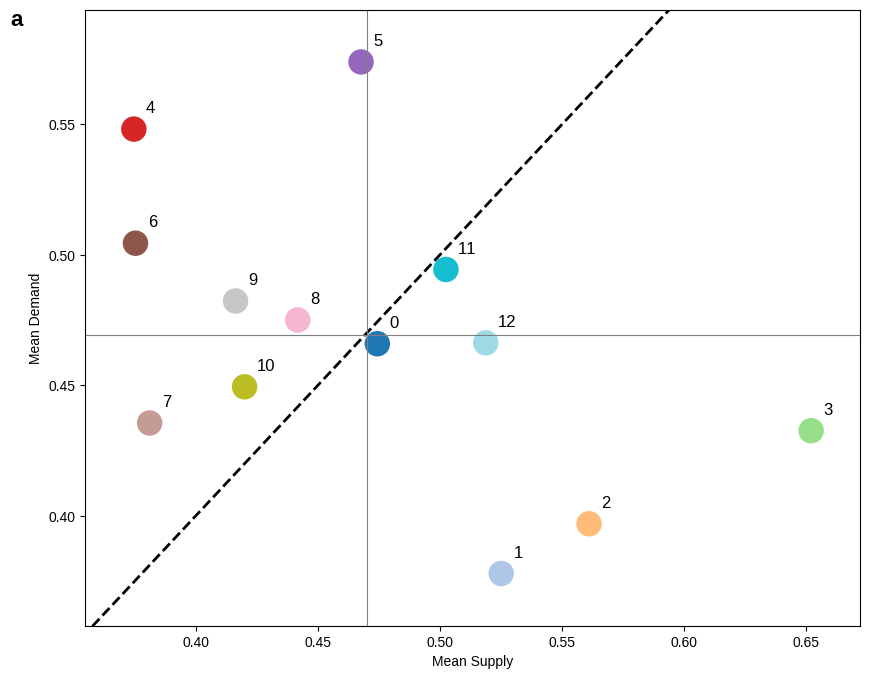

In [24]:
# Ensure cluster_means DataFrame is available and contains the necessary columns
if 'cluster_means' in locals() and not cluster_means.empty and 'mean_supply' in cluster_means.columns and 'mean_demand' in cluster_means.columns and 'HDBSCAN_cluster' in cluster_means.columns:

    # Set sans-serif font for the figure
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'Liberation Sans', 'DejaVu Sans'] # Example sans-serif fonts

    # Import matplotlib.cm
    import matplotlib.cm as cm


    # Create the scatter plot
    fig, ax = plt.subplots(figsize=(10, 8)) # Create figure and axes and assign to fig, ax

    # Determine the color for each point based on the condition
    # Use a list comprehension or apply function
    # colors = ['red' if row['mean_demand'] > row['mean_supply'] else 'blue' for index, row in cluster_means.iterrows()] # Commented out conditional coloring

    # Plot the points, colored by HDBSCAN_cluster for distinctive colors
    # Use a categorical colormap like 'tab10' or 'tab20'
    # Ensure cluster labels are integers for proper colormap mapping
    cluster_means['HDBSCAN_cluster_int'] = cluster_means['HDBSCAN_cluster'].astype(int)
    n_unique_clusters = cluster_means['HDBSCAN_cluster_int'].nunique()
    # Changed colormap to 'tab20c' for potentially more distinctive colors
    cmap = cm.get_cmap('tab20', n_unique_clusters) # Use tab20 or tab10 based on number of clusters

    scatter = ax.scatter(
        cluster_means['mean_supply'],
        cluster_means['mean_demand'],
        c=cluster_means['HDBSCAN_cluster_int'], # Color by integer cluster labels
        cmap=cmap, # Use the categorical colormap
        s=300 # s is marker size
        # Removed legend=False as it's not a valid argument for ax.scatter
    ) # Use ax.scatter and the new 'colors' list


    # Add labels and title
    ax.set_xlabel('Mean Supply') # Use ax.set_xlabel
    ax.set_ylabel('Mean Demand') # Use ax.set_ylabel
    # ax.set_title('HDBSCAN Clusters based on Mean Supply and Mean Demand') # Use ax.set_title

    # Remove the colorbar (legend)
    # plt.colorbar(scatter) # Comment out or remove this line
    # cbar.set_label('HDBSCAN Cluster') # Comment out or remove this line

    # Optional: Add text labels for each cluster number on the plot
    for i, row in cluster_means.iterrows():
        # Format the cluster label as an integer (float with no decimal points)
        # Adjust the text position to move it away from the point
        # Added a small offset to the x and y coordinates
        offset_x = 0.005 # Adjust this value as needed
        offset_y = 0.005 # Adjust this value as needed
        ax.text(row['mean_supply'] + offset_x, row['mean_demand'] + offset_y, f"{row['HDBSCAN_cluster']:.0f}", fontsize=12, ha='left', va='bottom') # Use ax.text

    # Add a diagonal line from the origin (0,0) across the plot
    # Get the current axes limits to determine how far to extend the line
    x_min_ax, x_max_ax = ax.get_xlim()
    y_min_ax, y_max_ax = ax.get_ylim()

    # Determine the maximum value among the axes limits to ensure the line extends across the plot
    max_limit = max(x_max_ax, y_max_ax)

    # Plot a line from (0,0) to (max_limit, max_limit)
    ax.plot([0, max_limit], [0, max_limit], color='black', linestyle='--', linewidth=2) # Plot from (0,0)

    # Add thin vertical and horizontal lines through the mean of mean_supply and mean_demand
    mean_supply_all_clusters = cluster_means['mean_supply'].mean()
    mean_demand_all_clusters = cluster_means['mean_demand'].mean()

    ax.axvline(mean_supply_all_clusters, color='gray', linestyle='-', linewidth=0.8) # Vertical line
    ax.axhline(mean_demand_all_clusters, color='gray', linestyle='-', linewidth=0.8) # Horizontal line

    ax.text(0.05, 0.88, 'a', transform=fig.transFigure, fontsize=16, fontweight='bold', va='top', ha='left') # y axis is the second parameter



    # Adjust x and y axes limits to show only the range of cluster values
    # Get the min and max values from mean_supply and mean_demand
    min_supply = cluster_means['mean_supply'].min()
    max_supply = cluster_means['mean_supply'].max()
    min_demand = cluster_means['mean_demand'].min()
    max_demand = cluster_means['mean_demand'].max()

    # Add a small buffer to the limits for better visualization
    buffer = 0.02 # Adjust buffer as needed
    ax.set_xlim(min_supply - buffer, max_supply + buffer)
    ax.set_ylim(min_demand - buffer, max_demand + buffer)


    # Remove gridlines
    ax.grid(False) # Changed from True to False


    plt.show()

    output_png_path = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Fig_2_a.pdf' # Define output path
    fig.savefig(output_png_path, bbox_inches='tight', dpi=600) # Specify dpi for high resolution

else:
    print("Error: cluster_means DataFrame not found, is empty, or missing required columns ('mean_supply', 'mean_demand', 'HDBSCAN_cluster'). Cannot create scatter plot.")

In [19]:
cluster_means

NameError: name 'cluster_means' is not defined

In [ ]:
# Ensure cluster_means DataFrame is available and contains the necessary columns
if 'cluster_means' in locals() and not cluster_means.empty:

    # Select only the supply and demand columns for categorization
    # Exclude 'HDBSCAN_cluster', 'mean_supply', and 'mean_demand'
    cols_to_categorize = [col for col in all_supply_demand_columns if col in cluster_means.columns]

    if not cols_to_categorize:
        print("Error: No supply or demand columns found in cluster_means to categorize.")
    else:
        # Create a new DataFrame to store the categorized results
        categorized_cluster_summary = pd.DataFrame(index=cluster_means.index)

        # Iterate through each column to categorize
        for col in cols_to_categorize:
            # Define thresholds for 'low', 'medium', and 'high'
            # Using quantiles to divide into roughly equal groups
            low_threshold = cluster_means[col].quantile(0.33)
            high_threshold = cluster_means[col].quantile(0.67)

            # Apply categorization based on thresholds
            categorized_cluster_summary[col] = cluster_means[col].apply(
                lambda x: 'low' if x <= low_threshold else ('medium' if x <= high_threshold else 'high')
            )

        # Optionally, add back the cluster labels and mean supply/demand if needed for context
        if 'HDBSCAN_cluster' in cluster_means.columns:
            categorized_cluster_summary['HDBSCAN_cluster'] = cluster_means['HDBSCAN_cluster']
        if 'mean_supply' in cluster_means.columns:
             categorized_cluster_summary['mean_supply'] = cluster_means['mean_supply']
        if 'mean_demand' in cluster_means.columns:
             categorized_cluster_summary['mean_demand'] = cluster_means['mean_demand']

        print("Categorized cluster summary table:")
        display(categorized_cluster_summary.head())
        # Display the entire table
        display(categorized_cluster_summary)


else:
    print("Error: cluster_means DataFrame not found or is empty. Cannot categorize values.")

In [ ]:
categorized_cluster_summary.to_csv('categorized_cluster_summary.csv')

/tmp/ipython-input-4198354706.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(color_map, n_unique_clusters)


Plot saved as '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/Fig_2_a.pdf'


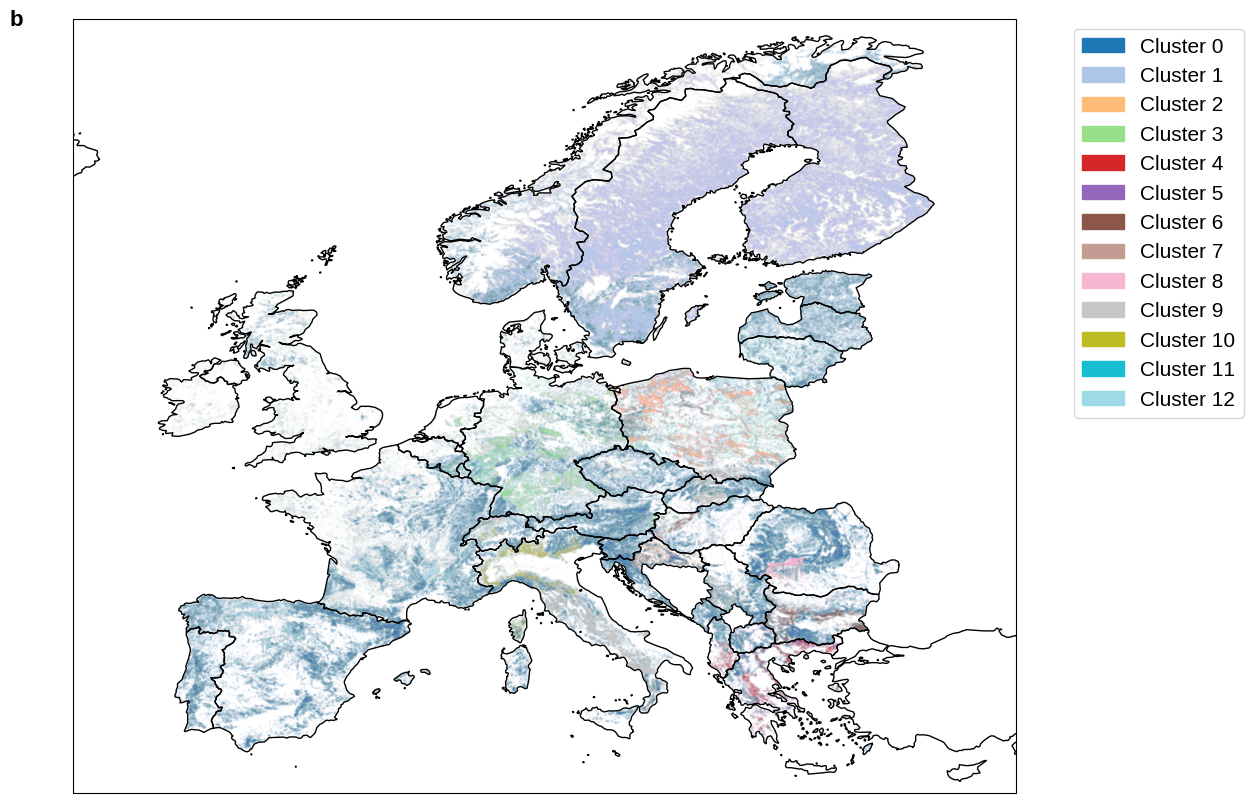

In [28]:
# Use the new function to plot the HDBSCAN clusters on the map

column = 'HDBSCAN_cluster' # Column containing the cluster labels

gpkg_path_2016 = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/NUTS_RG_10M_2016_4326.gpkg'
# Use merged_df_cleaned which contains the HDBSCAN_cluster column and WGS84 coordinates
data_to_plot = merged_df_cleaned

# Use the correct coordinate columns from merged_df_cleaned
lon_col = 'lon_WGS84_clustering'
lat_col = 'lat_WGS84_clustering'

markersize=0.00005 # Adjust marker size as needed
color_map = 'tab20' # Use a distinctive categorical colormap
title = ''# 'Forest clusters based on FES supply and demand patterns'
NUTS_level = 0 # Plot country boundaries

# Call the new plotting function and specify a much larger legend font size
# The function returns the figure and axes objects
fig, ax = plot_clusters_on_map(gpkg_path_2016, data_to_plot, lon_col, lat_col, column, markersize, color_map, title, NUTS_level, legend_fontsize=15) # Set a much larger font size, e.g., 20

# Define the output path for the PNG file
output_path = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/FES_clusters_map.pdf'

# Check if the figure object was successfully returned
if fig is not None:
    # Add 'b' to the top-left corner of the figure
    # Use fig.transFigure for positioning relative to the figure, not the axes
    # Adjust x and y coordinates to move it further into the top-left margin
    ax.text(-0.04, 0.83, 'b', transform=fig.transFigure, fontsize=16, fontweight='bold', va='top', ha='left') # Adjusted y-coordinate to 0.88


    # Save the figure as a high-resolution PNG
    plt.savefig(output_path, bbox_inches='tight', dpi=600) # Specify dpi for high resolution

    print(f"Plot saved as '{output_png_path}'")

    # Show the plot
    plt.show()
else:
    print("Plot creation failed. Cannot save or display.")

In [ ]:
(len(merged_df_cleaned[merged_df_cleaned['HDBSCAN_cluster'] == 8]) / len(merged_df_cleaned)) *100

0.5542735357814437

Number of data points in Cluster 12: 89563


/tmp/ipython-input-330603532.py:93: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(color_map, n_unique_clusters)


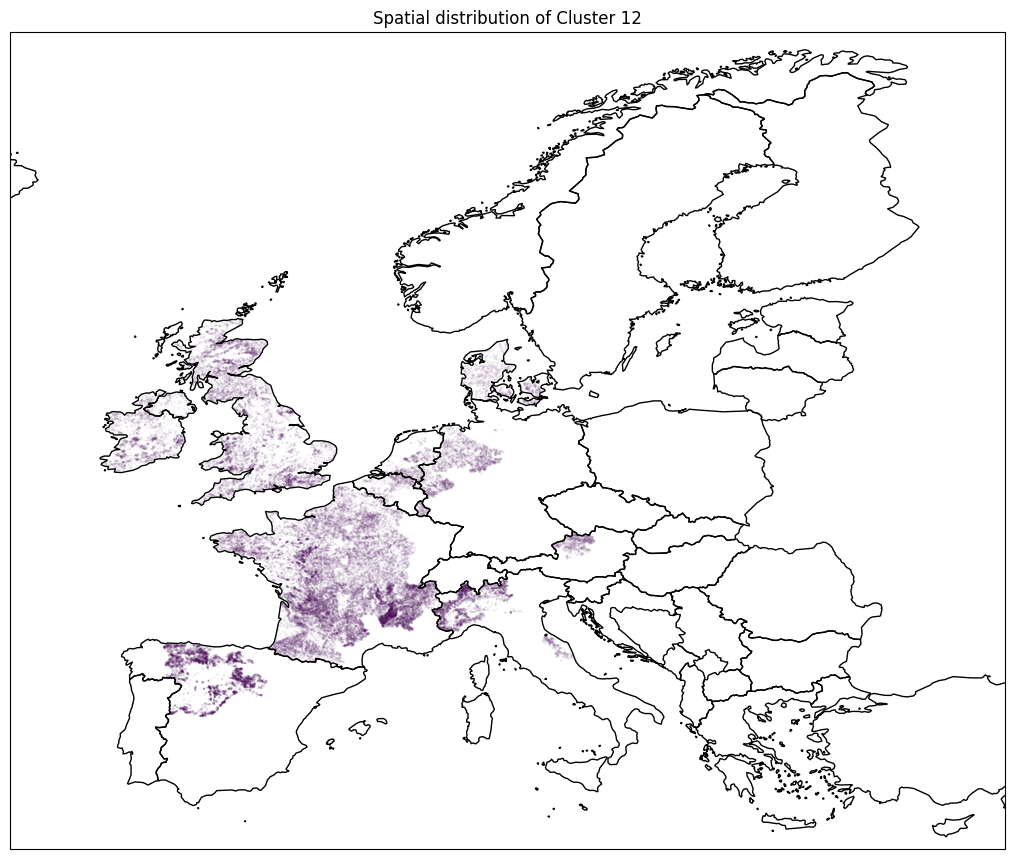

In [ ]:
CLUSTER = 12

# Filter the merged_df_cleaned DataFrame for rows belonging to Cluster 0
cluster_0_data = merged_df_cleaned[merged_df_cleaned['HDBSCAN_cluster'] == CLUSTER].copy()

print(f"Number of data points in Cluster {CLUSTER}: {len(cluster_0_data)}")

# Ensure the filtered data is not empty before plotting
if not cluster_0_data.empty:
    # Use the plot_clusters_on_map function to visualize Cluster 0
    # Since we are plotting a single cluster, we can color all points the same
    # Or, we can still use the cluster_col and colormap if the function handles single cluster coloring
    # Let's plot them in a single color for clarity of showing just one cluster
    column_to_color = None # Don't color by cluster, use a single color
    single_color = 'red' # Define a color for the points

    # The plot_clusters_on_map function expects a column for coloring.
    # Let's call the function with the 'HDBSCAN_cluster' column and a colormap.
    # The colormap will likely only use one color since there's only one cluster label.
    column = 'HDBSCAN_cluster' # Still use the cluster column for the function
    color_map = 'viridis' # Use a colormap, though only one color will be used

    gpkg_path_2016 = '/content/drive/MyDrive/Colab Notebooks/SINCERE_S_D/NUTS_RG_10M_2016_4326.gpkg'
    lon_col = 'lon_WGS84_clustering'
    lat_col = 'lat_WGS84_clustering'
    markersize=0.0005 # Adjust marker size if needed for single points
    title = f'Spatial distribution of Cluster {CLUSTER}'
    NUTS_level = 0 # Plot country boundaries

    # Call the plotting function and specify a much larger legend font size
    # The function returns the figure and axes objects
    # plot_clusters_on_map(gpkg_path_2016, cluster_0_data, lon_col, lat_col, column, markersize, color_map, title, NUTS_level)
    fig, ax = plot_clusters_on_map(gpkg_path_2016, cluster_0_data, lon_col, lat_col, column, markersize, color_map, title, NUTS_level)

    # Check if the figure object was successfully returned
    if fig is not None:
        # Remove the legend from the axes
        if ax.get_legend() is not None:
            ax.get_legend().remove()

        # Show the plot
        plt.show()


else:
    print("No data points found for Cluster 0.")

# How to increase FES supply in specific areas

In [ ]:
merged_df_cleaned = pd.read_csv('Final_output.csv')
merged_df_cleaned = merged_df_cleaned.drop(columns=['Unnamed: 0'])

In [ ]:
# The idea is to group all clusters where some PES could be developed (i.e. suply of some FES is lower than demand - e.g. for habitat protection)
# Then see which forests are similar to one another within these clusters jointly - clustering within this group of clusters based on bio-physical characteristics
# Then find 'similar' in bio-physical sense forests in other clusters which have greater supply of targeted FES
# this would should you want you perhaps need to change in management to increse the supply
# Technically, this is difficult to implement
# I've tried different procedures, they're just too demanding. I've tried DBSCAN and HDBSCAN on full and partial data, optimize for better memory usage,
# tried to change the number of variables to be uses in the sampling, worked with samples of data, on pre-calculated gower distance matrix... etc.. No, it's just too large
# In the end, went for Mini Batch K-Means

In [ ]:
# Here leave just the bio-physical variables

dummy_categorical_independent_variables = [
    'bearing_cap',
   #  'asites_forest',
   #  'bsites_forest',
   #  'csites_forest',
    'Pathfinder_even_aged',
    'Pathfinder_primary_forest'
]

categorical_complex_independent_variables = [
   #  'countries',
    'dominant',
    'Corine_2018',
    'CLC_Nomenclature',
   #  'CLC_Forest',
   #  'IIASA_management'
]

interval_independent_variables_list = [
    'lon', 'lat', 'abelow_biom', 'abelow_carbon',
    'above_biomass', 'above_carbon', # 'accessibility',
    'density' , 'et', 'gsv', 'increment',
    'rainfall', 'slope', #  'access2015',
    'ruggedness', #  'ownership',
    'abies', 'alnus', 'betula',
    'broadleaves', 'carpinus', 'castanea', 'conifers',
    'eucalyptus', 'fagus', 'fraxinus', 'larix',
    'picea', 'pines', 'pinuspinaster',
    'pinussylvestris', 'populus', 'pseudotsuga',
    'quercusmisc', 'quercusrobur', 'robinia',
    'Pathfinder_age_class', 'Pathfinder_disturbance_size',
    'Pathfinder_disturbance_freq', 'Pathfinder_forest_mask'# ,
    # 'Pathfinder_management'

]



In [ ]:
# Define the services of interest
# Define the services of interest
supply_columns_to_focus_on = [
     'supply_erosion_control', 'supply_air_quality_regulation','supply_CC_mitigation', 'supply_habitat_provision', 'supply_cultural_emotional_spiritual_values', 'supply_nature_based_tourism'
]
# Sum them
merged_df_cleaned['sum_supply_targeted_FES'] = merged_df_cleaned[supply_columns_to_focus_on[0]] + merged_df_cleaned[supply_columns_to_focus_on[1]] + merged_df_cleaned[supply_columns_to_focus_on[2]] + + merged_df_cleaned[supply_columns_to_focus_on[3]] + + merged_df_cleaned[supply_columns_to_focus_on[4]] + merged_df_cleaned[supply_columns_to_focus_on[5]]


# Calculate the values at 1/3 and 2/3 of the distribution for 'sum_supply_targeted_FES'
# Using quantiles 0.333 and 0.667 for approximately 1/3 and 2/3
lower_third_value = ((merged_df_cleaned['sum_supply_targeted_FES'].max() - merged_df_cleaned['sum_supply_targeted_FES'].min()) / 3)+merged_df_cleaned['sum_supply_targeted_FES'].min()
upper_third_value = ((((merged_df_cleaned['sum_supply_targeted_FES'].max() - merged_df_cleaned['sum_supply_targeted_FES'].min()) / 3))*2)+merged_df_cleaned['sum_supply_targeted_FES'].min()

print(f"Value at 1/3 of the distribution (approx): {lower_third_value:.5f}")
print(f"Value at 2/3 of the distribution (approx): {upper_third_value:.5f}")

# Separate the forests that have these values lower
merged_df_cleaned_lower_targeted_FES = merged_df_cleaned[merged_df_cleaned['sum_supply_targeted_FES'] < lower_third_value]
# Separate the forests that have these values higher
merged_df_cleaned_higher_targeted_FES = merged_df_cleaned[merged_df_cleaned['sum_supply_targeted_FES'] > upper_third_value]

Value at 1/3 of the distribution (approx): 2.05392
Value at 2/3 of the distribution (approx): 3.99147


In [ ]:
# Best clustering for both lower and higher tercile is 11 clusters!

In [ ]:
# Repeat this separately for merged_df_cleaned_lower_targeted_FES and merged_df_cleaned_higher_targeted_FES

# Make, one hot encoding, estimate missing data (if any), scale the data and then assign cluster affiliation to scaled data
data_df_encoded, list_of_one_hot_encoded_columns = one_hot_encoding(merged_df_cleaned_lower_targeted_FES, categorical_complex_independent_variables)
clustering_data_imputed = get_missing_data(data_df_encoded, interval_independent_variables_list, dummy_categorical_independent_variables, list_of_one_hot_encoded_columns)
clustering_data_scaled = scale_interval_variables(clustering_data_imputed, interval_independent_variables_list)

Performing one-hot encoding on the following columns:
['countries', 'dominant', 'Corine_2018', 'CLC_Nomenclature', 'CLC_Forest', 'IIASA_management']

One-hot encoded data head (with 0s and 1s):


countries_2.0  countries_3.0  countries_4.0  countries_6.0  \
2115              0              0              0              0   
2169              0              0              0              0   
2270              0              0              0              0   
2271              0              0              0              0   
2280              0              0              0              0   

      countries_7.0  countries_8.0  countries_9.0  countries_10.0  \
2115              0              0              0               0   
2169              0              0              0               0   
2270              0              0              0               0   
2271              0              0              0               0   
2280              0              0              0               0   

      countries_11.0  countries_13.0  ...  Corine_2018_44.0  \
2115               0               0  ...                 0   
2169               0               0  ...                 0   
2270               0               0  ...                 0   
2271               0               0  ...                 0   
2280               0               0  ...                 0   

      CLC_Nomenclature_Artificial Surfaces  \
2115                                     0   
2169                                     0   
2270                                     0   
2271                                     0   
2280                                     0   

      CLC_Nomenclature_Forest and semi natural areas  \
2115                                               1   
2169                                               1   
2270                                               1   
2271                                               1   
2280                                               0   

      CLC_Nomenclature_Water bodies  CLC_Nomenclature_Wetlands  \
2115                              0                          0   
2169                              0                          0   
2270                              0                          0   
2271                              0                          0   
2280                              0                          1   

      CLC_Forest_Coniferous forest  CLC_Forest_Mixed forest  \
2115                             0                        0   
2169                             0                        0   
2270                             0                        0   
2271                             0                        0   
2280                             0                        0   

      IIASA_management_20.0  IIASA_management_31.0  IIASA_management_53.0  
2115                      0                      0                      0  
2169                      0                      0                      0  
2270                      1                      0                      0  
2271                      1                      0                      0  
2280                      1                      0                      0  

[5 rows x 93 columns]


Merged DataFrame after one-hot encoding head:

Merged DataFrame after one-hot encoding shape: (186467, 180)
Clustering data head before handling missing values:


lon           lat  abelow_biom  abelow_carbon  above_biomass  \
2115 5114031.00000 5289235.00000   7210.00000     3465.00000     6100.00000   
2169 5114031.00000 5288235.00000   5551.00000     2668.00000     4697.00000   
2270 5098031.00000 5286235.00000   5695.00000     2737.00000     4819.00000   
2271 5099031.00000 5286235.00000   6416.00000     3098.00000     5429.00000   
2280 5112031.00000 5286235.00000   6705.00000     3222.00000     5673.00000   

      above_carbon  accessibility   density        et      gsv  ...  \
2115    2904.00000      416.00000   0.00000 453.00000 93.00000  ...   
2169    2236.00000      434.00000   0.00000 444.00000 26.00000  ...   
2270    2294.00000      477.00000 446.00000 476.00000 34.00000  ...   
2271    2601.00000      443.00000 267.00000 480.00000 82.00000  ...   
2280    2700.00000      442.00000   0.00000 439.00000 32.00000  ...   

      Corine_2018_44.0  CLC_Nomenclature_Artificial Surfaces  \
2115                 0                                     0   
2169                 0                                     0   
2270                 0                                     0   
2271                 0                                     0   
2280                 0                                     0   

      CLC_Nomenclature_Forest and semi natural areas  \
2115                                               1   
2169                                               1   
2270                                               1   
2271                                               1   
2280                                               0   

      CLC_Nomenclature_Water bodies  CLC_Nomenclature_Wetlands  \
2115                              0                          0   
2169                              0                          0   
2270                              0                          0   
2271                              0                          0   
2280                              0                          1   

      CLC_Forest_Coniferous forest  CLC_Forest_Mixed forest  \
2115                             0                        0   
2169                             0                        0   
2270                             0                        0   
2271                             0                        0   
2280                             0                        0   

      IIASA_management_20.0  IIASA_management_31.0  IIASA_management_53.0  
2115                      0                      0                      0  
2169                      0                      0                      0  
2270                      1                      0                      0  
2271                      1                      0                      0  
2280                      1                      0                      0  

[5 rows x 140 columns]


Clustering data shape before handling missing values: (186467, 140)

Clustering data head after imputation:

Clustering data shape after imputation: (186467, 140)
Scaling the following interval variables:
['lon', 'lat', 'abelow_biom', 'abelow_carbon', 'above_biomass', 'above_carbon', 'accessibility', 'density', 'et', 'gsv', 'increment', 'rainfall', 'slope', 'access2015', 'ruggedness', 'ownership', 'abies', 'alnus', 'betula', 'broadleaves', 'carpinus', 'castanea', 'conifers', 'eucalyptus', 'fagus', 'fraxinus', 'larix', 'picea', 'pines', 'pinuspinaster', 'pinussylvestris', 'populus', 'pseudotsuga', 'quercusmisc', 'quercusrobur', 'robinia', 'Pathfinder_age_class', 'Pathfinder_disturbance_size', 'Pathfinder_disturbance_freq', 'Pathfinder_forest_mask', 'Pathfinder_management']

Clustering data head after scaling interval variables:

Clustering data shape after scaling interval variables: (186467, 140)


In [ ]:
# Find the best number of clusters

total_start = time.time()


# Ensure clustering_data_scaled is available and not empty
if 'clustering_data_scaled' not in locals() or clustering_data_scaled.empty:
    print("Error: clustering_data_scaled DataFrame not found or is empty. Cannot perform Mini-Batch K-Means clustering and evaluate silhouette score.")
else:
    print(f"Performing Mini-Batch K-Means clustering on clustering_data_scaled with shape: {clustering_data_scaled.shape}")

    # Define the range of cluster numbers to test
    # Use multiprocessing.cpu_count() to get the number of available CPUs
    num_cpus = multiprocessing.cpu_count()
    cluster_range = range(2, min(16, clustering_data_scaled.shape[0] + 1)) # From 2 up to min(15 or num_data_points), inclusive

    # Drop the 'HDBSCAN_cluster' column if it exists, as we are clustering the features
    data_for_kmeans = clustering_data_scaled.drop(columns=['HDBSCAN_cluster'], errors='ignore').copy()

    print(f"\nEvaluating Mini-Batch K-Means for different numbers of clusters using {num_cpus} CPU(s):")

    # Function to perform clustering and calculate silhouette score for a single n_clusters
    def evaluate_kmeans(n_clusters, data):
        print(f"  Testing with {n_clusters} clusters (on process {os.getpid()})...") # Added process ID for clarity
        try:
            # Check if the number of clusters is valid given the data size
            if n_clusters > data.shape[0]:
                 print(f"    Warning: n_clusters ({n_clusters}) is greater than the number of data points ({data.shape[0]}). Skipping this cluster number.")
                 return n_clusters, np.nan # Return NaN if clustering is not possible


            # Initialize and fit the Mini-Batch K-Means model
            minibatch_kmeans_model = MiniBatchKMeans(
                n_clusters=n_clusters,
                random_state=42, # for reproducibility
                batch_size=1024, # Example batch size. Adjust based on memory and performance.
                n_init=10 # Run with 10 different seeds
            )

            # Fit the model to the data and get the cluster labels
            minibatch_kmeans_labels = minibatch_kmeans_model.fit_predict(data.values)

            # Calculate the Silhouette score
            # Need at least 2 samples and at least 2 clusters for Silhouette score
            if len(np.unique(minibatch_kmeans_labels)) > 1 and len(minibatch_kmeans_labels) >= 2:
                score = silhouette_score(data, minibatch_kmeans_labels)
                print(f"    Silhouette Score for {n_clusters} clusters: {score:.4f} (process {os.getpid()})") # Added process ID
                return n_clusters, score
            else:
                 print("    Not enough clusters or samples to calculate Silhouette score.")
                 return n_clusters, np.nan # Store NaN if score cannot be calculated


        except Exception as e:
            print(f"  An error occurred during clustering or score calculation for {n_clusters} clusters (process {os.getpid()}): {e}") # Added process ID
            return n_clusters, np.nan # Store NaN on error

    # Use multiprocessing.Pool to parallelize the evaluation
    # Limit the number of processes to the number of available CPUs
    pool = multiprocessing.Pool(processes=num_cpus)

    # Map the evaluate_kmeans function to the cluster_range, passing the data
    # Use starmap to pass multiple arguments (n_clusters and data)
    # data needs to be passed to each process, so it's better to define evaluate_kmeans inside the if block
    # or pass data as an argument. Passing data is safer for multiprocessing.
    results = pool.starmap(evaluate_kmeans, [(n, data_for_kmeans) for n in cluster_range])

    # Close the pool and wait for all processes to finish
    pool.close()
    pool.join()

    # Process the results
    silhouette_scores = dict(results)

    # Convert the silhouette scores dictionary to a pandas Series for easier analysis
    silhouette_scores_series = pd.Series(silhouette_scores)

    print("\nSilhouette Scores for each number of clusters:")
    display(silhouette_scores_series)

    # Find the number of clusters with the highest silhouette score (excluding NaN values)
    # Drop NaN values before finding the index of the maximum
    valid_scores = silhouette_scores_series.dropna()

    if not valid_scores.empty:
        optimal_n_clusters_kmeans = valid_scores.idxmax()
        max_silhouette = valid_scores.max()
        print(f"\nOptimal number of clusters for Mini-Batch K-Means (highest silhouette score): {optimal_n_clusters_kmeans}")
        print(f"Maximum Silhouette Score: {max_silhouette:.4f}")
    else:
        print("\nCould not determine optimal number of clusters as all silhouette score calculations failed or resulted in NaN.")
        optimal_n_clusters_kmeans = None # Set to None if optimal cannot be determined

# The optimal_n_clusters_kmeans is now determined (or is None)

total_end = time.time()
total_elapsed_seconds = total_end - total_start
total_elapsed_time = format_timespan(total_elapsed_seconds)
send_push_final(total_elapsed_time, optimal_n_clusters_kmeans)

In [ ]:
optimal_n_clusters_kmeans = 11

In [ ]:
# Here do it again based on most fitting number of clusters

# Ensure clustering_data_scaled is available and not empty
if 'clustering_data_scaled' not in locals() or clustering_data_scaled.empty:
    print("Error: clustering_data_scaled DataFrame not found or is empty. Cannot perform Mini-Batch K-Means.")
else:
    print(f"Performing Mini-Batch K-Means clustering on clustering_data_scaled with shape: {clustering_data_scaled.shape}")

    # Define the number of clusters (n_clusters) for Mini-Batch K-Means
    # You may need to tune this value based on your data and desired granularity
    n_clusters_kmeans = optimal_n_clusters_kmeans #

    # Ensure n_clusters is less than or equal to the number of data points
    if n_clusters_kmeans > clustering_data_scaled.shape[0]:
        print(f"Warning: n_clusters ({n_clusters_kmeans}) is greater than the number of data points ({clustering_data_scaled.shape[0]}). Adjusting n_clusters.")
        n_clusters_kmeans = max(1, clustering_data_scaled.shape[0]) # Adjust to max possible

    if n_clusters_kmeans < 1:
         print("Error: Adjusted n_clusters is less than 1. Cannot perform clustering.")
    else:
        print(f"Using n_clusters={n_clusters_kmeans} for Mini-Batch K-Means.")

        # Drop the 'HDBSCAN_cluster' column if it exists, as we are clustering the features
        data_for_kmeans = clustering_data_scaled.drop(columns=['HDBSCAN_cluster'], errors='ignore').copy()

        try:
            # Initialize and fit the Mini-Batch K-Means model
            # random_state for reproducibility
            # batch_size is the size of the mini-batches
            # n_init is the number of times the K-means algorithm is run with different centroid seeds
            minibatch_kmeans_model = MiniBatchKMeans(
                n_clusters=n_clusters_kmeans,
                random_state=42,
                batch_size=1024, # Example batch size. Adjust based on memory and performance.
                n_init=10 # Run with 10 different seeds
            )

            # Fit the model to the data
            # Use .values to pass a numpy array to the clustering algorithm
            minibatch_kmeans_model.fit(data_for_kmeans.values)

            # Get the cluster labels
            minibatch_kmeans_labels = minibatch_kmeans_model.labels_

            # Add the cluster labels back to the original clustering_data_scaled DataFrame
            # Ensure the index aligns correctly
            clustering_data_scaled['MiniBatch_KMeans_Cluster'] = minibatch_kmeans_labels

            print("\nMini-Batch K-Means clustering completed.")
            print(f"Number of clusters found: {n_clusters_kmeans}")
            print("MiniBatch_KMeans_Cluster labels added to clustering_data_scaled.")
            display(clustering_data_scaled[['MiniBatch_KMeans_Cluster']].head())

            # You can now use clustering_data_scaled with the 'MiniBatch_KMeans_Cluster' column for further analysis.

        except Exception as e:
            print(f"An error occurred during Mini-Batch K-Means clustering: {e}")

# The Mini-Batch K-Means cluster labels are now in clustering_data_scaled['MiniBatch_KMeans_Cluster']

Performing Mini-Batch K-Means clustering on clustering_data_scaled with shape: (186467, 140)
Using n_clusters=11 for Mini-Batch K-Means.

Mini-Batch K-Means clustering completed.
Number of clusters found: 11
MiniBatch_KMeans_Cluster labels added to clustering_data_scaled.


MiniBatch_KMeans_Cluster
2115                         4
2169                         4
2270                         4
2271                         4
2280                        10

In [ ]:
clustering_data_scaled_lower = clustering_data_scaled

In [ ]:
plt.hist(clustering_data_scaled['MiniBatch_KMeans_Cluster'])
plt.show()

In [ ]:
# Now repeated for merged_df_cleaned_higher_targeted_FES

# Make, one hot encoding, estimate missing data (if any), scale the data and then assign cluster affiliation to scaled data
data_df_encoded, list_of_one_hot_encoded_columns = one_hot_encoding(merged_df_cleaned_higher_targeted_FES, categorical_complex_independent_variables)
clustering_data_imputed = get_missing_data(data_df_encoded, interval_independent_variables_list, dummy_categorical_independent_variables, list_of_one_hot_encoded_columns)
clustering_data_scaled = scale_interval_variables(clustering_data_imputed, interval_independent_variables_list)

# Here do it again based on most fitting number of clusters

# Ensure clustering_data_scaled is available and not empty
if 'clustering_data_scaled' not in locals() or clustering_data_scaled.empty:
    print("Error: clustering_data_scaled DataFrame not found or is empty. Cannot perform Mini-Batch K-Means.")
else:
    print(f"Performing Mini-Batch K-Means clustering on clustering_data_scaled with shape: {clustering_data_scaled.shape}")

    # Define the number of clusters (n_clusters) for Mini-Batch K-Means
    # You may need to tune this value based on your data and desired granularity
    n_clusters_kmeans = optimal_n_clusters_kmeans #

    # Ensure n_clusters is less than or equal to the number of data points
    if n_clusters_kmeans > clustering_data_scaled.shape[0]:
        print(f"Warning: n_clusters ({n_clusters_kmeans}) is greater than the number of data points ({clustering_data_scaled.shape[0]}). Adjusting n_clusters.")
        n_clusters_kmeans = max(1, clustering_data_scaled.shape[0]) # Adjust to max possible

    if n_clusters_kmeans < 1:
         print("Error: Adjusted n_clusters is less than 1. Cannot perform clustering.")
    else:
        print(f"Using n_clusters={n_clusters_kmeans} for Mini-Batch K-Means.")

        # Drop the 'HDBSCAN_cluster' column if it exists, as we are clustering the features
        data_for_kmeans = clustering_data_scaled.drop(columns=['HDBSCAN_cluster'], errors='ignore').copy()

        try:
            # Initialize and fit the Mini-Batch K-Means model
            # random_state for reproducibility
            # batch_size is the size of the mini-batches
            # n_init is the number of times the K-means algorithm is run with different centroid seeds
            minibatch_kmeans_model = MiniBatchKMeans(
                n_clusters=n_clusters_kmeans,
                random_state=42,
                batch_size=1024, # Example batch size. Adjust based on memory and performance.
                n_init=10 # Run with 10 different seeds
            )

            # Fit the model to the data
            # Use .values to pass a numpy array to the clustering algorithm
            minibatch_kmeans_model.fit(data_for_kmeans.values)

            # Get the cluster labels
            minibatch_kmeans_labels = minibatch_kmeans_model.labels_

            # Add the cluster labels back to the original clustering_data_scaled DataFrame
            # Ensure the index aligns correctly
            clustering_data_scaled['MiniBatch_KMeans_Cluster'] = minibatch_kmeans_labels

            print("\nMini-Batch K-Means clustering completed.")
            print(f"Number of clusters found: {n_clusters_kmeans}")
            print("MiniBatch_KMeans_Cluster labels added to clustering_data_scaled.")
            display(clustering_data_scaled[['MiniBatch_KMeans_Cluster']].head())

            # You can now use clustering_data_scaled with the 'MiniBatch_KMeans_Cluster' column for further analysis.

        except Exception as e:
            print(f"An error occurred during Mini-Batch K-Means clustering: {e}")

# The Mini-Batch K-Means cluster labels are now in clustering_data_scaled['MiniBatch_KMeans_Cluster']

Performing one-hot encoding on the following columns:
['countries', 'dominant', 'Corine_2018', 'CLC_Nomenclature', 'CLC_Forest', 'IIASA_management']

One-hot encoded data head (with 0s and 1s):


countries_2.0  countries_3.0  countries_4.0  countries_6.0  \
367011              0              0              0              0   
369149              0              0              0              0   
370441              0              0              0              0   
370847              0              0              0              0   
371640              0              0              0              0   

        countries_7.0  countries_8.0  countries_9.0  countries_11.0  \
367011              0              0              0               0   
369149              0              0              0               0   
370441              0              0              0               0   
370847              0              0              0               0   
371640              0              0              0               0   

        countries_12.0  countries_13.0  ...  Corine_2018_41.0  \
367011               0               1  ...                 0   
369149               0               1  ...                 0   
370441               0               1  ...                 0   
370847               0               1  ...                 0   
371640               0               1  ...                 0   

        CLC_Nomenclature_Artificial Surfaces  \
367011                                     0   
369149                                     0   
370441                                     0   
370847                                     0   
371640                                     0   

        CLC_Nomenclature_Forest and semi natural areas  \
367011                                               1   
369149                                               1   
370441                                               1   
370847                                               1   
371640                                               1   

        CLC_Nomenclature_Water bodies  CLC_Nomenclature_Wetlands  \
367011                              0                          0   
369149                              0                          0   
370441                              0                          0   
370847                              0                          0   
371640                              0                          0   

        CLC_Forest_Coniferous forest  CLC_Forest_Mixed forest  \
367011                             0                        1   
369149                             0                        1   
370441                             1                        0   
370847                             1                        0   
371640                             1                        0   

        IIASA_management_20.0  IIASA_management_31.0  IIASA_management_53.0  
367011                      0                      1                      0  
369149                      0                      1                      0  
370441                      0                      1                      0  
370847                      0                      1                      0  
371640                      0                      1                      0  

[5 rows x 73 columns]


Merged DataFrame after one-hot encoding head:

Merged DataFrame after one-hot encoding shape: (51471, 160)
Clustering data head before handling missing values:


lon           lat  abelow_biom  abelow_carbon  above_biomass  \
367011 4940031.00000 4243235.00000  16078.00000     8253.00000    14784.00000   
369149 4973031.00000 4238235.00000  17924.00000     9212.00000    16464.00000   
370441 4973031.00000 4235235.00000  18290.00000     9401.00000    16800.00000   
370847 4973031.00000 4234235.00000  18290.00000     9401.00000    16800.00000   
371640 4978031.00000 4232235.00000  17558.00000     9024.00000    16128.00000   

        above_carbon  accessibility  density        et       gsv  ...  \
367011    7399.00000       86.00000  0.00000 653.00000 180.00000  ...   
369149    8249.00000       83.00000  0.00000 674.00000 136.00000  ...   
370441    8418.00000       30.00000 98.00000 689.00000 163.00000  ...   
370847    8418.00000       30.00000  0.00000 701.00000 166.00000  ...   
371640    8081.00000       49.00000 84.00000 684.00000 195.00000  ...   

        Corine_2018_41.0  CLC_Nomenclature_Artificial Surfaces  \
367011                 0                                     0   
369149                 0                                     0   
370441                 0                                     0   
370847                 0                                     0   
371640                 0                                     0   

        CLC_Nomenclature_Forest and semi natural areas  \
367011                                               1   
369149                                               1   
370441                                               1   
370847                                               1   
371640                                               1   

        CLC_Nomenclature_Water bodies  CLC_Nomenclature_Wetlands  \
367011                              0                          0   
369149                              0                          0   
370441                              0                          0   
370847                              0                          0   
371640                              0                          0   

        CLC_Forest_Coniferous forest  CLC_Forest_Mixed forest  \
367011                             0                        1   
369149                             0                        1   
370441                             1                        0   
370847                             1                        0   
371640                             1                        0   

        IIASA_management_20.0  IIASA_management_31.0  IIASA_management_53.0  
367011                      0                      1                      0  
369149                      0                      1                      0  
370441                      0                      1                      0  
370847                      0                      1                      0  
371640                      0                      1                      0  

[5 rows x 120 columns]


Clustering data shape before handling missing values: (51471, 120)

Clustering data head after imputation:

Clustering data shape after imputation: (51471, 120)
Scaling the following interval variables:
['lon', 'lat', 'abelow_biom', 'abelow_carbon', 'above_biomass', 'above_carbon', 'accessibility', 'density', 'et', 'gsv', 'increment', 'rainfall', 'slope', 'access2015', 'ruggedness', 'ownership', 'abies', 'alnus', 'betula', 'broadleaves', 'carpinus', 'castanea', 'conifers', 'eucalyptus', 'fagus', 'fraxinus', 'larix', 'picea', 'pines', 'pinuspinaster', 'pinussylvestris', 'populus', 'pseudotsuga', 'quercusmisc', 'quercusrobur', 'robinia', 'Pathfinder_age_class', 'Pathfinder_disturbance_size', 'Pathfinder_disturbance_freq', 'Pathfinder_forest_mask', 'Pathfinder_management']

Clustering data head after scaling interval variables:

Clustering data shape after scaling interval variables: (51471, 120)
Performing Mini-Batch K-Means clustering on clustering_data_scaled with shape: (51471, 120)


MiniBatch_KMeans_Cluster
367011                         0
369149                         0
370441                         4
370847                         4
371640                         4

In [ ]:
clustering_data_scaled_higher = clustering_data_scaled

In [ ]:
# Now to compare lower and higher clusters

In [ ]:
mean_cluster_lower = clustering_data_scaled_lower.groupby('MiniBatch_KMeans_Cluster').mean()
mean_cluster_higher = clustering_data_scaled_higher.groupby('MiniBatch_KMeans_Cluster').mean()
columns = list(set(list(mean_cluster_lower.columns)) & set(list(mean_cluster_higher.columns)))
mean_cluster_lower = mean_cluster_lower[columns]
mean_cluster_higher = mean_cluster_higher[columns]
mean_cluster_lower_higher = pd.concat([mean_cluster_lower, mean_cluster_higher], axis=0)
distance_matrix = gower.gower_matrix(mean_cluster_lower_higher)
distance_matrix_cut = distance_matrix[:optimal_n_clusters_kmeans, optimal_n_clusters_kmeans:] # Keep just top-right quarter. So rows are lower_clusters and columns are higher_clusters
flatten_distance_matrix = distance_matrix_cut.flatten()

In [ ]:
distance_matrix_cut

In [ ]:
flatten_distance_matrix = sorted(flatten_distance_matrix)

In [ ]:
flatten_distance_matrix

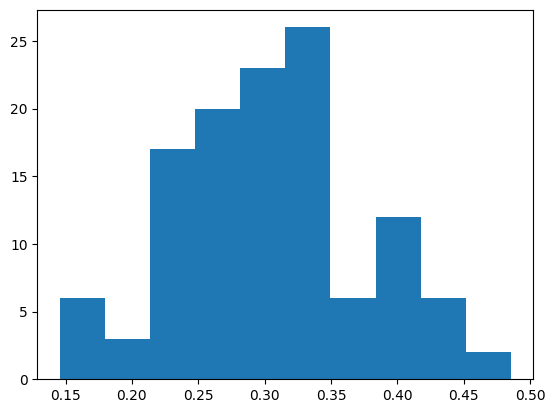

In [ ]:
# See how the distribution looks like. Looks like there are three groups of values; left, centre and right
plt.hist(flatten_distance_matrix)
plt.show()

In [ ]:
flatten_distance_matrix_pd = pd.DataFrame(flatten_distance_matrix, columns = ['values'])

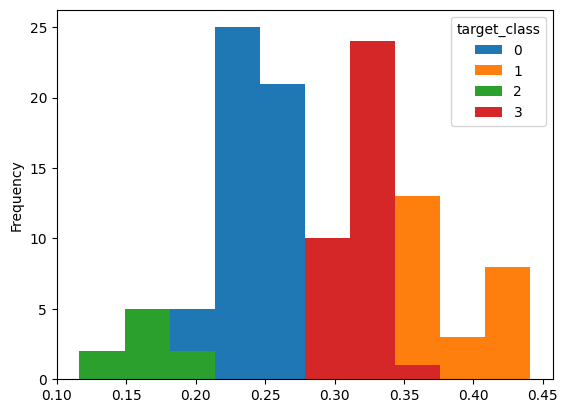

In [ ]:
# This solution fits to the distribution
n_components = 4
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(flatten_distance_matrix_pd['values'].values.reshape(-1, 1))
flatten_distance_matrix_pd['target_class'] = gmm.predict(flatten_distance_matrix_pd['values'].values.reshape(-1, 1))
flatten_distance_matrix_pd.pivot(columns='target_class', values='values').plot.hist()
plt.show()

In [ ]:
treshold = flatten_distance_matrix_pd[flatten_distance_matrix_pd['target_class'] == 2]['values'].max() # Get the treshold, i.e. maximal distance between the clusters that's in the group with smallest distance

In [ ]:
treshold

0.19282175600528717

In [ ]:
distance_matrix_cut_pd = pd.DataFrame(distance_matrix_cut)
distance_matrix_cut_pd.to_csv('distance_matrix_cut.csv')

In [ ]:
# Assign cluster affiliations to original data
merged_df_cleaned_higher_targeted_FES['MiniBatch_KMeans_Cluster'] = clustering_data_scaled_higher['MiniBatch_KMeans_Cluster'] # This assigns clusters to data which has low FES supply
merged_df_cleaned_lower_targeted_FES['MiniBatch_KMeans_Cluster'] = clustering_data_scaled_lower['MiniBatch_KMeans_Cluster'] # This assigns clusters to data which has low FES supply

/tmp/ipython-input-3449952866.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-3449952866.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Now remove some variables that are not pertinent or are co-linear,
# Also split the variables to what's logical, i.e. to show the mean or the mode value
# It makes sense to show the mean value for share of protected areas per cluster, but not for land use categories as numerical codes each have a different meaning


categorical_mean_variables = [
    'bearing_cap',
    'asites_forest',
    'bsites_forest',
    'csites_forest',
    'Pathfinder_even_aged',
    'Pathfinder_primary_forest'
]

interval_mean_variables = [
    'abelow_biom',  # 'lon', 'lat', 'abelow_carbon', 'accessibility',
    'above_biomass', # 'above_carbon',
    'density' , 'et', 'gsv', 'increment',
    'rainfall', 'slope', 'access2015',
    'ruggedness', 'ownership',
    'abies', 'alnus', 'betula',
    'broadleaves', 'carpinus', 'castanea', 'conifers',
    'eucalyptus', 'fagus', 'fraxinus', 'larix',
    'picea', 'pines', 'pinuspinaster',
    'pinussylvestris', 'populus', 'pseudotsuga',
    'quercusmisc', 'quercusrobur', 'robinia',
    'Pathfinder_age_class', 'Pathfinder_disturbance_size',
    'Pathfinder_disturbance_freq', 'Pathfinder_forest_mask',
    'Pathfinder_management'

]



In [ ]:
# RELATIONS THAT ARE BELOW THE TRESHOLD
# Lower 3 to higher 0, 3 and 5
# Lower 7 to higher 0,1,5,6,9
# In the paper the names are changed
# Lower 3 -> Lower FES type A; Lower 7-> Lower FES type B; highers 0->A; 1->B; 3->C; 5->D; 6->E; 9->F

In [ ]:
cluster_means_lower = merged_df_cleaned_lower_targeted_FES.groupby('MiniBatch_KMeans_Cluster')[interval_mean_variables + categorical_mean_variables].mean()
cluster_means_higher = merged_df_cleaned_higher_targeted_FES.groupby('MiniBatch_KMeans_Cluster')[interval_mean_variables + categorical_mean_variables].mean()

In [ ]:
cluster_means = pd.concat([cluster_means_lower, cluster_means_higher], axis=0)

In [ ]:
cluster_means.to_csv('cluster_means.csv')

In [ ]:
cluster_lower = merged_df_cleaned_lower_targeted_FES[merged_df_cleaned_lower_targeted_FES['MiniBatch_KMeans_Cluster'] == 3]
cluster_higher = merged_df_cleaned_higher_targeted_FES[merged_df_cleaned_higher_targeted_FES['MiniBatch_KMeans_Cluster'] == 0]
cluster_lower = cluster_lower[categorical_mean_variables + interval_mean_variables]
cluster_higher = cluster_higher[categorical_mean_variables + interval_mean_variables]
# np2 is  partial eta-squared effect size

results = pd.DataFrame()
variables = cluster_lower.columns
for i in range(len(variables)):
    single_result = pd.Series()
    single_value_lower = pd.DataFrame()
    single_value_higher = pd.DataFrame()
    single_value_lower['variable_value'] = cluster_lower[variables[i]]
    single_value_lower['cluster_designation'] = 'lower'
    single_value_higher['variable_value'] = cluster_higher[variables[i]]
    single_value_higher['cluster_designation'] = 'higher'
    single_variable = pd.concat([single_value_lower, single_value_higher], axis=0)
    aov = pg.anova(dv='variable_value', between='cluster_designation', data=single_variable, detailed=False)
    single_result['variable'] = variables[i]
    # single_result['ddof2'] = float(aov['ddof2']) # Store NUTS2 ID
    single_result['F'] = float(aov['F'])
    single_result['p-unc'] = float(aov['p-unc'])
    single_result['np2'] = float(aov['np2'])
    single_result['value_at_higher'] = cluster_higher[variables[i]].mean() - cluster_lower[variables[i]].mean()
    results = results._append(single_result, ignore_index=True)

In [ ]:
results.to_csv('results_cluster_lower_7_cluster_higher_9.csv')

In [ ]:
# Vizualization

In [46]:
g=ig.Graph(directed=False)
g.add_vertices(16)  #Adding 5 vertices to the graph, g.vs object is used for vertex sequence
g.vs['fname'] = ['Lower FES Type A', 'Lower FES Type B', 'Higher FES Type A', 'Higher FES Type B', 'Higher FES Type C', 'Higher FES Type D', 'Higher FES Type E', 'Higher FES Type F',
                 'Higher protection under Birds Directive', 'Higher protection under Habitats Directive', 'Lower protection under Habitats Directive', 'Higher average age class',
                 'Higher share of private forest ownership', 'Lower share of private forest ownership', 'Higher management intensity', 'Lower management intensity' ] #Giving each node an attribute value
g.add_edges([(0, 8), (0, 9), (0, 11), (0, 13), (0, 15), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15),
             (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7),
             (9, 2), (9, 4), (9, 5), (9, 7),
             (10, 2), (10, 3), (10, 6),
             (11, 2), (11, 3), (11, 4), (11, 5), (11, 6), (11, 7),
             (12, 7),
             (13, 2), (13, 3), (13, 4), (13, 5), (13, 6),
             (14, 7),
             (15, 2), (15, 3), (15, 4), (15, 5), (15, 6)
             ])

g.vs["Type"] = ['Beginning', 'Beginning', 'End', 'End', 'End', 'End', 'End', 'End', 'Management', 'Management', 'Management', 'Management', 'Management', 'Management', 'Management', 'Management']
g.vs["color"] = ['#1f77b4', '#1f77b4', '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
g.es["color"] = ['gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray',
                 '#2ca02c', '#2ca02c', '#2ca02c', '#2ca02c', '#2ca02c', '#2ca02c', '#d62728', '#d62728', '#d62728', '#d62728', '#9467bd', '#9467bd',
                 '#9467bd', '#8c564b', '#8c564b', '#8c564b', '#8c564b', '#8c564b', '#8c564b', '#e377c2', '#7f7f7f', '#7f7f7f', '#7f7f7f', '#7f7f7f',
                 '#7f7f7f', '#bcbd22', '#17becf', '#17becf', '#17becf', '#17becf', '#17becf'
]

g.es["width"] = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.53125, 0.1, 3.5, 1.96875, 0.1, 0.1, 0.1, 2.625, 0.21875, 0.1, 0.1, 0.1, 0.1, 1.96875, 3.625, 0.875, 0.875, 3.5,
                 2.625, 0.1, 0.1, 0.875, 0.1, 0.1, 0.21875, 0.1, 0.1, 1.3125, 0.1, 0.196875, 0.875]


# https://stackoverflow.com/questions/64369710/what-are-the-hex-codes-of-matplotlib-tab10-palette # Good color palette

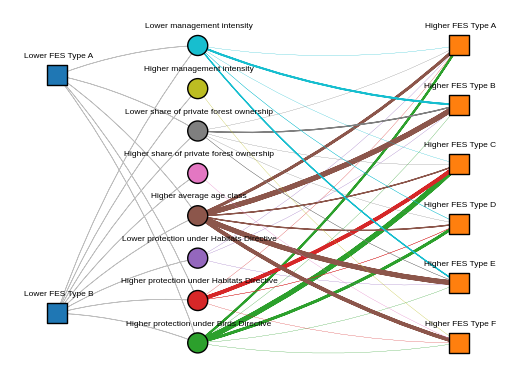

In [48]:
layout = g.layout_reingold_tilford()

# First is X, Second is Y
# X goes Left->Right, Y goes Borrom->Top
layout[0] = [-1, 0.8]
layout[1] = [-1, -0.8]
layout[7] = [1, -1]
layout[6] = [1, -0.6]
layout[5] = [1, -0.2]
layout[4] = [1, 0.2]
layout[3] = [1, 0.6]
layout[2] = [1, 1]
layout[8] = [-0.3, -1]
layout[9] = [-0.3, -0.715]
layout[10] = [-0.3, -0.43]
layout[11] = [-0.3, -0.145]
layout[12] = [-0.3, 0.14]
layout[13] = [-0.3, 0.425]
layout[14] = [-0.3, 0.71]
layout[15] = [-0.3, 1]


fig, ax = plt.subplots()
# ax.text(0.12, 0.88, 'a', transform=fig.transFigure, fontsize=16,  va='top', ha='left') # y axis is the second parameter # fontweight='bold', # 0.05, 0.88,
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Liberation Sans', 'DejaVu Sans'] # Example sans-serif fonts

ig.plot(
    g,
    layout=layout,
    target=ax,
    vertex_size=20, # This must be much bigger than normal for 600 dpi print
    vertex_label=g.vs['fname'],
    vertex_label_size=6.0,
    # vertex_frame_color=["#bcbd22" if Type == "Beginning" else "green" for Type in g.vs["Type"]],
    vertex_frame_size = 1,
    edge_color=g.es["color"],
    edge_arrow_size= -1,
    edge_width = g.es["width"],
    edge_curved="0.1",
    vertex_label_dist = 1.4, # Smaller than normal for plot for 600 dpi print
    vertex_label_angle = 1.5, # Smaller than normal for plot for 600 dpi print
    vertex_shape = ["circle" if Type == "Management" else "square" for Type in g.vs["Type"]],
    vertex_color=g.vs["color"]
)


plt.show()

In [49]:
ax.set_xlim(-1.25, 1.2)
ax.set_ylim(-1.1, 1.15)
fig.savefig("Fig_3.pdf", bbox_inches='tight', dpi=600)